### Contents:

- Covid-19 global data analysis.
- Comparing trajectories of deaths, confirmed and active cases for different countries.
- Time Series forecasting: Using ARIMA model to predict deaths in US and India for next 15 days.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import csv
import itertools
from collections import defaultdict
import datetime as dt
import re
import statsmodels as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statistics

%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 50)
plt.rcParams["figure.figsize"] = [20, 20]

In [3]:
base_dir = '../data/Global/csse_covid_19_daily_reports/'

In [4]:
abs_path = os.path.abspath(base_dir)

In [5]:
files = os.listdir(abs_path)
csv_files = filter(lambda file: '.csv' in file, files)
csv_abs_path = [os.path.join(abs_path, csv_file) for csv_file in csv_files]

In [6]:
csv_abs_path = sorted(csv_abs_path)

In [7]:
covid_list_6_columns = []
covid_list_8_columns = []
covid_list_12_columns = []
covid_list_14_columns = []
d = defaultdict()
for file in csv_abs_path:
    with open(file, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        next(reader) 
        l = [i for i in reader]
        print(csvfile)
        size = len(l[0])
        print(f"{file}: {size}")
        d[size] = size + 1
    if size == 6:
        covid_list_6_columns.extend(l)
    elif size == 8:
        covid_list_8_columns.extend(l)
    elif size == 12:
        covid_list_12_columns.extend(l)
    elif size == 14:
        covid_list_14_columns.extend(l)

<_io.TextIOWrapper name='/home/akash/Dev/python/DataScience_Journey_2020/13_Covid19_Analysis/Covid19_Analysis/data/Global/csse_covid_19_daily_reports/01-22-2020.csv' mode='r' encoding='UTF-8'>
/home/akash/Dev/python/DataScience_Journey_2020/13_Covid19_Analysis/Covid19_Analysis/data/Global/csse_covid_19_daily_reports/01-22-2020.csv: 6
<_io.TextIOWrapper name='/home/akash/Dev/python/DataScience_Journey_2020/13_Covid19_Analysis/Covid19_Analysis/data/Global/csse_covid_19_daily_reports/01-23-2020.csv' mode='r' encoding='UTF-8'>
/home/akash/Dev/python/DataScience_Journey_2020/13_Covid19_Analysis/Covid19_Analysis/data/Global/csse_covid_19_daily_reports/01-23-2020.csv: 6
<_io.TextIOWrapper name='/home/akash/Dev/python/DataScience_Journey_2020/13_Covid19_Analysis/Covid19_Analysis/data/Global/csse_covid_19_daily_reports/01-24-2020.csv' mode='r' encoding='UTF-8'>
/home/akash/Dev/python/DataScience_Journey_2020/13_Covid19_Analysis/Covid19_Analysis/data/Global/csse_covid_19_daily_reports/01-24-2020

<_io.TextIOWrapper name='/home/akash/Dev/python/DataScience_Journey_2020/13_Covid19_Analysis/Covid19_Analysis/data/Global/csse_covid_19_daily_reports/04-13-2020.csv' mode='r' encoding='UTF-8'>
/home/akash/Dev/python/DataScience_Journey_2020/13_Covid19_Analysis/Covid19_Analysis/data/Global/csse_covid_19_daily_reports/04-13-2020.csv: 12
<_io.TextIOWrapper name='/home/akash/Dev/python/DataScience_Journey_2020/13_Covid19_Analysis/Covid19_Analysis/data/Global/csse_covid_19_daily_reports/04-14-2020.csv' mode='r' encoding='UTF-8'>
/home/akash/Dev/python/DataScience_Journey_2020/13_Covid19_Analysis/Covid19_Analysis/data/Global/csse_covid_19_daily_reports/04-14-2020.csv: 12
<_io.TextIOWrapper name='/home/akash/Dev/python/DataScience_Journey_2020/13_Covid19_Analysis/Covid19_Analysis/data/Global/csse_covid_19_daily_reports/04-15-2020.csv' mode='r' encoding='UTF-8'>
/home/akash/Dev/python/DataScience_Journey_2020/13_Covid19_Analysis/Covid19_Analysis/data/Global/csse_covid_19_daily_reports/04-15-20

<_io.TextIOWrapper name='/home/akash/Dev/python/DataScience_Journey_2020/13_Covid19_Analysis/Covid19_Analysis/data/Global/csse_covid_19_daily_reports/05-09-2020.csv' mode='r' encoding='UTF-8'>
/home/akash/Dev/python/DataScience_Journey_2020/13_Covid19_Analysis/Covid19_Analysis/data/Global/csse_covid_19_daily_reports/05-09-2020.csv: 12
<_io.TextIOWrapper name='/home/akash/Dev/python/DataScience_Journey_2020/13_Covid19_Analysis/Covid19_Analysis/data/Global/csse_covid_19_daily_reports/05-10-2020.csv' mode='r' encoding='UTF-8'>
/home/akash/Dev/python/DataScience_Journey_2020/13_Covid19_Analysis/Covid19_Analysis/data/Global/csse_covid_19_daily_reports/05-10-2020.csv: 12
<_io.TextIOWrapper name='/home/akash/Dev/python/DataScience_Journey_2020/13_Covid19_Analysis/Covid19_Analysis/data/Global/csse_covid_19_daily_reports/05-11-2020.csv' mode='r' encoding='UTF-8'>
/home/akash/Dev/python/DataScience_Journey_2020/13_Covid19_Analysis/Covid19_Analysis/data/Global/csse_covid_19_daily_reports/05-11-20

<_io.TextIOWrapper name='/home/akash/Dev/python/DataScience_Journey_2020/13_Covid19_Analysis/Covid19_Analysis/data/Global/csse_covid_19_daily_reports/06-08-2020.csv' mode='r' encoding='UTF-8'>
/home/akash/Dev/python/DataScience_Journey_2020/13_Covid19_Analysis/Covid19_Analysis/data/Global/csse_covid_19_daily_reports/06-08-2020.csv: 14
<_io.TextIOWrapper name='/home/akash/Dev/python/DataScience_Journey_2020/13_Covid19_Analysis/Covid19_Analysis/data/Global/csse_covid_19_daily_reports/06-09-2020.csv' mode='r' encoding='UTF-8'>
/home/akash/Dev/python/DataScience_Journey_2020/13_Covid19_Analysis/Covid19_Analysis/data/Global/csse_covid_19_daily_reports/06-09-2020.csv: 14
<_io.TextIOWrapper name='/home/akash/Dev/python/DataScience_Journey_2020/13_Covid19_Analysis/Covid19_Analysis/data/Global/csse_covid_19_daily_reports/06-10-2020.csv' mode='r' encoding='UTF-8'>
/home/akash/Dev/python/DataScience_Journey_2020/13_Covid19_Analysis/Covid19_Analysis/data/Global/csse_covid_19_daily_reports/06-10-20

### Columns:

- df6: Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
- df8: Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
- df12: 'FIPS','Admin2','Province_State','Country_Region','Last_Update','Lat','Long_','Confirmed','Deaths','Recovered','Active','Combined_Key'
- df14: 'FIPS','Admin2','Province_State','Country_Region','Last_Update','Lat','Long_','Confirmed','Deaths','Recovered','Active','Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'


### Create DataFrame

In [8]:
df6 = pd.DataFrame(covid_list_6_columns, columns=['Province/State','Country/Region','Last Update','Confirmed','Deaths','Recovered'])
df8 = pd.DataFrame(covid_list_8_columns, columns=['Province/State','Country/Region','Last Update','Confirmed','Deaths','Recovered','Latitude','Longitude'])
df12 = pd.DataFrame(covid_list_12_columns, columns=['FIPS','Admin2','Province_State','Country_Region','Last_Update','Lat','Long_','Confirmed','Deaths','Recovered','Active','Combined_Key'])
df14 = pd.DataFrame(covid_list_14_columns, columns=['FIPS','Admin2','Province_State','Country_Region','Last_Update','Lat','Long_','Confirmed','Deaths','Recovered','Active','Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'])

In [9]:
df6.head()

Province/State  Country/Region  \
0          Anhui  Mainland China   
1        Beijing  Mainland China   
2      Chongqing  Mainland China   
3         Fujian  Mainland China   
4          Gansu  Mainland China   

       Last Update Confirmed Deaths Recovered  
0  1/22/2020 17:00         1                   
1  1/22/2020 17:00        14                   
2  1/22/2020 17:00         6                   
3  1/22/2020 17:00         1                   
4  1/22/2020 17:00

In [10]:
df8.head()

Province/State  Country/Region  \
0          Hubei  Mainland China   
1                    South Korea   
2                          Italy   
3      Guangdong  Mainland China   
4          Henan  Mainland China   

           Last Update Confirmed Deaths  \
0  2020-03-01T10:13:19     66907   2761   
1  2020-03-01T23:43:03      3736     17   
2  2020-03-01T23:23:02      1694     34   
3  2020-03-01T14:13:18      1349      7   
4  2020-03-01T14:13:18      1272     22   

  Recovered Latitude Longitude  
0     31536  30.9756  112.2707  
1        30  36.0000  128.0000  
2        83  43.0000   12.0000  
3      1016  23.3417  113.4244  
4      1198  33.8820  113.6140

In [11]:
df12.head()

FIPS         Admin2 Province_State  \
0  36061  New York City       New York   
1  36059         Nassau       New York   
2  36119    Westchester       New York   
3  36103        Suffolk       New York   
4  36087       Rockland       New York   

  Country_Region    Last_Update          Lat  \
0             US  3/22/20 23:45   40.7672726   
1             US  3/22/20 23:45  40.74066522   
2             US  3/22/20 23:45  41.16278376   
3             US  3/22/20 23:45  40.88320119   
4             US  3/22/20 23:45  41.15027894   

          Long_ Confirmed Deaths Recovered  \
0  -73.97152637      9654     63         0   
1  -73.58941873      1900      4         0   
2  -73.75741653      1873      0         0   
3   -72.8012172      1034      9         0   
4  -74.02560498       455      1         0   

  Active                 Combined_Key  
0      0  New York City, New York, US  
1      0         Nassau, New York, US  
2      0    Westchester, New York, US  
3      0        Suffolk, New York, US  
4      0       Rockland, New York, US

In [12]:
df14.head()

FIPS     Admin2  Province_State  \
0  45001  Abbeville  South Carolina   
1  22001     Acadia       Louisiana   
2  51001   Accomack        Virginia   
3  16001        Ada           Idaho   
4  19001      Adair            Iowa   

  Country_Region          Last_Update  \
0             US  2020-05-30 02:32:48   
1             US  2020-05-30 02:32:48   
2             US  2020-05-30 02:32:48   
3             US  2020-05-30 02:32:48   
4             US  2020-05-30 02:32:48   

           Lat                Long_ Confirmed  \
0  34.22333378         -82.46170658        39   
1   30.2950649         -92.41419698       401   
2  37.76707161         -75.63234615       827   
3   43.4526575  -116.24155159999998       803   
4  41.33075609         -94.47105874         9   

  Deaths Recovered Active  \
0      0         0     39   
1     23         0    378   
2     12         0    815   
3     22         0    781   
4      0         0      9   

                    Combined_Key  \
0  Abbeville, South Carolina, US   
1          Acadia, Louisiana, US   
2         Accomack, Virginia, US   
3                 Ada, Idaho, US   
4                Adair, Iowa, US   

       Incidence_Rate Case-Fatality_Ratio  
0   159.0084396787214                 0.0  
1    646.305101136272  5.7356608478802995  
2  2559.1038494863224  1.4510278113663846  
3   166.7403812810562    2.73972602739726  
4  125.83892617449665                 0.0

In [13]:
df6['Last Update'].dtype

dtype('O')

In [14]:
len(df6)

2818

In [15]:
len(df12)

214844

In [16]:
len(df12) + len(df8) + len(df6)

222461

### Merge 3 DataFrames

In [17]:
df1 = pd.concat([df6, df8, df12, df14], axis=0, sort=False)

In [18]:
df1.head()

Province/State  Country/Region  \
0          Anhui  Mainland China   
1        Beijing  Mainland China   
2      Chongqing  Mainland China   
3         Fujian  Mainland China   
4          Gansu  Mainland China   

       Last Update Confirmed Deaths Recovered  \
0  1/22/2020 17:00         1                    
1  1/22/2020 17:00        14                    
2  1/22/2020 17:00         6                    
3  1/22/2020 17:00         1                    
4  1/22/2020 17:00                              

  Latitude Longitude FIPS Admin2 Province_State  \
0      NaN       NaN  NaN    NaN            NaN   
1      NaN       NaN  NaN    NaN            NaN   
2      NaN       NaN  NaN    NaN            NaN   
3      NaN       NaN  NaN    NaN            NaN   
4      NaN       NaN  NaN    NaN            NaN   

  Country_Region Last_Update  Lat Long_ Active  \
0            NaN         NaN  NaN   NaN    NaN   
1            NaN         NaN  NaN   NaN    NaN   
2            NaN         NaN  NaN   NaN    NaN   
3            NaN         NaN  NaN   NaN    NaN   
4            NaN         NaN  NaN   NaN    NaN   

  Combined_Key Incidence_Rate  \
0          NaN            NaN   
1          NaN            NaN   
2          NaN            NaN   
3          NaN            NaN   
4          NaN            NaN   

  Case-Fatality_Ratio  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN

# Data Cleaning

In [19]:
df1['Country/Region'] = df1['Country/Region'].fillna('')
df1['Country_Region'] = df1['Country_Region'].fillna('')
df1['Country_Region'] = df1['Country_Region'] + df1['Country/Region']

In [20]:
df1 = df1.drop(columns='Country/Region')

In [21]:
df1['Last Update'] = df1['Last Update'].fillna('')
df1['Last_Update'] = df1['Last_Update'].fillna('')
df1['Last_Update'] = df1['Last_Update'] + df1['Last Update']
df1 = df1.drop(columns=['Last Update'])

In [22]:
df1['Province/State'] = df1['Province/State'].fillna('')
df1['Province_State'] = df1['Province_State'].fillna('')
df1['Province_State'] = df1['Province_State'] + df1['Province/State']
df1 = df1.drop(columns=['Province/State'])

#### Uniform Datetime format

- DataFrame has 4-5 different datetime formats.
- When pd.to_datetime is used, majority of the dates become NAT, because it is not able to infer them.
- The problem is solved using dateutil package.

In [23]:
import dateutil.parser
date = dateutil.parser.parse("1/23/20 17:00").strftime("%m/%d/%Y, %H:%M:%S")
date

'01/23/2020, 17:00:00'

In [24]:
df1['Last_Update'] = df1['Last_Update'].apply(lambda x: dateutil.parser.parse(x).strftime("%Y-%m-%d %H:%M:%S"))

In [25]:
df1['Last_Update'] = pd.to_datetime(df1['Last_Update'], infer_datetime_format=True, errors='coerce')

In [26]:
df1.isna().sum()

Confirmed                   0
Deaths                      0
Recovered                   0
Latitude               276078
Longitude              276078
FIPS                     7617
Admin2                   7617
Province_State              0
Country_Region              0
Last_Update                 0
Lat                      7617
Long_                    7617
Active                   7617
Combined_Key             7617
Incidence_Rate         222461
Case-Fatality_Ratio    222461
dtype: int64

#### Only 4799 rows have latitude and longitude values out of 201896 rows, that is 2%, thus removing those columns. 

In [27]:
df1 = df1.drop(columns=['Latitude', 'Longitude'])

In [28]:
df1.isna().sum()

Confirmed                   0
Deaths                      0
Recovered                   0
FIPS                     7617
Admin2                   7617
Province_State              0
Country_Region              0
Last_Update                 0
Lat                      7617
Long_                    7617
Active                   7617
Combined_Key             7617
Incidence_Rate         222461
Case-Fatality_Ratio    222461
dtype: int64

In [29]:
df1['date'] = pd.to_datetime(df1['Last_Update']).dt.date

In [30]:
df1.loc[df1['Country_Region'].isin(['Mainland China', 'China']), 'Country_Region'] = 'China'

In [31]:
df1.Deaths.unique()

array(['', '17', '1', ..., '8730', '6057', '4792'], dtype=object)

### Check and update datatypes if not correct

In [32]:
df1.loc[df1['Deaths'] == '', 'Deaths'] = 0

In [33]:
df1.loc[df1['Recovered'] == '', 'Recovered'] = 0

In [34]:
df1.loc[df1['Confirmed'] == '', 'Confirmed'] = 0

In [35]:
df1['Active'] = df1['Active'].fillna(0)

In [36]:
df1.dtypes

Confirmed                      object
Deaths                         object
Recovered                      object
FIPS                           object
Admin2                         object
Province_State                 object
Country_Region                 object
Last_Update            datetime64[ns]
Lat                            object
Long_                          object
Active                         object
Combined_Key                   object
Incidence_Rate                 object
Case-Fatality_Ratio            object
date                           object
dtype: object

In [37]:
df1[['Confirmed', 'Deaths', 'Recovered', 'Active']] = df1[['Confirmed', 'Deaths', 'Recovered', 'Active']].astype(np.int)

In [38]:
df1['Active_Cases'] = df1['Confirmed'] - df1['Deaths'] - df1['Recovered']

#### New Feature

In [39]:
df1[(~df1['Active'].isna()) & ( df1['Active'] != 0 )]

Confirmed  Deaths  Recovered FIPS Admin2  \
3189         669       6          4               
3190         296       0         70               
3191         259       0          8               
3192         120       1          1               
3193         100       0          6               
3194          22       0          3               
3195          19       0          0               
3196           5       0          0               
3199          20       0         10               
3200         136       2        114               
3201         577       6        570               
3202       67800    3144      59433               
3203         317       4        100               
3204         169       2         28               
3205         766       7        750               
3206         514       8        400               
3207         394       4        328               
3208         936       1        934               
3209        1407       8       1329               
3210         543       3        536               
3211         307       1        295               
3212         319       6        310               
3213         484      13        466               
3215         633       0        631               
3216        1237       1       1219               
...          ...     ...        ...  ...    ...   
58388       2579      87        559               
58389      65736    1423      36850               
58390       1693      27         49               
58391       1884      11       1252               
58392       7007     447       2556               
58393        196       3          9               
58394      31094    1938      28800               
58395        170       6         71               
58396        443       7        431               
58397       4971      50       3288               
58398        509      21        183               
58399       3134      58       2987               
58401        530      13        291               
58403       1094      49        995               
58404     176677    4792     150087               
58405        694       0        219               
58406      41990     288      26761               
58407        847      23        784               
58408       4966      19       3874               
58409       2904      24        487               
58410        334       0        323               
58411        489       3        415               
58413        705     160         39               
58414       1357      10       1104               
58415        356       4         54               

                     Province_State  \
3189                New South Wales   
3190                       Victoria   
3191                     Queensland   
3192              Western Australia   
3193                South Australia   
3194                       Tasmania   
3195   Australian Capital Territory   
3196             Northern Territory   
3199                          Macau   
3200                          Gansu   
3201                      Chongqing   
3202                          Hubei   
3203                      Hong Kong   
3204                                  
3205                       Shandong   
3206                        Beijing   
3207                       Shanghai   
3208                        Jiangxi   
3209                      Guangdong   
3210                        Sichuan   
3211                         Fujian   
3212                          Hebei   
3213                   Heilongjiang   
3215                        Jiangsu   
3216                       Zhejiang   
...                             ...   
58388                                 
58389                                 
58390                                 
58391                                 
58392                                 
58393                                 
58394                                 
58395                       

In [40]:
df1.date = pd.to_datetime(df1['date'])

In [41]:
df1.dtypes

Confirmed                       int64
Deaths                          int64
Recovered                       int64
FIPS                           object
Admin2                         object
Province_State                 object
Country_Region                 object
Last_Update            datetime64[ns]
Lat                            object
Long_                          object
Active                          int64
Combined_Key                   object
Incidence_Rate                 object
Case-Fatality_Ratio            object
date                   datetime64[ns]
Active_Cases                    int64
dtype: object

In [42]:
df_china = df1.loc[(df1['Country_Region'] == 'China') & (df1['Confirmed'] != 0)]

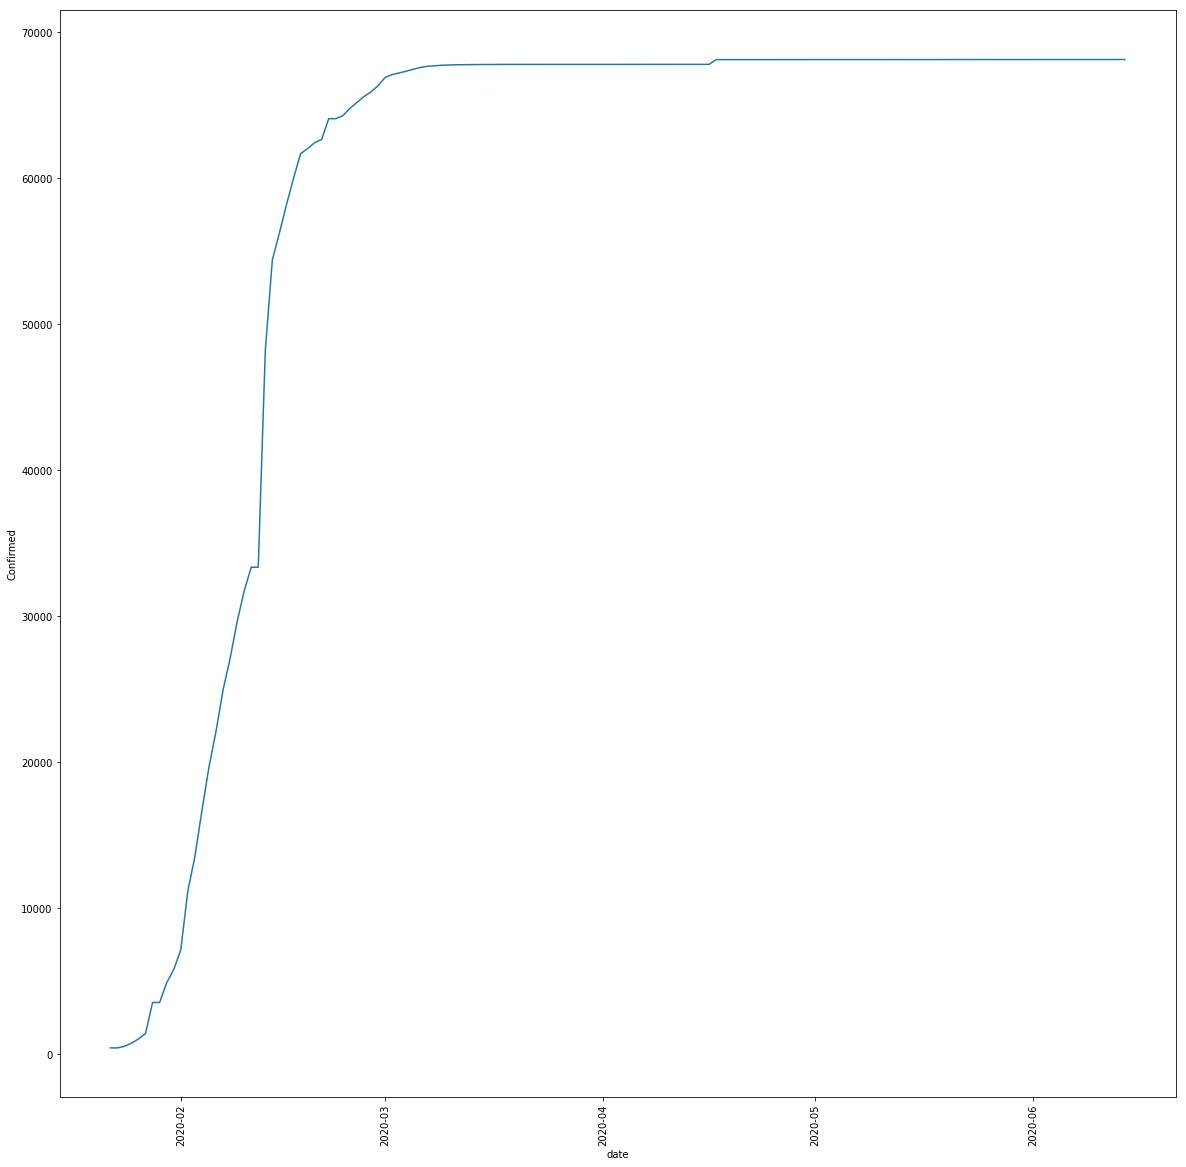

In [43]:
sns.lineplot(x='date', y='Confirmed', data=df_china.loc[df_china.Province_State == 'Hubei'])
plt.xticks(rotation=90)
plt.show()

#### Notice the sharp increase in number of deaths, when the curve had already flattened.

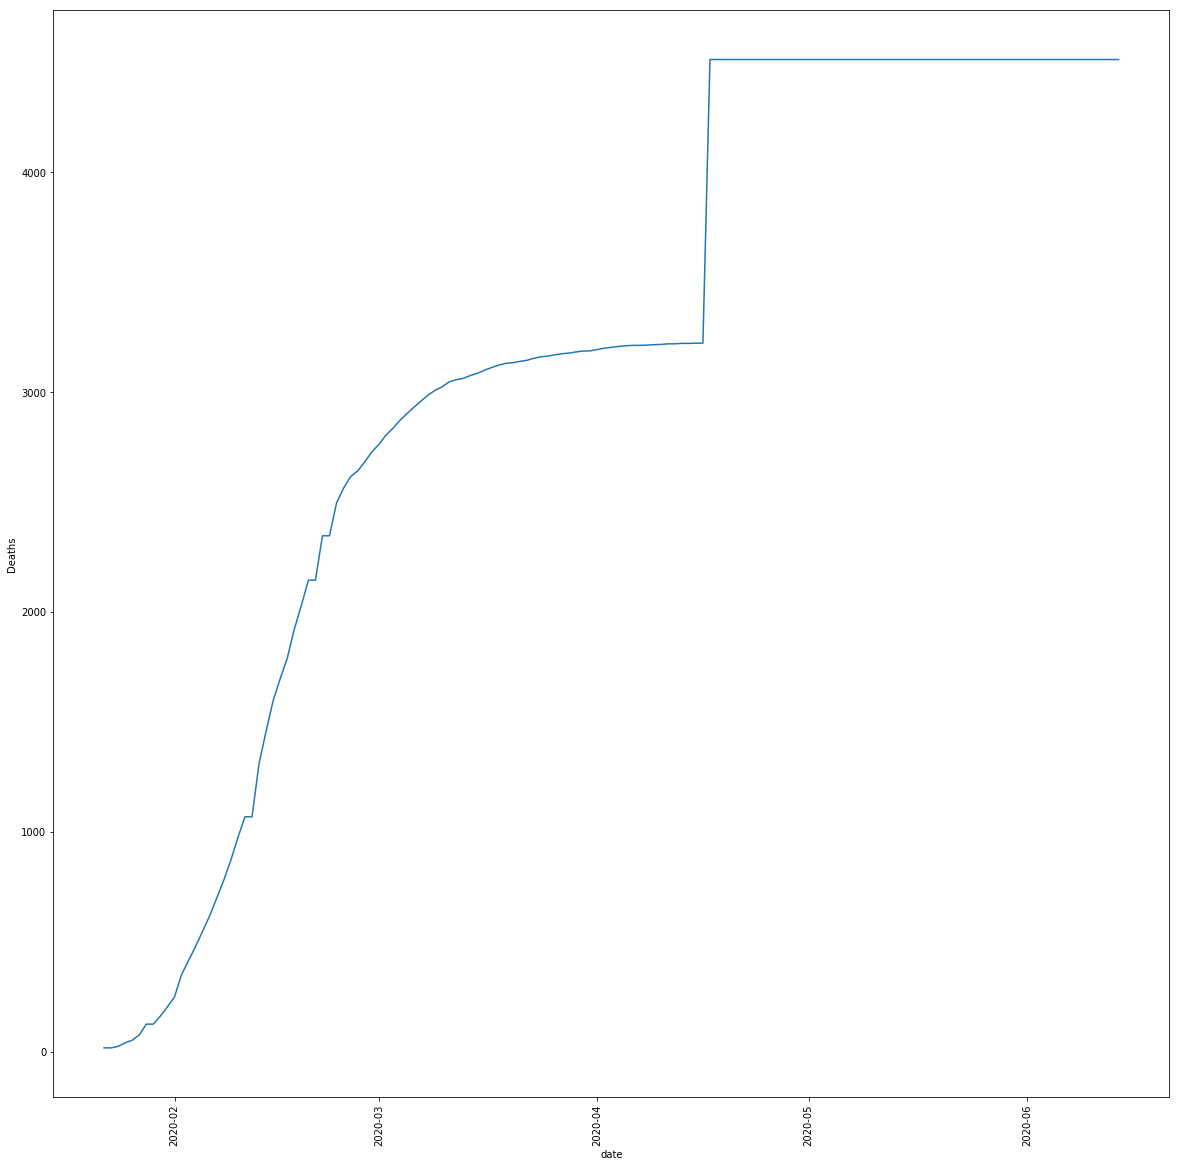

In [44]:
sns.lineplot(x='date', y='Deaths', data=df_china.loc[df_china.Province_State == 'Hubei'])
plt.xticks(rotation=90)
plt.show()

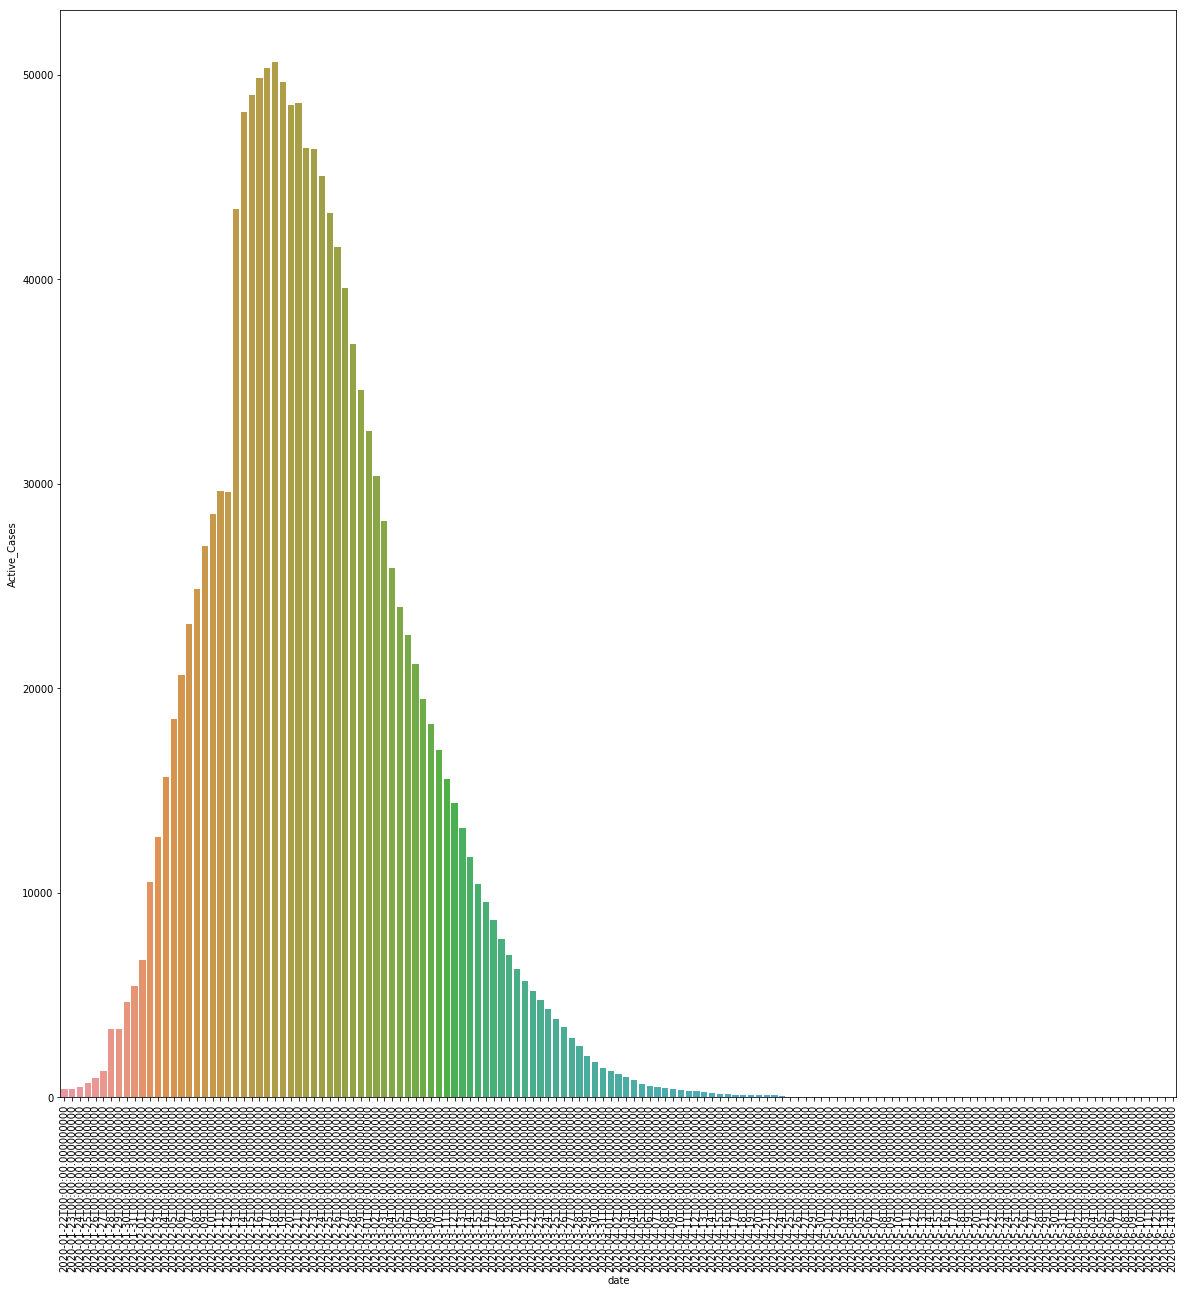

In [45]:
sns.barplot(x='date', y='Active_Cases', data=df_china.loc[df_china.Province_State == 'Hubei'])
plt.xticks(rotation=90)
plt.show()

In [46]:
df_china.groupby(['Province_State'])['Deaths'].max().sort_values(ascending=False)

Province_State
Hubei             4512
Henan               22
Heilongjiang        13
Beijing              9
Guangdong            8
Shandong             7
Shanghai             7
Hainan               6
Anhui                6
Chongqing            6
Hebei                6
Hunan                4
Hong Kong            4
Shaanxi              3
Sichuan              3
Tianjin              3
Xinjiang             3
Gansu                2
Liaoning             2
Jilin                2
Guangxi              2
Yunnan               2
Guizhou              2
Fujian               1
Zhejiang             1
Inner Mongolia       1
Jiangxi              1
Macau                0
Ningxia              0
Qinghai              0
Shanxi               0
Tibet                0
Jiangsu              0
Name: Deaths, dtype: int64

In [47]:
yesterday = (dt.datetime.now().date() - dt.timedelta(days=1)).strftime('%Y-%m-%d')

In [48]:
df2 = df1.loc[df1.date == yesterday].groupby(['Province_State']).max()#.sort_values(by=['Deaths', 'Confirmed', 'Active', 'Recovered'], ascending=['False', 'False', 'False', 'False'])

### Analysis

- Top 10 countries with maximum fatalities
- Top 10 Provincies in US with maximum fatalities
- Countries with highest fatalities to recovery ratio
- Countries with maximum recovery rate
- Country with most active cases
- Country with largest single day spike in: 
    - Deaths
    - Confirmed
    - Recovered

#### Provinces with Maximum Fatalities

In [49]:
df2 = df2.iloc[1:, :]

In [50]:
provincies_with_maximum_fatalities = df2.sort_values(by='Deaths', ascending=False)

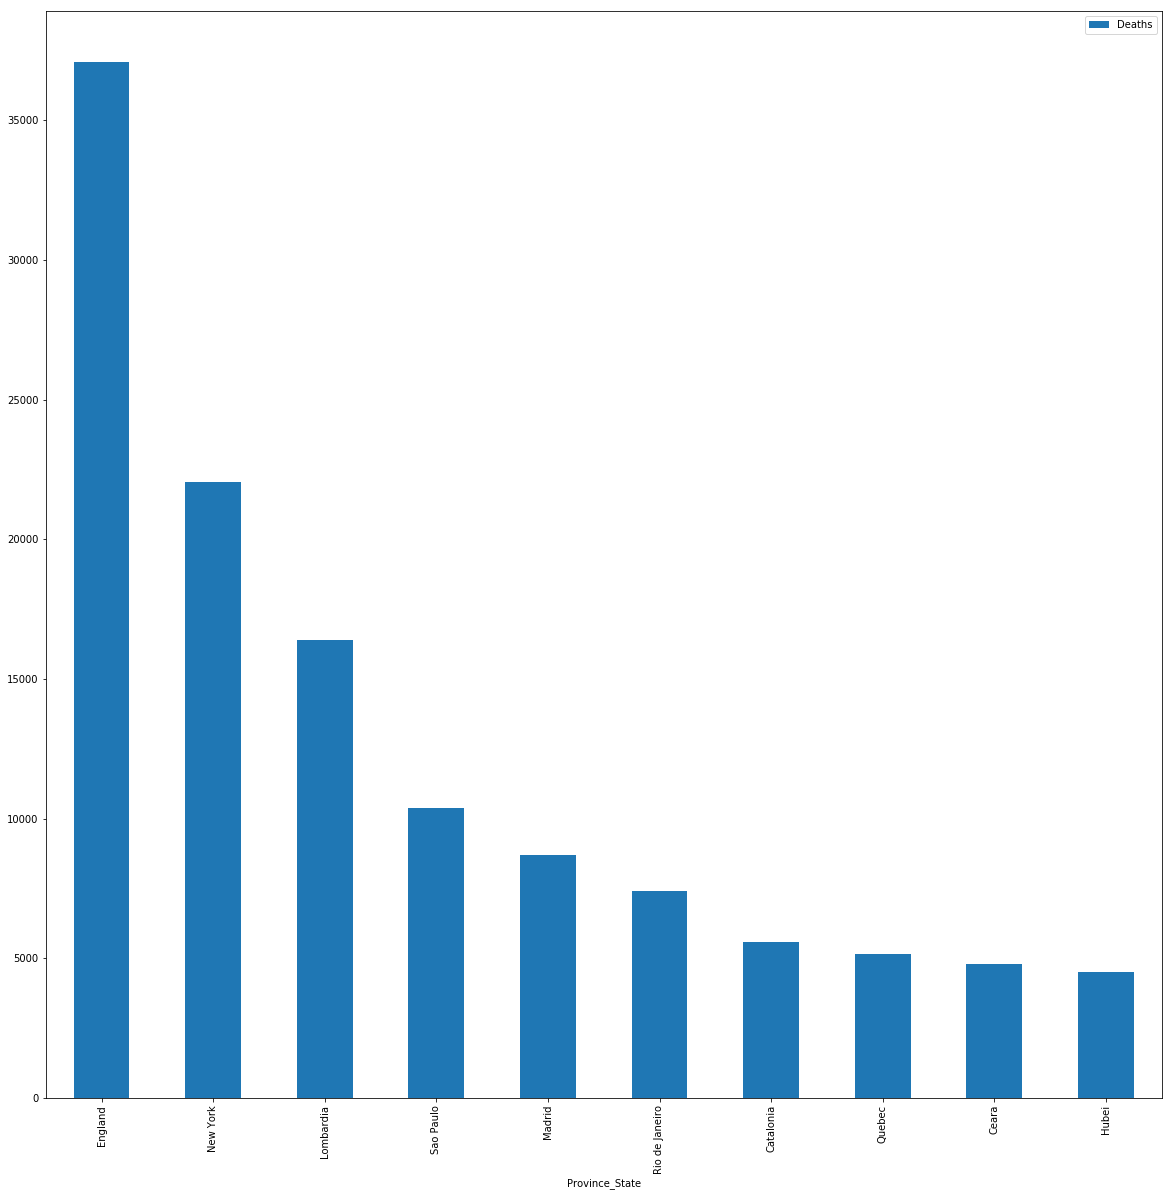

In [51]:
provincies_with_maximum_fatalities[['Deaths']].head(10).plot(kind='bar')
plt.show()

#### Top 10 countries with maximum fatalities

In [52]:
df3 = df1.loc[df1.date == yesterday].groupby(['Country_Region']).max().sort_values(by='Deaths', ascending=False).iloc[1:, :]

In [53]:
df3 = df1.loc[df1.date == yesterday].groupby(['Country_Region'])['Deaths'].sum()#.iloc[1:, :].head(10)

In [54]:
top_20_countries_most_deaths = df3.sort_values(ascending=False)[:20]

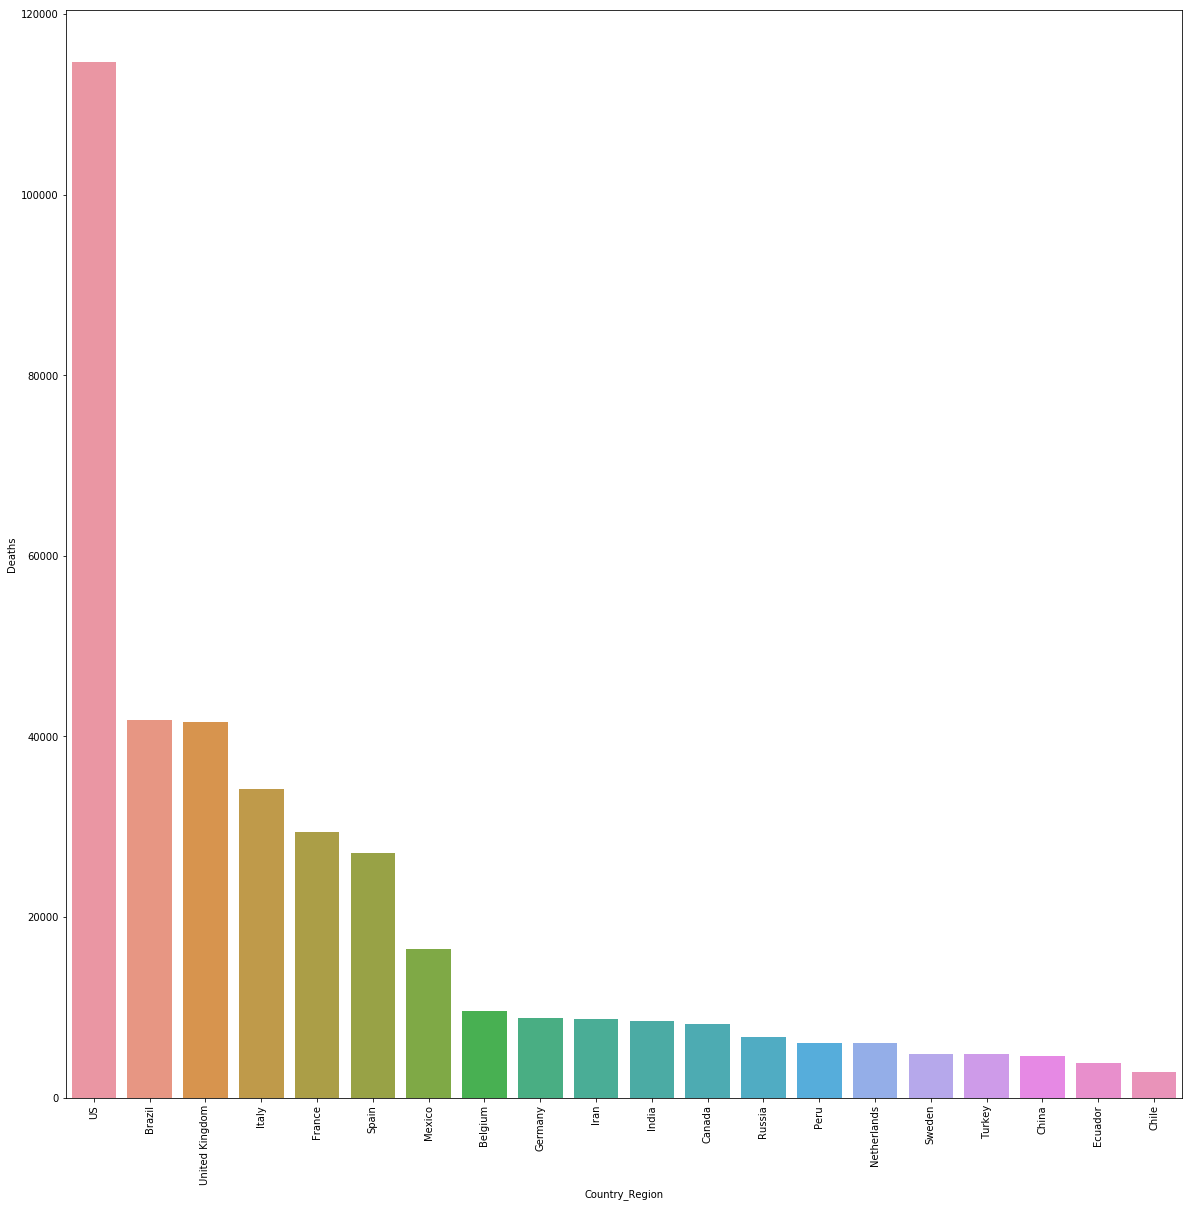

In [55]:
sns.barplot(x=top_20_countries_most_deaths.index, y=top_20_countries_most_deaths)
plt.xticks(rotation=90)
plt.show()

#### Countries with most active cases

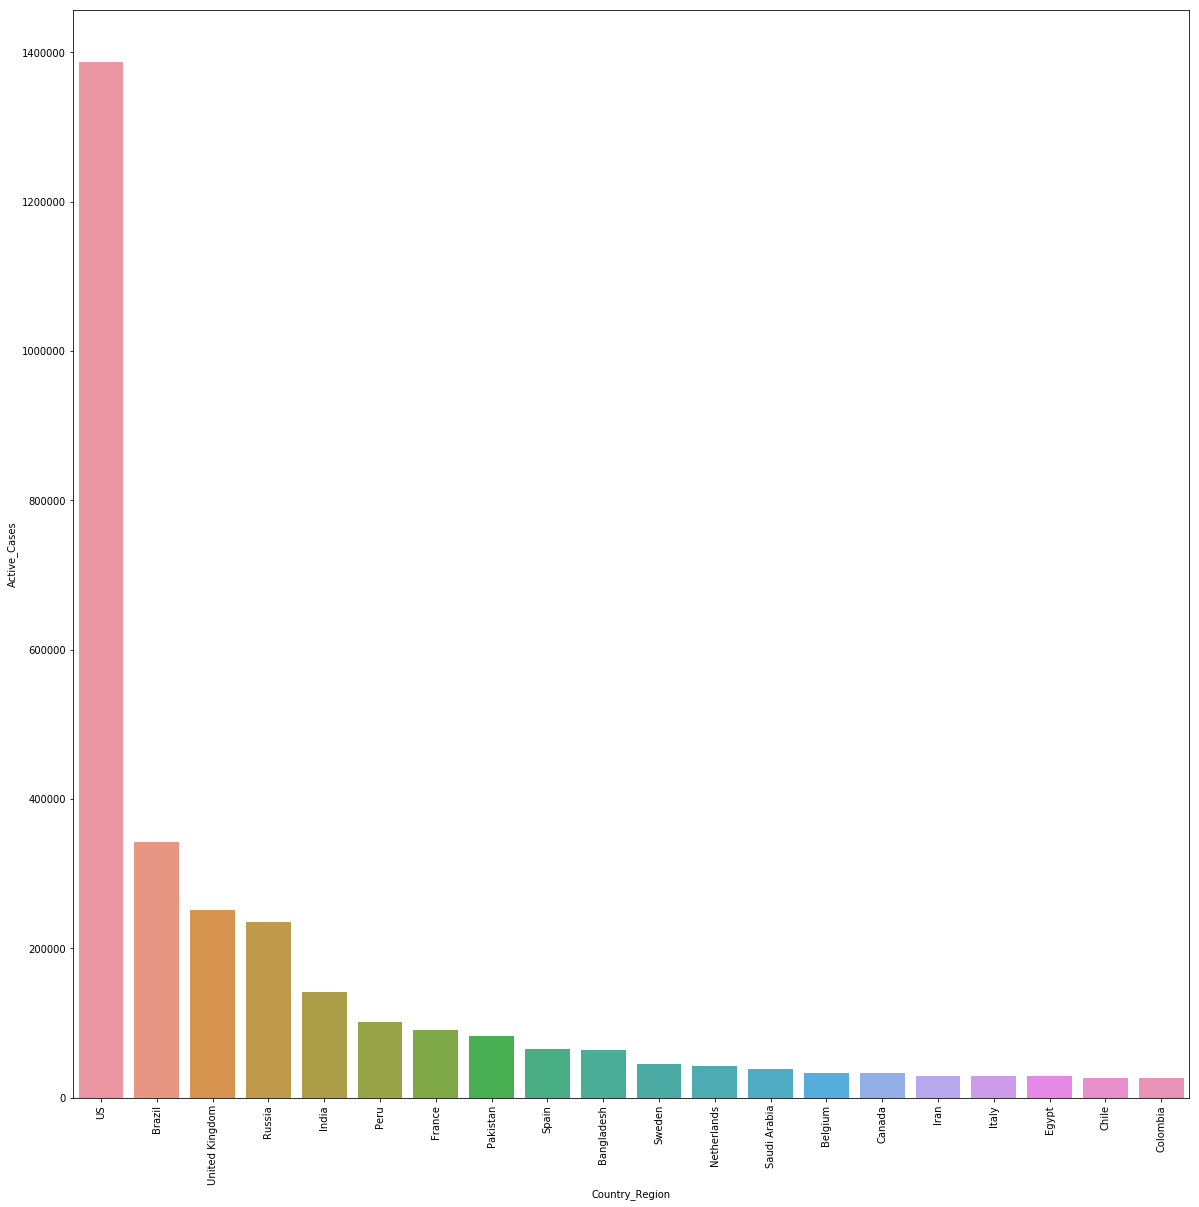

In [56]:
df3 = df1.loc[df1.date == yesterday].groupby(['Country_Region'])['Active_Cases'].sum()#.iloc[1:, :].head(10)
top_20_countries_most_active_cases = df3.sort_values(ascending=False)[:20]
sns.barplot(x=top_20_countries_most_active_cases.index, y=top_20_countries_most_active_cases)
plt.xticks(rotation=90)
plt.show()

In [57]:
top_20_countries_most_active_cases

Country_Region
US                1386931
Brazil             341859
United Kingdom     251554
Russia             235194
India              141842
Peru               101567
France              91148
Pakistan            83223
Spain               65697
Bangladesh          63179
Sweden              44830
Netherlands         42415
Saudi Arabia        38020
Belgium             33675
Canada              32436
Iran                29217
Italy               28997
Egypt               28773
Chile               26618
Colombia            25959
Name: Active_Cases, dtype: int64

In [58]:
df3 = df1.loc[df1.date == yesterday]#.groupby(['Country_Region'])['Active'].sum()#.iloc[1:, :].head(10)

#### Countries with most recoveries

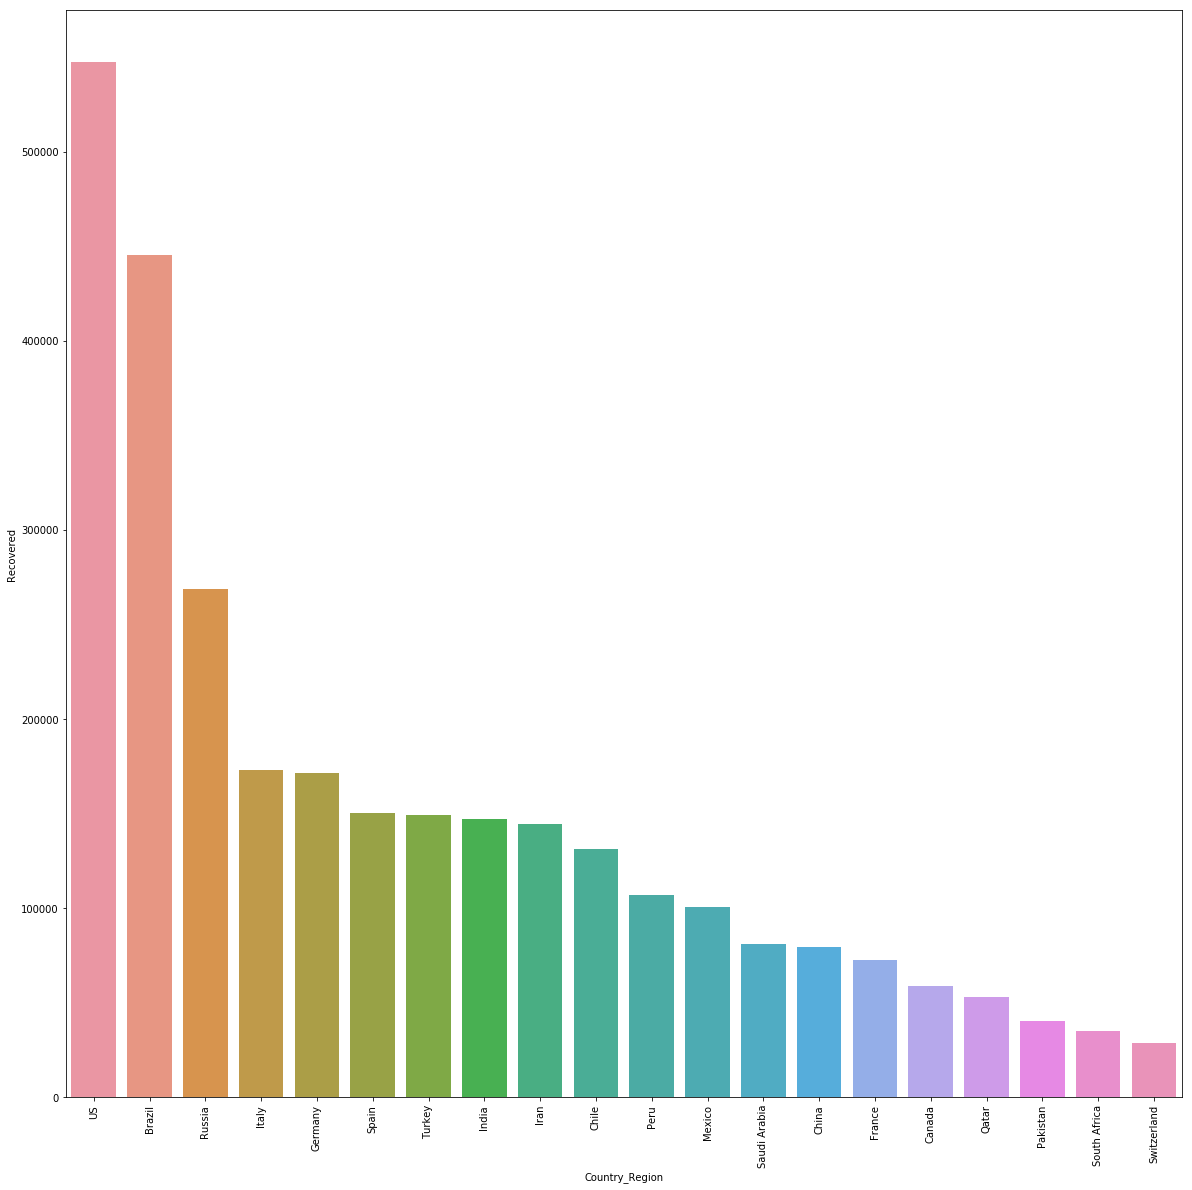

In [59]:
df3 = df1.loc[df1.date == yesterday].groupby(['Country_Region'])['Recovered'].sum()#.iloc[1:, :].head(10)
top_20_countries_most_recovered_cases = df3.sort_values(ascending=False)[:20]
sns.barplot(x=top_20_countries_most_recovered_cases.index, y=top_20_countries_most_recovered_cases)
plt.xticks(rotation=90)
plt.show()

In [60]:
top_20_countries_most_recovered_cases

Country_Region
US              547386
Brazil          445123
Russia          268862
Italy           173085
Germany         171535
Spain           150376
Turkey          149102
India           147195
Iran            144649
Chile           131358
Peru            107133
Mexico          100876
Saudi Arabia     81029
China            79472
France           72695
Canada           59034
Qatar            53296
Pakistan         40247
South Africa     35006
Switzerland      28800
Name: Recovered, dtype: int64

### India's fight against corona virus

### Active Cases

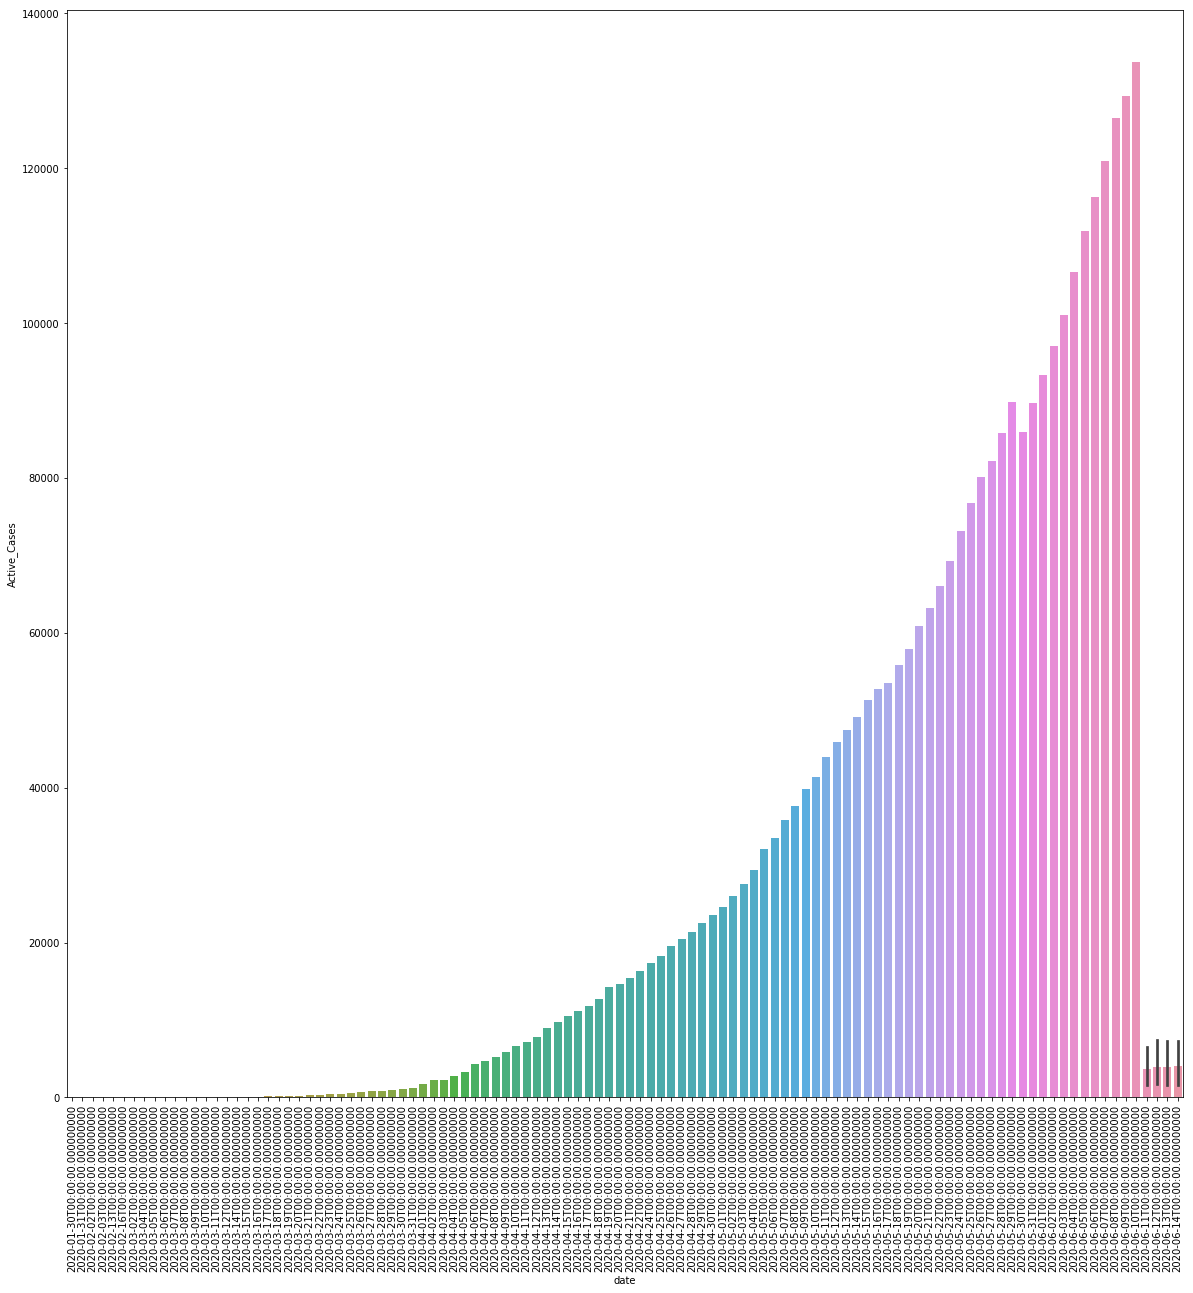

In [61]:
sns.barplot(x='date', y='Active_Cases', data=df1.loc[df1.Country_Region == 'India'])
plt.xticks(rotation=90)
# plt.yticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000])
plt.show()

### Deaths

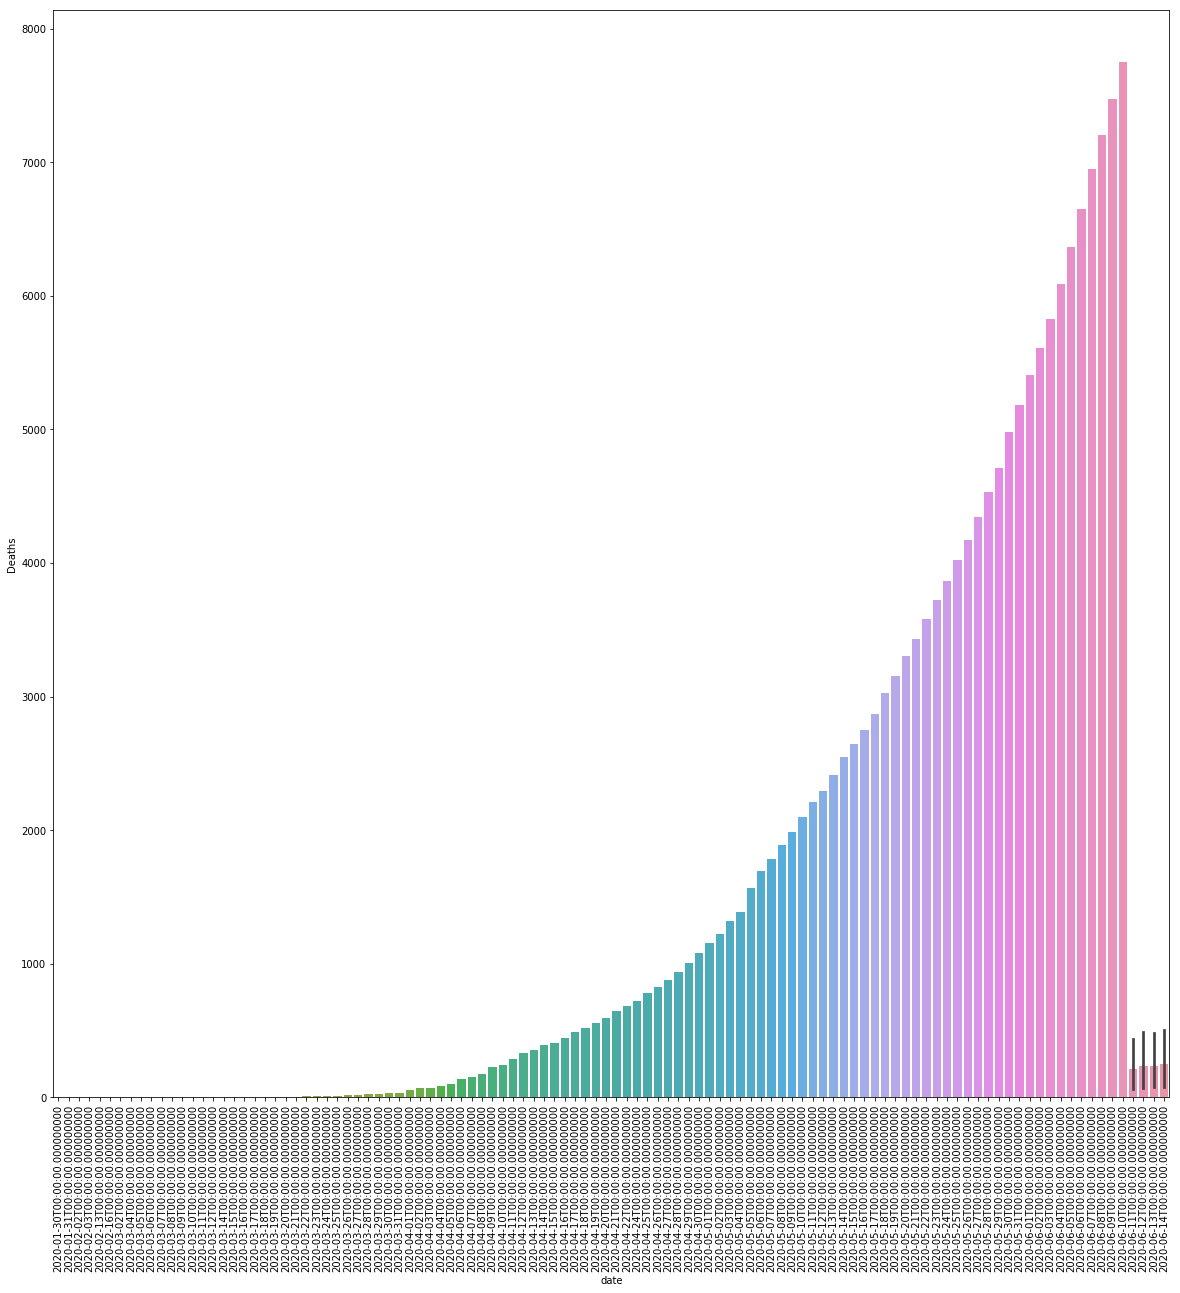

In [62]:
sns.barplot(x='date', y='Deaths', data=df1.loc[df1.Country_Region == 'India'])
plt.xticks(rotation=90)
# plt.yticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000])
plt.show()

### Recovery

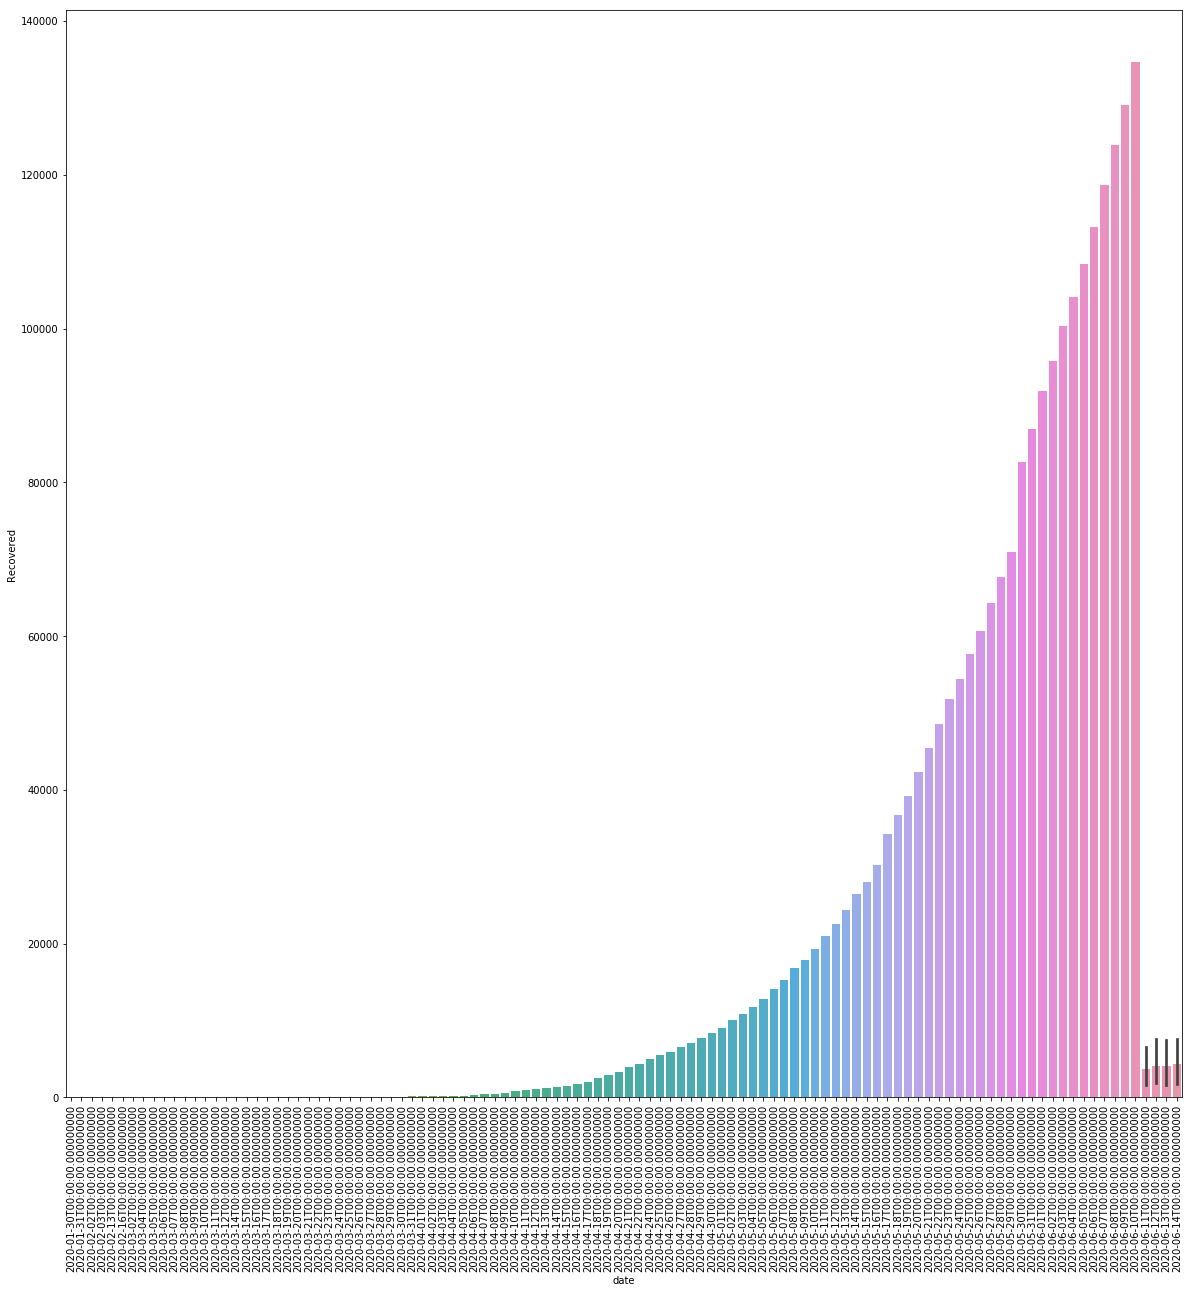

In [63]:
sns.barplot(x='date', y='Recovered', data=df1.loc[df1.Country_Region == 'India'])
plt.xticks(rotation=90)
# plt.yticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000])
plt.show()

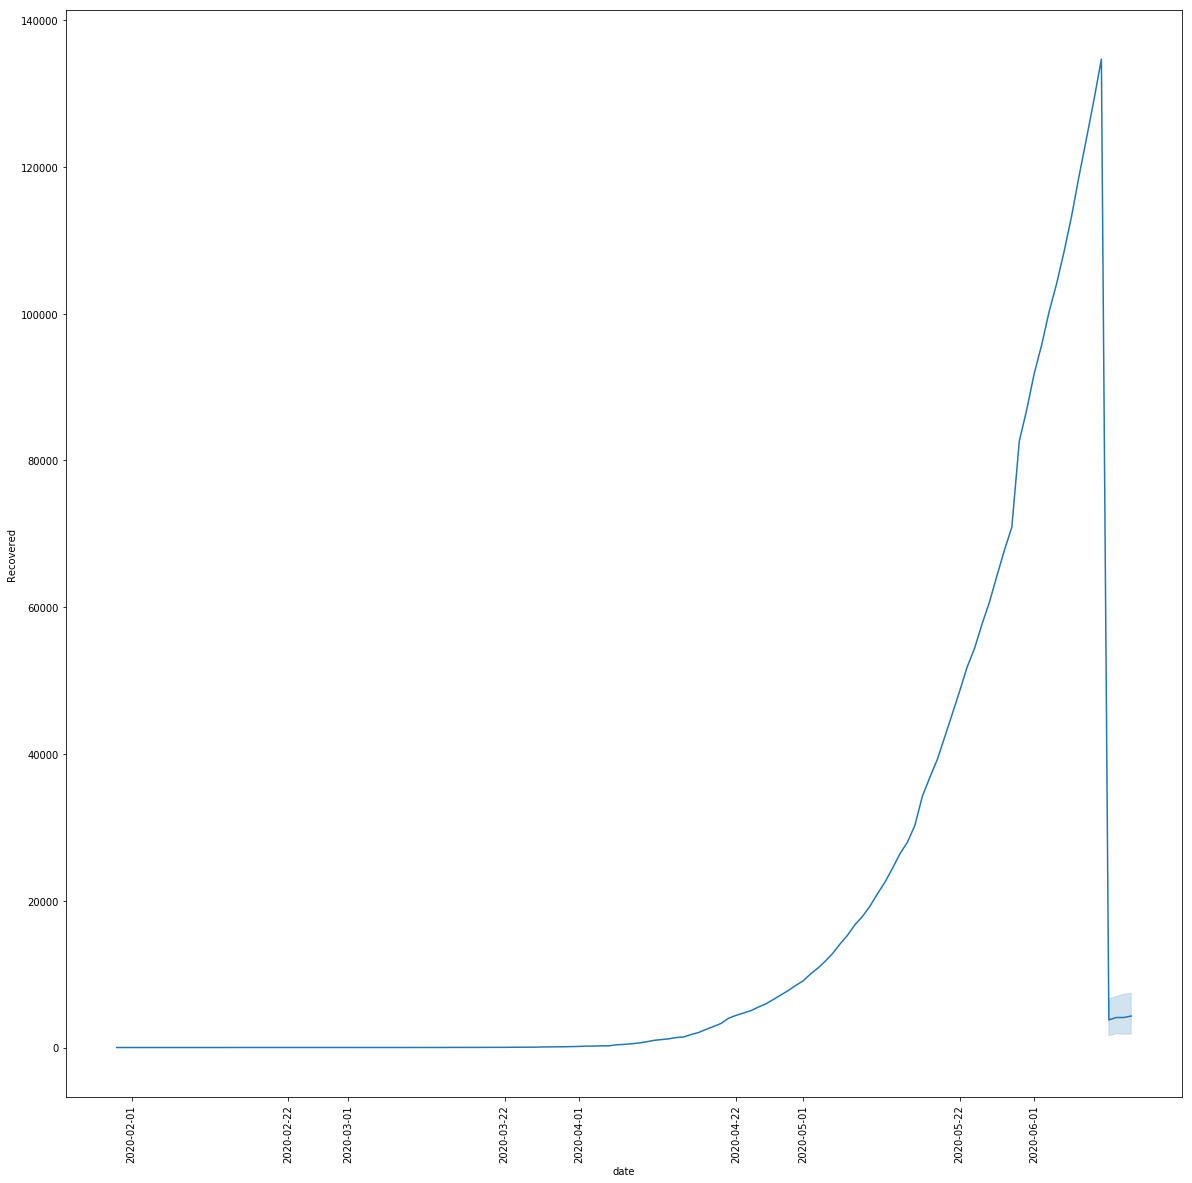

In [64]:
sns.lineplot(x='date', y='Recovered', data=df1.loc[df1.Country_Region == 'India'])
plt.xticks(rotation=90)
# plt.yticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000])
plt.show()

In [65]:
df3 = df1.loc[df1.date == yesterday].groupby('Country_Region').sum()

In [66]:
df3.tail(20)

Confirmed  Deaths  \
Country_Region                            
Thailand                   3129      58   
Timor-Leste                  24       0   
Togo                        525      13   
Trinidad and Tobago         117       8   
Tunisia                    1093      49   
Turkey                   175218    4778   
US                      2048986  114669   
Uganda                      686       0   
Ukraine                   30415     880   
United Arab Emirates      41499     287   
United Kingdom           294402   41566   
Uruguay                     847      23   
Uzbekistan                 4869      19   
Venezuela                  2879      23   
Vietnam                     333       0   
West Bank and Gaza          489       3   
Western Sahara                9       1   
Yemen                       632     139   
Zambia                     1321      10   
Zimbabwe                    343       4   

                      Recovered   Active  \
Country_Region                             
Thailand                   2987       84   
Timor-Leste                  24        0   
Togo                        279      233   
Trinidad and Tobago         109        0   
Tunisia                     995       49   
Turkey                   149102    21338   
US                       547386  1312426   
Uganda                      161      525   
Ukraine                   14075    15460   
United Arab Emirates      25946    15266   
United Kingdom             1282   251554   
Uruguay                     780       44   
Uzbekistan                 3758     1092   
Venezuela                   487     2369   
Vietnam                     323       10   
West Bank and Gaza          414       72   
Western Sahara                6        2   
Yemen                        28      465   
Zambia                     1104      207   
Zimbabwe                     51      288   

                      Active_Cases  
Country_Region                      
Thailand                        84  
Timor-Leste                      0  
Togo                           233  
Trinidad and Tobago              0  
Tunisia                         49  
Turkey                       21338  
US                         1386931  
Uganda                         525  
Ukraine                      15460  
United Arab Emirates         15266  
United Kingdom              251554  
Uruguay                         44  
Uzbekistan                    1092  
Venezuela                     2369  
Vietnam                         10  
West Bank and Gaza              72  
Western Sahara                   2  
Yemen                          465  
Zambia                         207  
Zimbabwe                       288

In [67]:
df3['Death_Recovery_Ratio'] = df3['Deaths'] / df3['Recovered']

In [68]:
top_20_highest_death_recovery_ratio = df3.sort_values('Death_Recovery_Ratio', ascending=False).head(20)

In [69]:
top_20_highest_death_recovery_ratio.index

Index(['MS Zaandam', 'Sweden', 'Netherlands',
       'United Kingdom', 'Yemen', 'Haiti',
       'Belgium', 'South Sudan', 'France',
       'Honduras', 'Suriname', 'Mauritania',
       'Bolivia', 'Hungary', 'US', 'Guatemala',
       'Italy', 'Philippines', 'Spain', 'Sudan'],
      dtype='object', name='Country_Region')

#### Note:

- Netherlands and UK have highest death to recovery rate i.e 1 person recovers when ~33 people die.

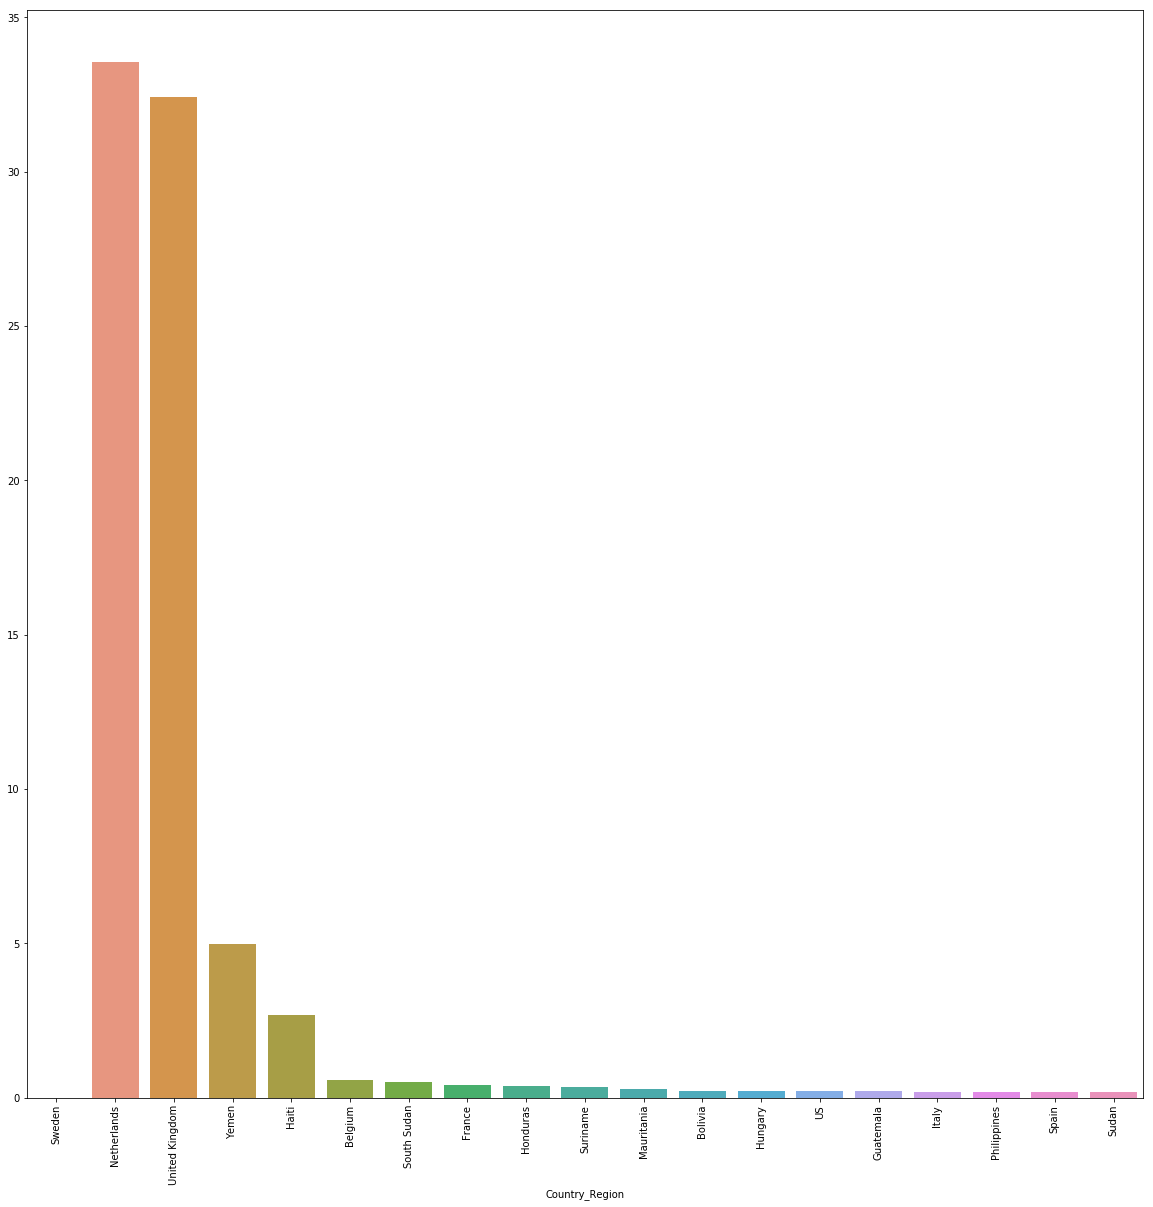

In [70]:
sns.barplot(x=top_20_highest_death_recovery_ratio.index[1:], y=top_20_highest_death_recovery_ratio['Death_Recovery_Ratio'].values[1:])
plt.xticks(rotation=90)
plt.show()

#### Data Cleaning

In [71]:
us_state_abbrev = """Alabama - AL

Alaska - AK

Arizona - AZ

Arkansas - AR

California - CA

Colorado - CO

Connecticut - CT

Delaware - DE

Florida - FL

Georgia - GA

Hawaii - HI

Idaho - ID

Illinois - IL

Indiana - IN

Iowa - IA

Kansas - KS

Kentucky - KY

Louisiana - LA

Maine - ME

Maryland - MD

Massachusetts - MA

Michigan - MI

Minnesota - MN

Mississippi - MS

Missouri - MO

Montana - MT

Nebraska - NE

Nevada - NV

New Hampshire - NH

New Jersey - NJ

New Mexico - NM

New York - NY

North Carolina - NC

North Dakota - ND

Ohio - OH

Oklahoma - OK

Oregon - OR

Pennsylvania - PA

Rhode Island - RI

South Carolina - SC

South Dakota - SD

Tennessee - TN

Texas - TX

Utah - UT

Vermont - VT

Virginia - VA

Washington - WA

West Virginia - WV

Wisconsin - WI

Wyoming - WY
"""

In [72]:
us_state_mapping = {}
pattern = re.compile(r'(\w+\s?\w+)\s+-\s+(\w+)', re.MULTILINE)
matches = pattern.finditer(us_state_abbrev) 
for match in matches:
    us_state_mapping[match.group(2)] = match.group(1)
    print(f"{match.group(2)} : {match.group(1)}")
us_state_mapping

AL : Alabama
AK : Alaska
AZ : Arizona
AR : Arkansas
CA : California
CO : Colorado
CT : Connecticut
DE : Delaware
FL : Florida
GA : Georgia
HI : Hawaii
ID : Idaho
IL : Illinois
IN : Indiana
IA : Iowa
KS : Kansas
KY : Kentucky
LA : Louisiana
ME : Maine
MD : Maryland
MA : Massachusetts
MI : Michigan
MN : Minnesota
MS : Mississippi
MO : Missouri
MT : Montana
NE : Nebraska
NV : Nevada
NH : New Hampshire
NJ : New Jersey
NM : New Mexico
NY : New York
NC : North Carolina
ND : North Dakota
OH : Ohio
OK : Oklahoma
OR : Oregon
PA : Pennsylvania
RI : Rhode Island
SC : South Carolina
SD : South Dakota
TN : Tennessee
TX : Texas
UT : Utah
VT : Vermont
VA : Virginia
WA : Washington
WV : West Virginia
WI : Wisconsin
WY : Wyoming


{'AL': 'Alabama',
 'AK': 'Alaska',
 'AZ': 'Arizona',
 'AR': 'Arkansas',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'HI': 'Hawaii',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'IA': 'Iowa',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'ME': 'Maine',
 'MD': 'Maryland',
 'MA': 'Massachusetts',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MS': 'Mississippi',
 'MO': 'Missouri',
 'MT': 'Montana',
 'NE': 'Nebraska',
 'NV': 'Nevada',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NY': 'New York',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VT': 'Vermont',
 'VA': 'Virginia',
 'WA': 'Washington',
 'WV': 'West Virginia',
 'WI': 'Wisconsin',
 'WY': 'Wyoming'}

In [73]:
df_us = df1.loc[(df1.Country_Region == 'US')]

In [74]:
df_us.Province_State.tail()

57887                        Guam
58048    Northern Mariana Islands
58090                 Puerto Rico
58103                   Recovered
58222              Virgin Islands
Name: Province_State, dtype: object

In [75]:
df_us.loc[:, 'state'] = df_us.Province_State.str.strip().str.split(',', n=1).apply(lambda x: x[-1])

/home/akash/Dev/python/venv/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/akash/Dev/python/venv/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [76]:
def map_us_state_abbreviation_to_state_name(abbrev):
    abbrev = abbrev.strip()
    if abbrev in us_state_mapping:
        return us_state_mapping[abbrev]
    elif 'Diamond Princess' in abbrev or 'Recovered' in abbrev:
        return np.nan
    
    else:
        return abbrev

In [77]:
df_us.head()

Confirmed  Deaths  Recovered FIPS Admin2  \
31           1       0          0  NaN    NaN   
69           1       0          0  NaN    NaN   
117          1       0          0  NaN    NaN   
118          1       0          0  NaN    NaN   
158          1       0          0  NaN    NaN   

    Province_State Country_Region  \
31      Washington             US   
69      Washington             US   
117     Washington             US   
118        Chicago             US   
158     Washington             US   

            Last_Update  Lat Long_  Active  \
31  2020-01-22 17:00:00  NaN   NaN       0   
69  2020-01-23 17:00:00  NaN   NaN       0   
117 2020-01-24 17:00:00  NaN   NaN       0   
118 2020-01-24 17:00:00  NaN   NaN       0   
158 2020-01-25 17:00:00  NaN   NaN       0   

    Combined_Key Incidence_Rate  \
31           NaN            NaN   
69           NaN            NaN   
117          NaN            NaN   
118          NaN            NaN   
158          NaN            NaN   

    Case-Fatality_Ratio       date  \
31                  NaN 2020-01-22   
69                  NaN 2020-01-23   
117                 NaN 2020-01-24   
118                 NaN 2020-01-24   
158                 NaN 2020-01-25   

     Active_Cases       state  
31              1  Washington  
69              1  Washington  
117             1  Washington  
118             1     Chicago  
158             1  Washington

In [78]:
df_us.loc[:, 'state'] = df_us['state'].map(map_us_state_abbreviation_to_state_name)

In [79]:
df_us = df_us.dropna(subset=['state'])

In [80]:
df5 = df_us[df_us.date == yesterday].groupby('state').sum()
df5.head()

Confirmed  Deaths  Recovered  \
state                                      
Alabama         23710     769          0   
Alaska            624      12          0   
Arizona         33039    1156          0   
Arkansas        11547     176          0   
California     146659    4978          0   

            Active  Active_Cases  
state                             
Alabama      22941         22941  
Alaska         612           612  
Arizona      31883         31883  
Arkansas     11371         11371  
California  141681        141681

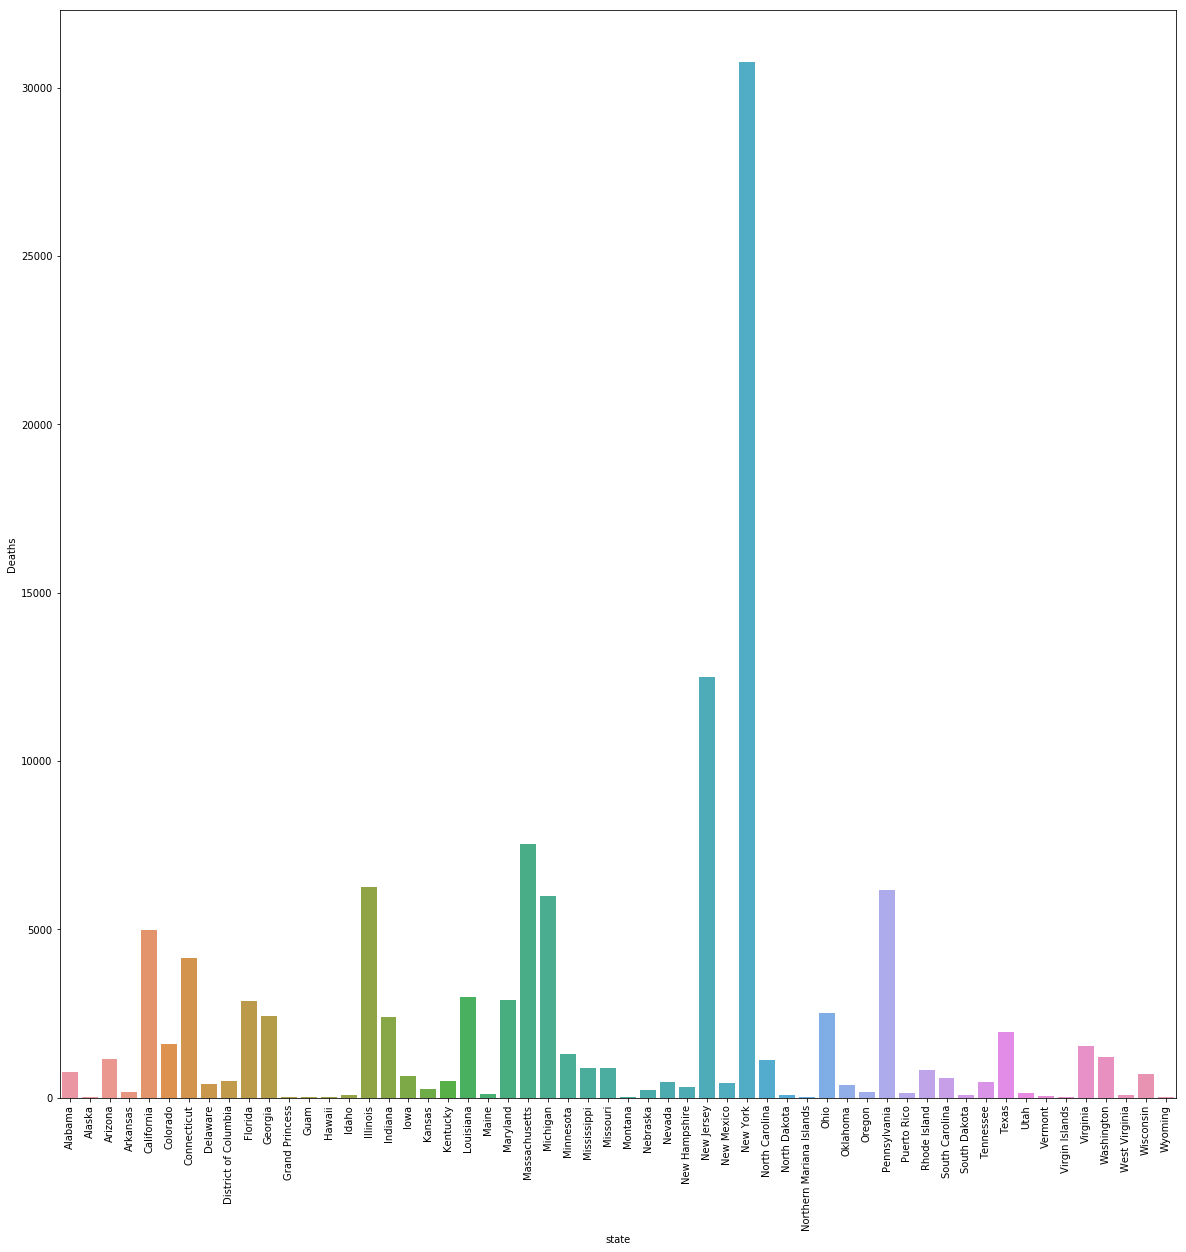

In [81]:
sns.barplot(x=df5.index, y=df5['Deaths'])
plt.xticks(rotation=90)
plt.show()

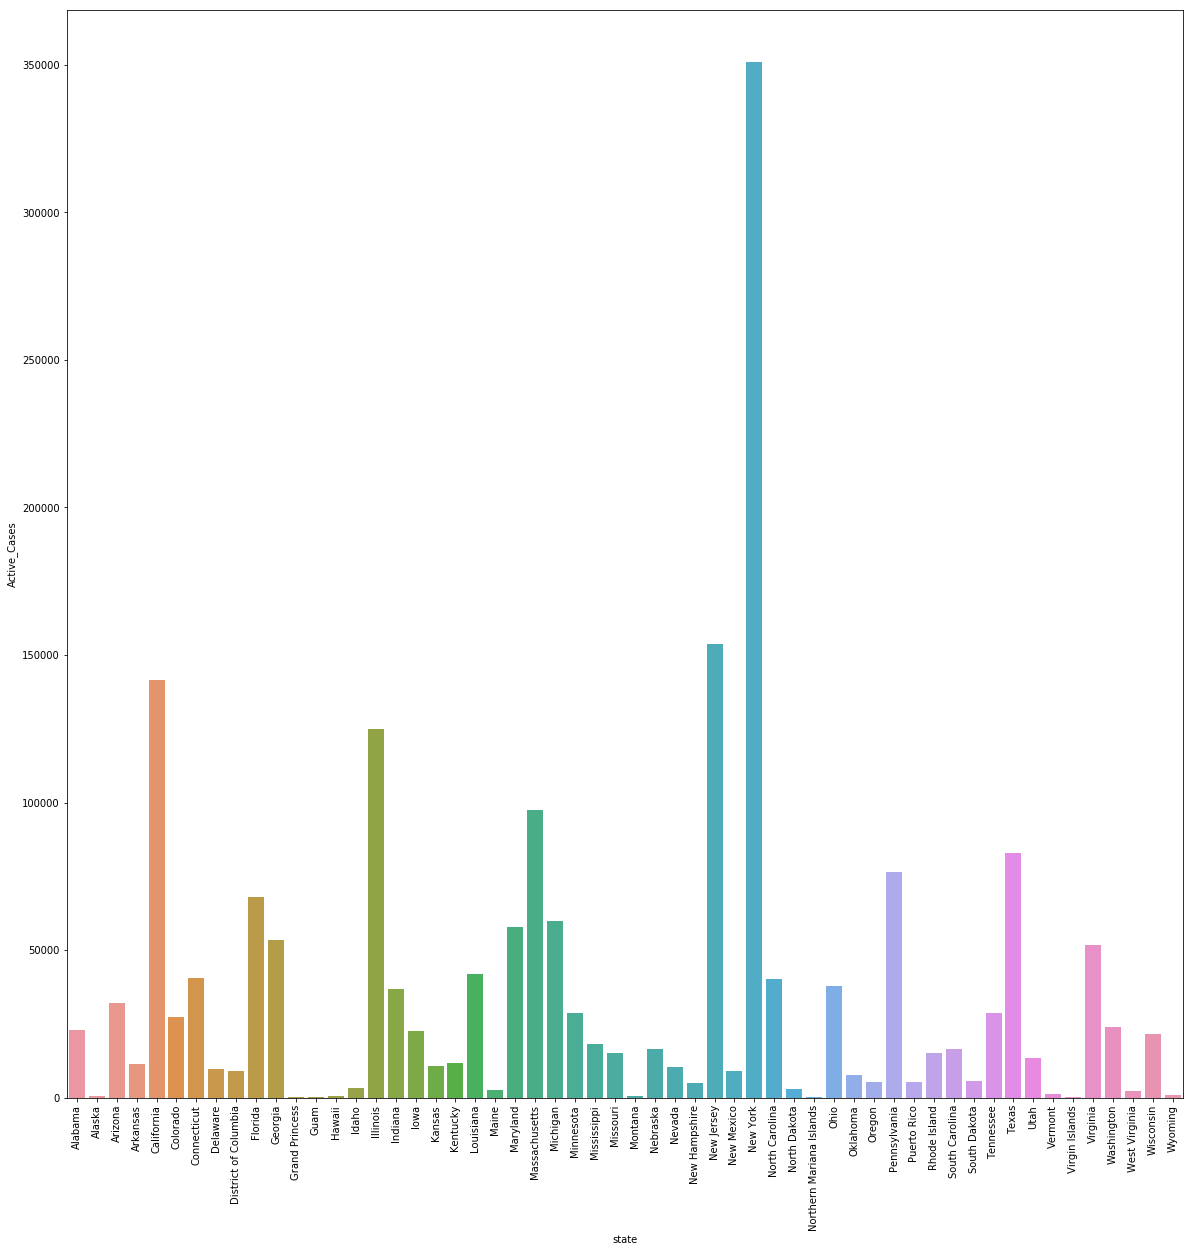

In [82]:
sns.barplot(x=df5.index, y=df5['Active_Cases'])
plt.xticks(rotation=90)
plt.show()

### Global Confirmed Cases

In [83]:
base_dir = '../data/Global/csse_covid_19_time_series/'

In [84]:
abs_path = os.path.abspath(base_dir)

In [85]:
files = os.listdir(abs_path)
csv_files = filter(lambda file: '.csv' in file, files)
csv_abs_path = [os.path.join(abs_path, csv_file) for csv_file in csv_files]

In [86]:
csv_abs_path = sorted(csv_abs_path)

In [87]:
columns = []
with open('../data/Global/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    columns = next(spamreader) 
    l = [i for i in spamreader]

In [88]:
df_global_confirmed = pd.DataFrame(l, columns=columns)

In [89]:
df_global_confirmed.head()

Province/State Country/Region       Lat  \
0                   Afghanistan      33.0   
1                       Albania   41.1533   
2                       Algeria   28.0339   
3                       Andorra   42.5063   
4                        Angola  -11.2027   

      Long 1/22/20 1/23/20 1/24/20 1/25/20  \
0     65.0       0       0       0       0   
1  20.1683       0       0       0       0   
2   1.6596       0       0       0       0   
3   1.5218       0       0       0       0   
4  17.8739       0       0       0       0   

  1/26/20 1/27/20 1/28/20 1/29/20 1/30/20  \
0       0       0       0       0       0   
1       0       0       0       0       0   
2       0       0       0       0       0   
3       0       0       0       0       0   
4       0       0       0       0       0   

  1/31/20 2/1/20 2/2/20 2/3/20 2/4/20 2/5/20  \
0       0      0      0      0      0      0   
1       0      0      0      0      0      0   
2       0      0      0      0      0      0   
3       0      0      0      0      0      0   
4       0      0      0      0      0      0   

  2/6/20 2/7/20 2/8/20 2/9/20 2/10/20 2/11/20  \
0      0      0      0      0       0       0   
1      0      0      0      0       0       0   
2      0      0      0      0       0       0   
3      0      0      0      0       0       0   
4      0      0      0      0       0       0   

    ...   5/20/20 5/21/20 5/22/20 5/23/20  \
0   ...      8145    8676    9216    9998   
1   ...       964     969     981     989   
2   ...      7542    7728    7918    8113   
3   ...       762     762     762     762   
4   ...        52      58      60      61   

  5/24/20 5/25/20 5/26/20 5/27/20 5/28/20  \
0   10582   11173   11831   12456   13036   
1     998    1004    1029    1050    1076   
2    8306    8503    8697    8857    8997   
3     762     763     763     763     763   
4      69      70      70      71      74   

  5/29/20 5/30/20 5/31/20 6/1/20 6/2/20 6/3/20  \
0   13659   14525   15205  15750  16509  17267   
1    1099    1122    1137   1143   1164   1184   
2    9134    9267    9394   9513   9626   9733   
3     764     764     764    765    844    851   
4      81      84      86     86     86     86   

  6/4/20 6/5/20 6/6/20 6/7/20 6/8/20 6/9/20  \
0  18054  18969  19551  20342  20917  21459   
1   1197   1212   1232   1246   1263   1299   
2   9831   9935  10050  10154  10265  10382   
3    852    852    852    852    852    852   
4     86     86     88     91     92     96   

  6/10/20 6/11/20 6/12/20 6/13/20  
0   22142   22890   23546   24102  
1    1341    1385    1416    1464  
2   10484   10589   10698   10810  
3     852     852     853     853  
4     113     118     130     138  

[5 rows x 148 columns]

In [90]:
df_global_confirmed_min = df_global_confirmed.drop(columns=['Province/State', 'Lat', 'Long'])

In [91]:
df_global_confirmed_min.columns

Index(['Country/Region', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20',
       '1/27/20', '1/28/20', '1/29/20',
       '1/30/20',
       ...
       '6/4/20', '6/5/20', '6/6/20', '6/7/20',
       '6/8/20', '6/9/20', '6/10/20', '6/11/20',
       '6/12/20', '6/13/20'],
      dtype='object', length=145)

In [92]:
list_of_columns = [col for col in df_global_confirmed_min.columns if 'Country' not in col]

In [93]:
df_global_confirmed_min.columns[1:]

Index(['1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20',
       '1/31/20',
       ...
       '6/4/20', '6/5/20', '6/6/20', '6/7/20',
       '6/8/20', '6/9/20', '6/10/20', '6/11/20',
       '6/12/20', '6/13/20'],
      dtype='object', length=144)

In [94]:
df_trans = df_global_confirmed_min.transpose()

In [95]:
df_trans.head()

0        1        2    \
Country/Region  Afghanistan  Albania  Algeria   
1/22/20                   0        0        0   
1/23/20                   0        0        0   
1/24/20                   0        0        0   
1/25/20                   0        0        0   

                    3       4    \
Country/Region  Andorra  Angola   
1/22/20               0       0   
1/23/20               0       0   
1/24/20               0       0   
1/25/20               0       0   

                                5          6    \
Country/Region  Antigua and Barbuda  Argentina   
1/22/20                           0          0   
1/23/20                           0          0   
1/24/20                           0          0   
1/25/20                           0          0   

                    7          8          9    \
Country/Region  Armenia  Australia  Australia   
1/22/20               0          0          0   
1/23/20               0          0          0   
1/24/20               0          0          0   
1/25/20               0          0          0   

                      10         11         12   \
Country/Region  Australia  Australia  Australia   
1/22/20                 0          0          0   
1/23/20                 0          0          0   
1/24/20                 0          0          0   
1/25/20                 0          0          0   

                      13         14         15   \
Country/Region  Australia  Australia  Australia   
1/22/20                 0          0          0   
1/23/20                 0          0          0   
1/24/20                 0          0          0   
1/25/20                 0          0          0   

                    16          17       18   \
Country/Region  Austria  Azerbaijan  Bahamas   
1/22/20               0           0        0   
1/23/20               0           0        0   
1/24/20               0           0        0   
1/25/20               0           0        0   

                    19          20        21   \
Country/Region  Bahrain  Bangladesh  Barbados   
1/22/20               0           0         0   
1/23/20               0           0         0   
1/24/20               0           0         0   
1/25/20               0           0         0   

                    22       23     24   \
Country/Region  Belarus  Belgium  Benin   
1/22/20               0        0      0   
1/23/20               0        0      0   
1/24/20               0        0      0   
1/25/20               0        0      0   

                 ...               241   242  \
Country/Region   ...     Guinea-Bissau  Mali   
1/22/20          ...                 0     0   
1/23/20          ...                 0     0   
1/24/20          ...                 0     0   
1/25/20          ...                 0     0   

                                  243     244  \
Country/Region  Saint Kitts and Nevis  Canada   
1/22/20                             0       0   
1/23/20                             0       0   
1/24/20                             0       0   
1/25/20                             0       0   

                   245     246    247  \
Country/Region  Canada  Kosovo  Burma   
1/22/20              0       0      0   
1/23/20              0       0      0   
1/24/20              0       0      0   
1/25/20              0       0      0   

                           248             249  \
Country/Region  United Kingdom  United Kingdom   
1/22/20                      0               0   
1/23/20                      0               0   
1/24/20                      0               0   
1/25/20                      0               0   

                           250         251  \
Country/Region  United Kingdom  MS Zaandam   
1/22/20                      0           0   
1/23/20                      0           0   
1/24/20                      0           0   
1/25/20                      0           0   

                     252      253           254  \
Count

In [96]:
df_trans.iloc[0, :]

0                Afghanistan
1                    Albania
2                    Algeria
3                    Andorra
4                     Angola
5        Antigua and Barbuda
6                  Argentina
7                    Armenia
8                  Australia
9                  Australia
10                 Australia
11                 Australia
12                 Australia
13                 Australia
14                 Australia
15                 Australia
16                   Austria
17                Azerbaijan
18                   Bahamas
19                   Bahrain
20                Bangladesh
21                  Barbados
22                   Belarus
23                   Belgium
24                     Benin
               ...          
241            Guinea-Bissau
242                     Mali
243    Saint Kitts and Nevis
244                   Canada
245                   Canada
246                   Kosovo
247                    Burma
248           United Kingdom
249           

In [97]:
df_global_confirmed_min.head()

Country/Region 1/22/20 1/23/20 1/24/20  \
0    Afghanistan       0       0       0   
1        Albania       0       0       0   
2        Algeria       0       0       0   
3        Andorra       0       0       0   
4         Angola       0       0       0   

  1/25/20 1/26/20 1/27/20 1/28/20 1/29/20  \
0       0       0       0       0       0   
1       0       0       0       0       0   
2       0       0       0       0       0   
3       0       0       0       0       0   
4       0       0       0       0       0   

  1/30/20 1/31/20 2/1/20 2/2/20 2/3/20 2/4/20  \
0       0       0      0      0      0      0   
1       0       0      0      0      0      0   
2       0       0      0      0      0      0   
3       0       0      0      0      0      0   
4       0       0      0      0      0      0   

  2/5/20 2/6/20 2/7/20 2/8/20 2/9/20 2/10/20  \
0      0      0      0      0      0       0   
1      0      0      0      0      0       0   
2      0      0      0      0      0       0   
3      0      0      0      0      0       0   
4      0      0      0      0      0       0   

  2/11/20 2/12/20 2/13/20 2/14/20   ...    \
0       0       0       0       0   ...     
1       0       0       0       0   ...     
2       0       0       0       0   ...     
3       0       0       0       0   ...     
4       0       0       0       0   ...     

  5/20/20 5/21/20 5/22/20 5/23/20 5/24/20  \
0    8145    8676    9216    9998   10582   
1     964     969     981     989     998   
2    7542    7728    7918    8113    8306   
3     762     762     762     762     762   
4      52      58      60      61      69   

  5/25/20 5/26/20 5/27/20 5/28/20 5/29/20  \
0   11173   11831   12456   13036   13659   
1    1004    1029    1050    1076    1099   
2    8503    8697    8857    8997    9134   
3     763     763     763     763     764   
4      70      70      71      74      81   

  5/30/20 5/31/20 6/1/20 6/2/20 6/3/20 6/4/20  \
0   14525   15205  15750  16509  17267  18054   
1    1122    1137   1143   1164   1184   1197   
2    9267    9394   9513   9626   9733   9831   
3     764     764    765    844    851    852   
4      84      86     86     86     86     86   

  6/5/20 6/6/20 6/7/20 6/8/20 6/9/20 6/10/20  \
0  18969  19551  20342  20917  21459   22142   
1   1212   1232   1246   1263   1299    1341   
2   9935  10050  10154  10265  10382   10484   
3    852    852    852    852    852     852   
4     86     88     91     92     96     113   

  6/11/20 6/12/20 6/13/20  
0   22890   23546   24102  
1    1385    1416    1464  
2   10589   10698   10810  
3     852     853     853  
4     118     130     138  

[5 rows x 145 columns]

In [98]:
df_trans.columns = df_trans.iloc[0, :]

In [99]:
df_trans = df_trans.iloc[1:, :]

In [100]:
df_trans.head()

Country/Region Afghanistan Albania Algeria  \
1/22/20                  0       0       0   
1/23/20                  0       0       0   
1/24/20                  0       0       0   
1/25/20                  0       0       0   
1/26/20                  0       0       0   

Country/Region Andorra Angola  \
1/22/20              0      0   
1/23/20              0      0   
1/24/20              0      0   
1/25/20              0      0   
1/26/20              0      0   

Country/Region Antigua and Barbuda Argentina  \
1/22/20                          0         0   
1/23/20                          0         0   
1/24/20                          0         0   
1/25/20                          0         0   
1/26/20                          0         0   

Country/Region Armenia Australia Australia  \
1/22/20              0         0         0   
1/23/20              0         0         0   
1/24/20              0         0         0   
1/25/20              0         0         0   
1/26/20              0         0         3   

Country/Region Australia Australia Australia  \
1/22/20                0         0         0   
1/23/20                0         0         0   
1/24/20                0         0         0   
1/25/20                0         0         0   
1/26/20                0         0         0   

Country/Region Australia Australia Australia  \
1/22/20                0         0         0   
1/23/20                0         0         0   
1/24/20                0         0         0   
1/25/20                0         0         0   
1/26/20                0         1         0   

Country/Region Austria Azerbaijan Bahamas  \
1/22/20              0          0       0   
1/23/20              0          0       0   
1/24/20              0          0       0   
1/25/20              0          0       0   
1/26/20              0          0       0   

Country/Region Bahrain Bangladesh Barbados  \
1/22/20              0          0        0   
1/23/20              0          0        0   
1/24/20              0          0        0   
1/25/20              0          0        0   
1/26/20              0          0        0   

Country/Region Belarus Belgium Benin   ...    \
1/22/20              0       0     0   ...     
1/23/20              0       0     0   ...     
1/24/20              0       0     0   ...     
1/25/20              0       0     0   ...     
1/26/20              0       0     0   ...     

Country/Region Guinea-Bissau Mali  \
1/22/20                    0    0   
1/23/20                    0    0   
1/24/20                    0    0   
1/25/20                    0    0   
1/26/20                    0    0   

Country/Region Saint Kitts and Nevis Canada  \
1/22/20                            0      0   
1/23/20                            0      0   
1/24/20                            0      0   
1/25/20                            0      0   
1/26/20                            0      0   

Country/Region Canada Kosovo Burma  \
1/22/20             0      0     0   
1/23/20             0      0     0   
1/24/20             0      0     0   
1/25/20             0      0     0   
1/26/20             0      0     0   

Country/Region United Kingdom United Kingdom  \
1/22/20                     0              0   
1/23/20                     0              0   
1/24/20                     0              0   
1/25/20                     0              0   
1/26/20                     0              0   

Country/Region United Kingdom MS Zaandam  \
1/22/20                     0          0   
1/23/20                     0          0   
1/24/20                     0          0   
1/25/20                     0          0   
1/26/20                     0          0   

Country/Region Botswana Burundi Sierra Leone  \
1/22/20               0       0            0   
1/23/20               0       0            0   
1/24/20               0       0            0   
1/25/20               0       0            0   
1/26/20       

In [101]:
df_trans = df_trans.astype(np.int)
df_trans.index = pd.to_datetime(df_trans.index)

In [102]:
df_trans.dtypes

Country/Region
Afghanistan              int64
Albania                  int64
Algeria                  int64
Andorra                  int64
Angola                   int64
Antigua and Barbuda      int64
Argentina                int64
Armenia                  int64
Australia                int64
Australia                int64
Australia                int64
Australia                int64
Australia                int64
Australia                int64
Australia                int64
Australia                int64
Austria                  int64
Azerbaijan               int64
Bahamas                  int64
Bahrain                  int64
Bangladesh               int64
Barbados                 int64
Belarus                  int64
Belgium                  int64
Benin                    int64
                         ...  
Guinea-Bissau            int64
Mali                     int64
Saint Kitts and Nevis    int64
Canada                   int64
Canada                   int64
Kosovo                  

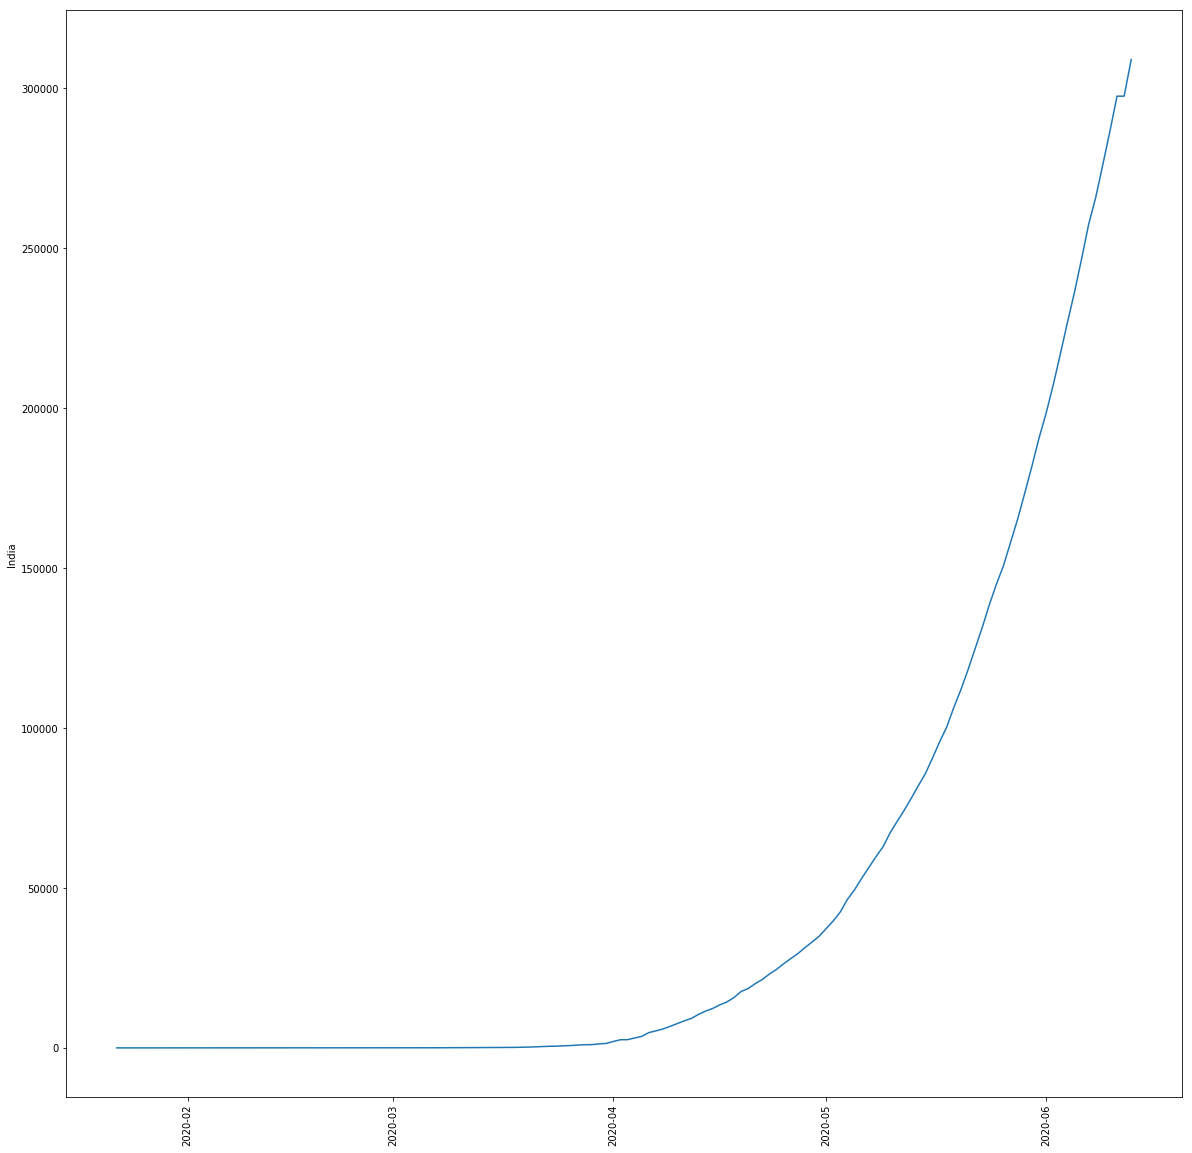

In [103]:
sns.lineplot(x=df_trans.index, y=df_trans['India'])
plt.xticks(rotation=90)
plt.show()

In [104]:
df_uk = df_trans['United Kingdom']

In [105]:
flag = [False, False, False, False, False, False, True, False, False, False, False, False]

In [106]:
df_trans['UK'] = df_uk.loc[:, flag]

In [107]:
df_netherlands = df_trans['Netherlands']

In [108]:
df_netherlands.columns

Index(['Netherlands', 'Netherlands',
       'Netherlands', 'Netherlands',
       'Netherlands'],
      dtype='object', name='Country/Region')

In [109]:
df_netherlands.tail()

Country/Region  Netherlands  Netherlands  \
2020-06-09              101           21   
2020-06-10              101           22   
2020-06-11              101           22   
2020-06-12              101           22   
2020-06-13              101           22   

Country/Region  Netherlands  Netherlands  \
2020-06-09               77        47903   
2020-06-10               77        48087   
2020-06-11               77        48251   
2020-06-12               77        48461   
2020-06-13               77        48640   

Country/Region  Netherlands  
2020-06-09                7  
2020-06-10                7  
2020-06-11                7  
2020-06-12                7  
2020-06-13                7

In [110]:
flag = [False, False, False, True]

In [111]:
df_netherlands.loc[:, flag]

Country/Region  Netherlands
2020-01-22                0
2020-01-23                0
2020-01-24                0
2020-01-25                0
2020-01-26                0
2020-01-27                0
2020-01-28                0
2020-01-29                0
2020-01-30                0
2020-01-31                0
2020-02-01                0
2020-02-02                0
2020-02-03                0
2020-02-04                0
2020-02-05                0
2020-02-06                0
2020-02-07                0
2020-02-08                0
2020-02-09                0
2020-02-10                0
2020-02-11                0
2020-02-12                0
2020-02-13                0
2020-02-14                0
2020-02-15                0
...                     ...
2020-05-20            44447
2020-05-21            44700
2020-05-22            44888
2020-05-23            45064
2020-05-24            45236
2020-05-25            45445
2020-05-26            45578
2020-05-27            45768
2020-05-28            45950
2020-05-29            46126
2020-05-30            46257
2020-05-31            46442
2020-06-01            46545
2020-06-02            46647
2020-06-03            46733
2020-06-04            46942
2020-06-05            47152
2020-06-06            47335
2020-06-07            47574
2020-06-08            47739
2020-06-09            47903
2020-06-10            48087
2020-06-11            48251
2020-06-12            48461
2020-06-13            48640

[144 rows x 1 columns]

In [112]:
df_trans['Holland'] = df_netherlands.loc[:, flag]

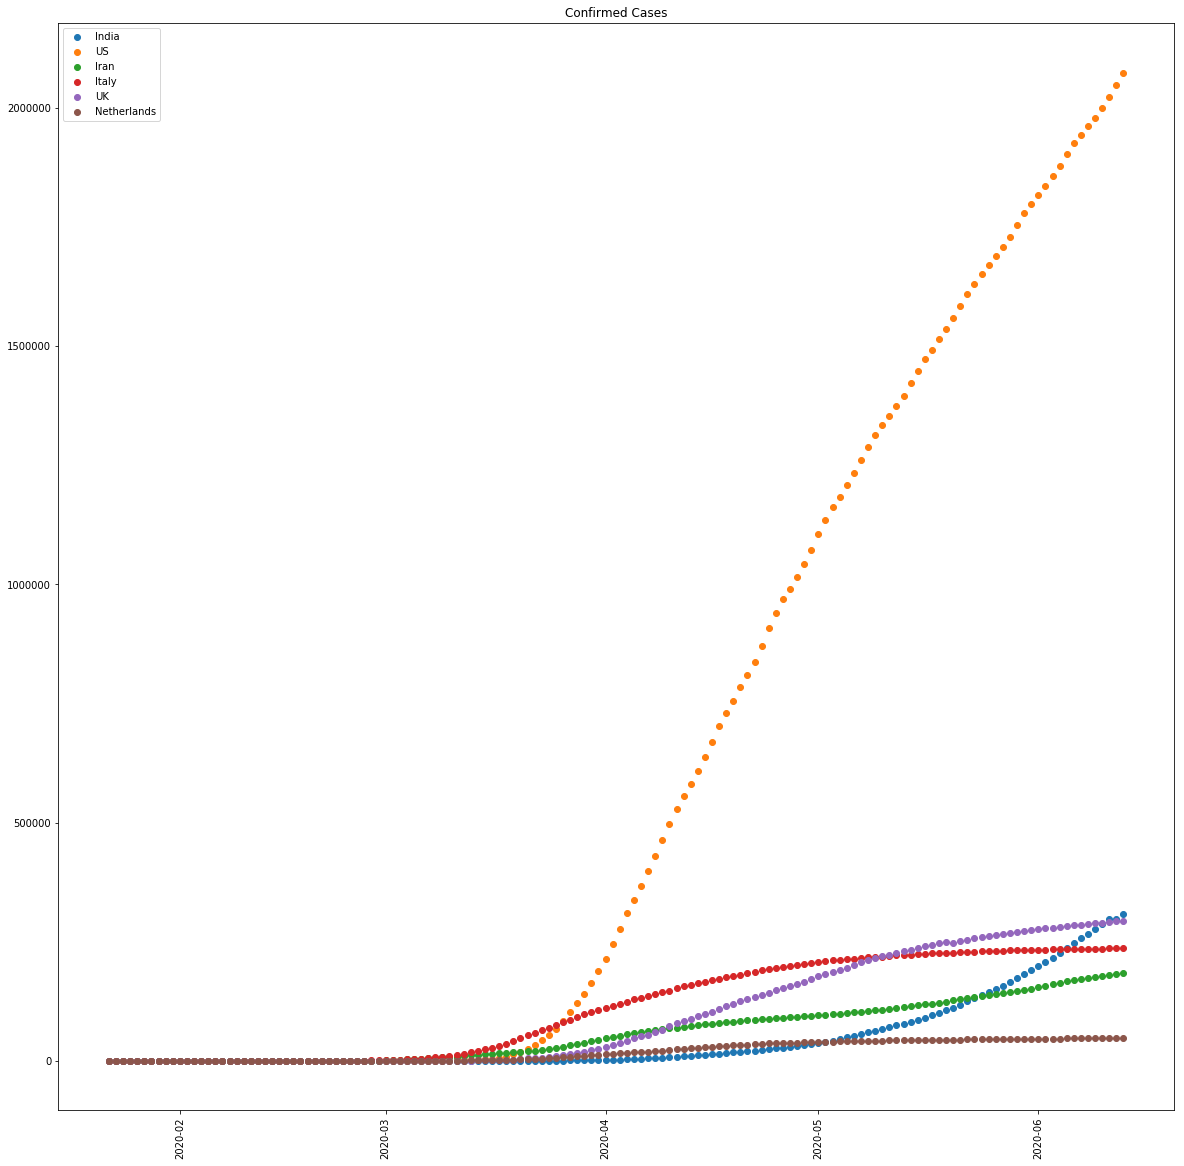

In [113]:
plt.plot_date(x=df_trans.index, y=df_trans['India'], label='India')
plt.plot_date(x=df_trans.index, y=df_trans['US'], label='US')
plt.plot_date(x=df_trans.index, y=df_trans['Iran'], label='Iran')
plt.plot_date(x=df_trans.index, y=df_trans['Italy'], label='Italy')
plt.plot_date(x=df_trans.index, y=df_trans['UK'], label='UK')
plt.plot_date(x=df_trans.index, y=df_trans['Holland'], label='Netherlands')
plt.xticks(rotation=90)
plt.title('Confirmed Cases')
plt.legend()
plt.show()

### Global Deaths

In [114]:
columns = []
with open('../data/Global/csse_covid_19_time_series/time_series_covid19_deaths_global.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    columns = next(spamreader) 
    l = [i for i in spamreader]

In [115]:
columns

['Province/State',
 'Country/Region',
 'Lat',
 'Long',
 '1/22/20',
 '1/23/20',
 '1/24/20',
 '1/25/20',
 '1/26/20',
 '1/27/20',
 '1/28/20',
 '1/29/20',
 '1/30/20',
 '1/31/20',
 '2/1/20',
 '2/2/20',
 '2/3/20',
 '2/4/20',
 '2/5/20',
 '2/6/20',
 '2/7/20',
 '2/8/20',
 '2/9/20',
 '2/10/20',
 '2/11/20',
 '2/12/20',
 '2/13/20',
 '2/14/20',
 '2/15/20',
 '2/16/20',
 '2/17/20',
 '2/18/20',
 '2/19/20',
 '2/20/20',
 '2/21/20',
 '2/22/20',
 '2/23/20',
 '2/24/20',
 '2/25/20',
 '2/26/20',
 '2/27/20',
 '2/28/20',
 '2/29/20',
 '3/1/20',
 '3/2/20',
 '3/3/20',
 '3/4/20',
 '3/5/20',
 '3/6/20',
 '3/7/20',
 '3/8/20',
 '3/9/20',
 '3/10/20',
 '3/11/20',
 '3/12/20',
 '3/13/20',
 '3/14/20',
 '3/15/20',
 '3/16/20',
 '3/17/20',
 '3/18/20',
 '3/19/20',
 '3/20/20',
 '3/21/20',
 '3/22/20',
 '3/23/20',
 '3/24/20',
 '3/25/20',
 '3/26/20',
 '3/27/20',
 '3/28/20',
 '3/29/20',
 '3/30/20',
 '3/31/20',
 '4/1/20',
 '4/2/20',
 '4/3/20',
 '4/4/20',
 '4/5/20',
 '4/6/20',
 '4/7/20',
 '4/8/20',
 '4/9/20',
 '4/10/20',
 '4/11/20',


In [116]:
df_global_deaths = pd.DataFrame(l, columns=columns)

In [117]:
df_global_deaths.head()

Province/State Country/Region       Lat  \
0                   Afghanistan      33.0   
1                       Albania   41.1533   
2                       Algeria   28.0339   
3                       Andorra   42.5063   
4                        Angola  -11.2027   

      Long 1/22/20 1/23/20 1/24/20 1/25/20  \
0     65.0       0       0       0       0   
1  20.1683       0       0       0       0   
2   1.6596       0       0       0       0   
3   1.5218       0       0       0       0   
4  17.8739       0       0       0       0   

  1/26/20 1/27/20 1/28/20 1/29/20 1/30/20  \
0       0       0       0       0       0   
1       0       0       0       0       0   
2       0       0       0       0       0   
3       0       0       0       0       0   
4       0       0       0       0       0   

  1/31/20 2/1/20 2/2/20 2/3/20 2/4/20 2/5/20  \
0       0      0      0      0      0      0   
1       0      0      0      0      0      0   
2       0      0      0      0      0      0   
3       0      0      0      0      0      0   
4       0      0      0      0      0      0   

  2/6/20 2/7/20 2/8/20 2/9/20 2/10/20 2/11/20  \
0      0      0      0      0       0       0   
1      0      0      0      0       0       0   
2      0      0      0      0       0       0   
3      0      0      0      0       0       0   
4      0      0      0      0       0       0   

    ...   5/20/20 5/21/20 5/22/20 5/23/20  \
0   ...       187     193     205     216   
1   ...        31      31      31      31   
2   ...       568     575     582     592   
3   ...        51      51      51      51   
4   ...         3       3       3       4   

  5/24/20 5/25/20 5/26/20 5/27/20 5/28/20  \
0     218     219     220     227     235   
1      32      32      33      33      33   
2     600     609     617     623     630   
3      51      51      51      51      51   
4       4       4       4       4       4   

  5/29/20 5/30/20 5/31/20 6/1/20 6/2/20 6/3/20  \
0     246     249     257    265    270    294   
1      33      33      33     33     33     33   
2     638     646     653    661    667    673   
3      51      51      51     51     51     51   
4       4       4       4      4      4      4   

  6/4/20 6/5/20 6/6/20 6/7/20 6/8/20 6/9/20  \
0    300    309    327    357    369    384   
1     33     33     34     34     34     34   
2    681    690    698    707    715    724   
3     51     51     51     51     51     51   
4      4      4      4      4      4      4   

  6/10/20 6/11/20 6/12/20 6/13/20  
0     405     426     446     451  
1      34      35      36      36  
2     732     741     751     760  
3      51      51      51      51  
4       4       5       5       6  

[5 rows x 148 columns]

In [118]:
df_global_deaths_min = df_global_deaths.drop(columns=['Province/State', 'Lat', 'Long'])

In [119]:
df_global_deaths_min.columns

Index(['Country/Region', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20',
       '1/27/20', '1/28/20', '1/29/20',
       '1/30/20',
       ...
       '6/4/20', '6/5/20', '6/6/20', '6/7/20',
       '6/8/20', '6/9/20', '6/10/20', '6/11/20',
       '6/12/20', '6/13/20'],
      dtype='object', length=145)

In [120]:
list_of_columns = [col for col in df_global_confirmed_min.columns if 'Country' not in col]

In [121]:
df_global_deaths_min.columns[1:]

Index(['1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20',
       '1/31/20',
       ...
       '6/4/20', '6/5/20', '6/6/20', '6/7/20',
       '6/8/20', '6/9/20', '6/10/20', '6/11/20',
       '6/12/20', '6/13/20'],
      dtype='object', length=144)

In [122]:
df_trans_deaths = df_global_deaths_min.transpose()

In [123]:
df_trans_deaths.head()

0        1        2    \
Country/Region  Afghanistan  Albania  Algeria   
1/22/20                   0        0        0   
1/23/20                   0        0        0   
1/24/20                   0        0        0   
1/25/20                   0        0        0   

                    3       4    \
Country/Region  Andorra  Angola   
1/22/20               0       0   
1/23/20               0       0   
1/24/20               0       0   
1/25/20               0       0   

                                5          6    \
Country/Region  Antigua and Barbuda  Argentina   
1/22/20                           0          0   
1/23/20                           0          0   
1/24/20                           0          0   
1/25/20                           0          0   

                    7          8          9    \
Country/Region  Armenia  Australia  Australia   
1/22/20               0          0          0   
1/23/20               0          0          0   
1/24/20               0          0          0   
1/25/20               0          0          0   

                      10         11         12   \
Country/Region  Australia  Australia  Australia   
1/22/20                 0          0          0   
1/23/20                 0          0          0   
1/24/20                 0          0          0   
1/25/20                 0          0          0   

                      13         14         15   \
Country/Region  Australia  Australia  Australia   
1/22/20                 0          0          0   
1/23/20                 0          0          0   
1/24/20                 0          0          0   
1/25/20                 0          0          0   

                    16          17       18   \
Country/Region  Austria  Azerbaijan  Bahamas   
1/22/20               0           0        0   
1/23/20               0           0        0   
1/24/20               0           0        0   
1/25/20               0           0        0   

                    19          20        21   \
Country/Region  Bahrain  Bangladesh  Barbados   
1/22/20               0           0         0   
1/23/20               0           0         0   
1/24/20               0           0         0   
1/25/20               0           0         0   

                    22       23     24   \
Country/Region  Belarus  Belgium  Benin   
1/22/20               0        0      0   
1/23/20               0        0      0   
1/24/20               0        0      0   
1/25/20               0        0      0   

                 ...               241   242  \
Country/Region   ...     Guinea-Bissau  Mali   
1/22/20          ...                 0     0   
1/23/20          ...                 0     0   
1/24/20          ...                 0     0   
1/25/20          ...                 0     0   

                                  243     244  \
Country/Region  Saint Kitts and Nevis  Canada   
1/22/20                             0       0   
1/23/20                             0       0   
1/24/20                             0       0   
1/25/20                             0       0   

                   245     246    247  \
Country/Region  Canada  Kosovo  Burma   
1/22/20              0       0      0   
1/23/20              0       0      0   
1/24/20              0       0      0   
1/25/20              0       0      0   

                           248             249  \
Country/Region  United Kingdom  United Kingdom   
1/22/20                      0               0   
1/23/20                      0               0   
1/24/20                      0               0   
1/25/20                      0               0   

                           250         251  \
Country/Region  United Kingdom  MS Zaandam   
1/22/20                      0           0   
1/23/20                      0           0   
1/24/20                      0           0   
1/25/20                      0           0   

                     252      253           254  \
Count

In [124]:
df_trans_deaths.iloc[0, :]

0                Afghanistan
1                    Albania
2                    Algeria
3                    Andorra
4                     Angola
5        Antigua and Barbuda
6                  Argentina
7                    Armenia
8                  Australia
9                  Australia
10                 Australia
11                 Australia
12                 Australia
13                 Australia
14                 Australia
15                 Australia
16                   Austria
17                Azerbaijan
18                   Bahamas
19                   Bahrain
20                Bangladesh
21                  Barbados
22                   Belarus
23                   Belgium
24                     Benin
               ...          
241            Guinea-Bissau
242                     Mali
243    Saint Kitts and Nevis
244                   Canada
245                   Canada
246                   Kosovo
247                    Burma
248           United Kingdom
249           

In [125]:
df_trans_deaths.columns = df_trans_deaths.iloc[0, :]

In [126]:
df_trans_deaths = df_trans_deaths.iloc[1:, :]

In [127]:
df_trans_deaths.head()

Country/Region Afghanistan Albania Algeria  \
1/22/20                  0       0       0   
1/23/20                  0       0       0   
1/24/20                  0       0       0   
1/25/20                  0       0       0   
1/26/20                  0       0       0   

Country/Region Andorra Angola  \
1/22/20              0      0   
1/23/20              0      0   
1/24/20              0      0   
1/25/20              0      0   
1/26/20              0      0   

Country/Region Antigua and Barbuda Argentina  \
1/22/20                          0         0   
1/23/20                          0         0   
1/24/20                          0         0   
1/25/20                          0         0   
1/26/20                          0         0   

Country/Region Armenia Australia Australia  \
1/22/20              0         0         0   
1/23/20              0         0         0   
1/24/20              0         0         0   
1/25/20              0         0         0   
1/26/20              0         0         0   

Country/Region Australia Australia Australia  \
1/22/20                0         0         0   
1/23/20                0         0         0   
1/24/20                0         0         0   
1/25/20                0         0         0   
1/26/20                0         0         0   

Country/Region Australia Australia Australia  \
1/22/20                0         0         0   
1/23/20                0         0         0   
1/24/20                0         0         0   
1/25/20                0         0         0   
1/26/20                0         0         0   

Country/Region Austria Azerbaijan Bahamas  \
1/22/20              0          0       0   
1/23/20              0          0       0   
1/24/20              0          0       0   
1/25/20              0          0       0   
1/26/20              0          0       0   

Country/Region Bahrain Bangladesh Barbados  \
1/22/20              0          0        0   
1/23/20              0          0        0   
1/24/20              0          0        0   
1/25/20              0          0        0   
1/26/20              0          0        0   

Country/Region Belarus Belgium Benin   ...    \
1/22/20              0       0     0   ...     
1/23/20              0       0     0   ...     
1/24/20              0       0     0   ...     
1/25/20              0       0     0   ...     
1/26/20              0       0     0   ...     

Country/Region Guinea-Bissau Mali  \
1/22/20                    0    0   
1/23/20                    0    0   
1/24/20                    0    0   
1/25/20                    0    0   
1/26/20                    0    0   

Country/Region Saint Kitts and Nevis Canada  \
1/22/20                            0      0   
1/23/20                            0      0   
1/24/20                            0      0   
1/25/20                            0      0   
1/26/20                            0      0   

Country/Region Canada Kosovo Burma  \
1/22/20             0      0     0   
1/23/20             0      0     0   
1/24/20             0      0     0   
1/25/20             0      0     0   
1/26/20             0      0     0   

Country/Region United Kingdom United Kingdom  \
1/22/20                     0              0   
1/23/20                     0              0   
1/24/20                     0              0   
1/25/20                     0              0   
1/26/20                     0              0   

Country/Region United Kingdom MS Zaandam  \
1/22/20                     0          0   
1/23/20                     0          0   
1/24/20                     0          0   
1/25/20                     0          0   
1/26/20                     0          0   

Country/Region Botswana Burundi Sierra Leone  \
1/22/20               0       0            0   
1/23/20               0       0            0   
1/24/20               0       0            0   
1/25/20               0       0            0   
1/26/20       

In [128]:
df_trans_deaths = df_trans_deaths.astype(np.int)
df_trans_deaths.index = pd.to_datetime(df_trans_deaths.index)

In [129]:
df_trans.dtypes

Country/Region
Afghanistan              int64
Albania                  int64
Algeria                  int64
Andorra                  int64
Angola                   int64
Antigua and Barbuda      int64
Argentina                int64
Armenia                  int64
Australia                int64
Australia                int64
Australia                int64
Australia                int64
Australia                int64
Australia                int64
Australia                int64
Australia                int64
Austria                  int64
Azerbaijan               int64
Bahamas                  int64
Bahrain                  int64
Bangladesh               int64
Barbados                 int64
Belarus                  int64
Belgium                  int64
Benin                    int64
                         ...  
Saint Kitts and Nevis    int64
Canada                   int64
Canada                   int64
Kosovo                   int64
Burma                    int64
United Kingdom          

In [130]:
df_trans_deaths.head()

Country/Region  Afghanistan  Albania  Algeria  \
2020-01-22                0        0        0   
2020-01-23                0        0        0   
2020-01-24                0        0        0   
2020-01-25                0        0        0   
2020-01-26                0        0        0   

Country/Region  Andorra  Angola  \
2020-01-22            0       0   
2020-01-23            0       0   
2020-01-24            0       0   
2020-01-25            0       0   
2020-01-26            0       0   

Country/Region  Antigua and Barbuda  Argentina  \
2020-01-22                        0          0   
2020-01-23                        0          0   
2020-01-24                        0          0   
2020-01-25                        0          0   
2020-01-26                        0          0   

Country/Region  Armenia  Australia  Australia  \
2020-01-22            0          0          0   
2020-01-23            0          0          0   
2020-01-24            0          0          0   
2020-01-25            0          0          0   
2020-01-26            0          0          0   

Country/Region  Australia  Australia  Australia  \
2020-01-22              0          0          0   
2020-01-23              0          0          0   
2020-01-24              0          0          0   
2020-01-25              0          0          0   
2020-01-26              0          0          0   

Country/Region  Australia  Australia  Australia  \
2020-01-22              0          0          0   
2020-01-23              0          0          0   
2020-01-24              0          0          0   
2020-01-25              0          0          0   
2020-01-26              0          0          0   

Country/Region  Austria  Azerbaijan  Bahamas  \
2020-01-22            0           0        0   
2020-01-23            0           0        0   
2020-01-24            0           0        0   
2020-01-25            0           0        0   
2020-01-26            0           0        0   

Country/Region  Bahrain  Bangladesh  Barbados  \
2020-01-22            0           0         0   
2020-01-23            0           0         0   
2020-01-24            0           0         0   
2020-01-25            0           0         0   
2020-01-26            0           0         0   

Country/Region  Belarus  Belgium  Benin  \
2020-01-22            0        0      0   
2020-01-23            0        0      0   
2020-01-24            0        0      0   
2020-01-25            0        0      0   
2020-01-26            0        0      0   

Country/Region   ...     Guinea-Bissau  Mali  \
2020-01-22       ...                 0     0   
2020-01-23       ...                 0     0   
2020-01-24       ...                 0     0   
2020-01-25       ...                 0     0   
2020-01-26       ...                 0     0   

Country/Region  Saint Kitts and Nevis  Canada  \
2020-01-22                          0       0   
2020-01-23                          0       0   
2020-01-24                          0       0   
2020-01-25                          0       0   
2020-01-26                          0       0   

Country/Region  Canada  Kosovo  Burma  \
2020-01-22           0       0      0   
2020-01-23           0       0      0   
2020-01-24           0       0      0   
2020-01-25           0       0      0   
2020-01-26           0       0      0   

Country/Region  United Kingdom  United Kingdom  \
2020-01-22                   0               0   
2020-01-23                   0               0   
2020-01-24                   0               0   
2020-01-25                   0               0   
2020-01-26                   0               0   

Country/Region  United Kingdom  MS Zaandam  \
2020-01-22                   0           0   
2020-01-23                   0           0   
2020-01-24                   0           0   
2020-01-25                   0           0   
2020-01-26                   0           0   

Country/Region  Botswana  Burund

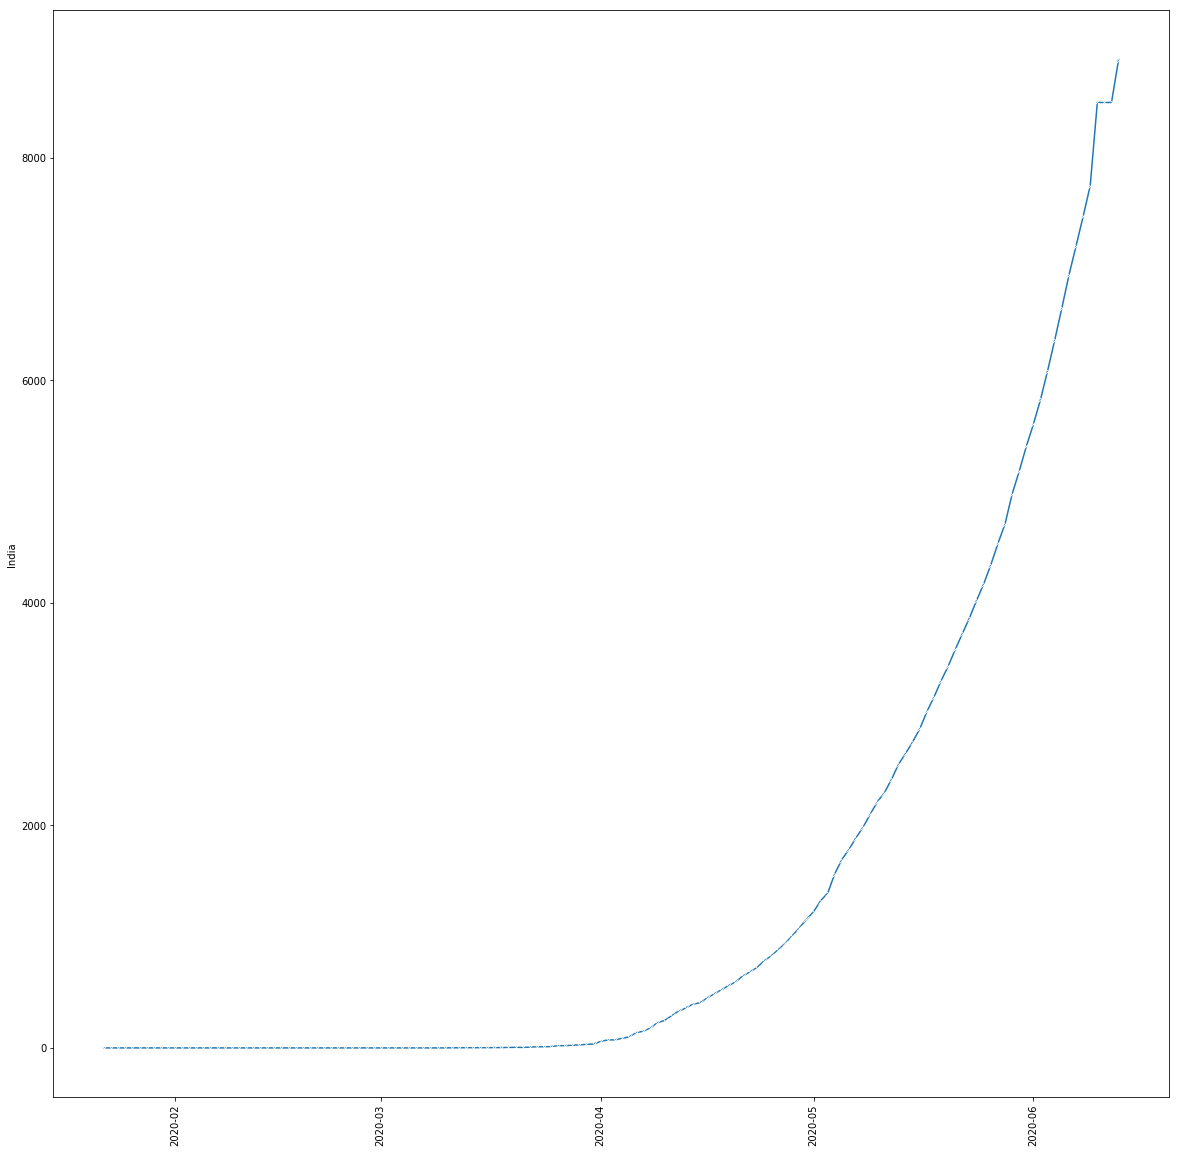

In [131]:
sns.lineplot(x=df_trans_deaths.index, y=df_trans_deaths['India'], linestyle='-', marker='x')
plt.xticks(rotation=90)
plt.show()

In [132]:
df_trans_deaths[['India','US']]

Country/Region  India      US
2020-01-22          0       0
2020-01-23          0       0
2020-01-24          0       0
2020-01-25          0       0
2020-01-26          0       0
2020-01-27          0       0
2020-01-28          0       0
2020-01-29          0       0
2020-01-30          0       0
2020-01-31          0       0
2020-02-01          0       0
2020-02-02          0       0
2020-02-03          0       0
2020-02-04          0       0
2020-02-05          0       0
2020-02-06          0       0
2020-02-07          0       0
2020-02-08          0       0
2020-02-09          0       0
2020-02-10          0       0
2020-02-11          0       0
2020-02-12          0       0
2020-02-13          0       0
2020-02-14          0       0
2020-02-15          0       0
...               ...     ...
2020-05-20       3434   93775
2020-05-21       3584   95020
2020-05-22       3726   96296
2020-05-23       3868   97406
2020-05-24       4024   98039
2020-05-25       4172   98541
2020-05-26       4344   99239
2020-05-27       4534  100744
2020-05-28       4711  101937
2020-05-29       4980  103113
2020-05-30       5185  104054
2020-05-31       5408  104659
2020-06-01       5608  105430
2020-06-02       5829  106461
2020-06-03       6088  107444
2020-06-04       6363  108479
2020-06-05       6649  109449
2020-06-06       6946  110123
2020-06-07       7207  110575
2020-06-08       7473  111068
2020-06-09       7750  112014
2020-06-10       8498  112935
2020-06-11       8498  113823
2020-06-12       8498  114669
2020-06-13       8884  115436

[144 rows x 2 columns]

In [133]:
df_trans_deaths.columns[df_trans_deaths.columns == 'Netherlands']

Index(['Netherlands', 'Netherlands',
       'Netherlands', 'Netherlands',
       'Netherlands'],
      dtype='object', name='Country/Region')

In [134]:
df_uk = df_trans_deaths['United Kingdom']

In [135]:
df_uk.tail()

Country/Region  United Kingdom  United Kingdom  \
2020-06-09                   9               1   
2020-06-10                   9               1   
2020-06-11                   9               1   
2020-06-12                   9               1   
2020-06-13                   9               1   

Country/Region  United Kingdom  United Kingdom  \
2020-06-09                  48               0   
2020-06-10                  48               0   
2020-06-11                  48               0   
2020-06-12                  48               0   
2020-06-13                  48               0   

Country/Region  United Kingdom  United Kingdom  \
2020-06-09                  24               1   
2020-06-10                  24               1   
2020-06-11                  24               1   
2020-06-12                  24               1   
2020-06-13                  24               1   

Country/Region  United Kingdom  United Kingdom  \
2020-06-09               40883               0   
2020-06-10               41128               0   
2020-06-11               41279               0   
2020-06-12               41481               0   
2020-06-13               41662               0   

Country/Region  United Kingdom  United Kingdom  \
2020-06-09                   1               1   
2020-06-10                   1               1   
2020-06-11                   1               1   
2020-06-12                   1               1   
2020-06-13                   1               1   

Country/Region  United Kingdom  
2020-06-09                   0  
2020-06-10                   0  
2020-06-11                   0  
2020-06-12                   0  
2020-06-13                   0

In [136]:
flag = [False, False, False, False, False, False, True, False, False, False, False, False]

In [137]:
df_uk.loc[:, flag]

Country/Region  United Kingdom
2020-01-22                   0
2020-01-23                   0
2020-01-24                   0
2020-01-25                   0
2020-01-26                   0
2020-01-27                   0
2020-01-28                   0
2020-01-29                   0
2020-01-30                   0
2020-01-31                   0
2020-02-01                   0
2020-02-02                   0
2020-02-03                   0
2020-02-04                   0
2020-02-05                   0
2020-02-06                   0
2020-02-07                   0
2020-02-08                   0
2020-02-09                   0
2020-02-10                   0
2020-02-11                   0
2020-02-12                   0
2020-02-13                   0
2020-02-14                   0
2020-02-15                   0
...                        ...
2020-05-20               35704
2020-05-21               36042
2020-05-22               36393
2020-05-23               36675
2020-05-24               36793
2020-05-25               36914
2020-05-26               37048
2020-05-27               37460
2020-05-28               37837
2020-05-29               38161
2020-05-30               38376
2020-05-31               38489
2020-06-01               39045
2020-06-02               39369
2020-06-03               39728
2020-06-04               39904
2020-06-05               40261
2020-06-06               40465
2020-06-07               40542
2020-06-08               40597
2020-06-09               40883
2020-06-10               41128
2020-06-11               41279
2020-06-12               41481
2020-06-13               41662

[144 rows x 1 columns]

In [138]:
df_trans_deaths['UK'] = df_uk.loc[:, flag]

In [139]:
df_trans_deaths['UK']

2020-01-22        0
2020-01-23        0
2020-01-24        0
2020-01-25        0
2020-01-26        0
2020-01-27        0
2020-01-28        0
2020-01-29        0
2020-01-30        0
2020-01-31        0
2020-02-01        0
2020-02-02        0
2020-02-03        0
2020-02-04        0
2020-02-05        0
2020-02-06        0
2020-02-07        0
2020-02-08        0
2020-02-09        0
2020-02-10        0
2020-02-11        0
2020-02-12        0
2020-02-13        0
2020-02-14        0
2020-02-15        0
              ...  
2020-05-20    35704
2020-05-21    36042
2020-05-22    36393
2020-05-23    36675
2020-05-24    36793
2020-05-25    36914
2020-05-26    37048
2020-05-27    37460
2020-05-28    37837
2020-05-29    38161
2020-05-30    38376
2020-05-31    38489
2020-06-01    39045
2020-06-02    39369
2020-06-03    39728
2020-06-04    39904
2020-06-05    40261
2020-06-06    40465
2020-06-07    40542
2020-06-08    40597
2020-06-09    40883
2020-06-10    41128
2020-06-11    41279
2020-06-12    41481


In [140]:
df_netherlands = df_trans_deaths['Netherlands']

In [141]:
df_netherlands.columns

Index(['Netherlands', 'Netherlands',
       'Netherlands', 'Netherlands',
       'Netherlands'],
      dtype='object', name='Country/Region')

In [142]:
df_netherlands.tail()

Country/Region  Netherlands  Netherlands  \
2020-06-09                3            1   
2020-06-10                3            1   
2020-06-11                3            1   
2020-06-12                3            1   
2020-06-13                3            1   

Country/Region  Netherlands  Netherlands  \
2020-06-09               15         6031   
2020-06-10               15         6042   
2020-06-11               15         6044   
2020-06-12               15         6053   
2020-06-13               15         6057   

Country/Region  Netherlands  
2020-06-09                0  
2020-06-10                0  
2020-06-11                0  
2020-06-12                0  
2020-06-13                0

In [143]:
flag = [False, False, False, True]

In [144]:
df_netherlands.loc[:, flag]

Country/Region  Netherlands
2020-01-22                0
2020-01-23                0
2020-01-24                0
2020-01-25                0
2020-01-26                0
2020-01-27                0
2020-01-28                0
2020-01-29                0
2020-01-30                0
2020-01-31                0
2020-02-01                0
2020-02-02                0
2020-02-03                0
2020-02-04                0
2020-02-05                0
2020-02-06                0
2020-02-07                0
2020-02-08                0
2020-02-09                0
2020-02-10                0
2020-02-11                0
2020-02-12                0
2020-02-13                0
2020-02-14                0
2020-02-15                0
...                     ...
2020-05-20             5748
2020-05-21             5775
2020-05-22             5788
2020-05-23             5811
2020-05-24             5822
2020-05-25             5830
2020-05-26             5856
2020-05-27             5871
2020-05-28             5903
2020-05-29             5931
2020-05-30             5951
2020-05-31             5956
2020-06-01             5962
2020-06-02             5967
2020-06-03             5977
2020-06-04             5990
2020-06-05             6005
2020-06-06             6011
2020-06-07             6013
2020-06-08             6016
2020-06-09             6031
2020-06-10             6042
2020-06-11             6044
2020-06-12             6053
2020-06-13             6057

[144 rows x 1 columns]

In [145]:
df_trans_deaths['Holland'] = df_netherlands.loc[:, flag]

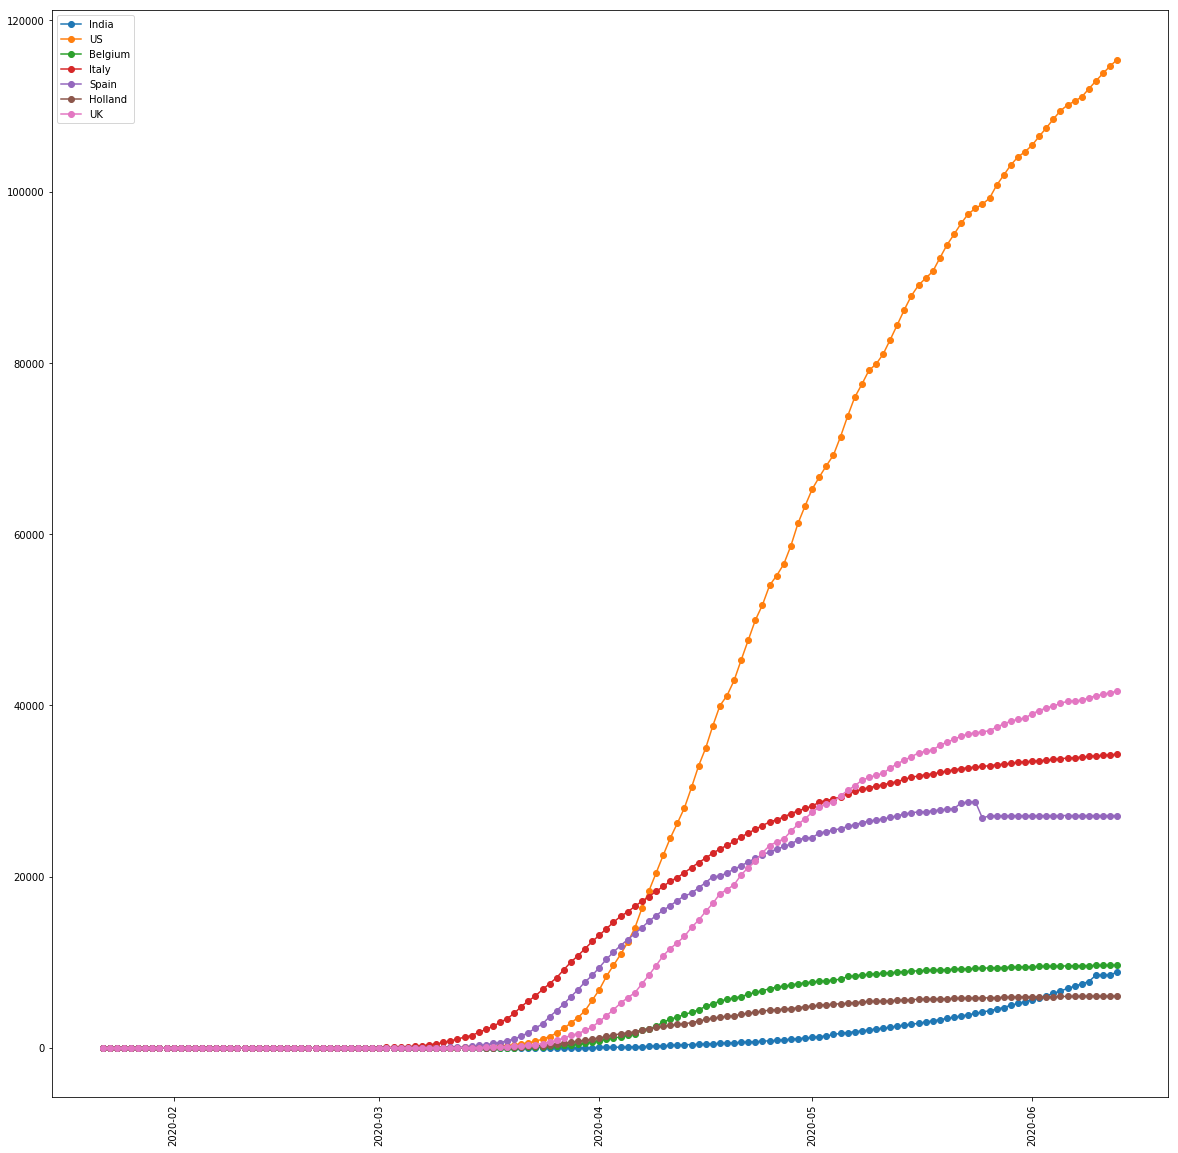

In [146]:
plt.plot_date(x=df_trans_deaths.index, y=df_trans_deaths['India'], label='India', linestyle='solid')
plt.plot_date(x=df_trans_deaths.index, y=df_trans_deaths['US'], label='US', linestyle='solid')
plt.plot_date(x=df_trans_deaths.index, y=df_trans_deaths['Belgium'], label='Belgium', linestyle='solid')
plt.plot_date(x=df_trans_deaths.index, y=df_trans_deaths['Italy'], label='Italy', linestyle='solid')
plt.plot_date(x=df_trans_deaths.index, y=df_trans_deaths['Spain'], label='Spain', linestyle='solid')
plt.plot_date(x=df_trans_deaths.index, y=df_trans_deaths['Holland'], label='Holland', linestyle='solid')
plt.plot_date(x=df_trans_deaths.index, y=df_trans_deaths['UK'], label='UK', linestyle='solid')
# plt.plot_date(x=df_trans.index, y=df_trans['China'], label='China', linestyle='solid')
plt.xticks(rotation=90)
plt.legend()
plt.show()

### Global Recovery

In [147]:
columns = []
with open('../data/Global/csse_covid_19_time_series/time_series_covid19_recovered_global.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    columns = next(spamreader) 
    l = [i for i in spamreader]

In [148]:
columns

['Province/State',
 'Country/Region',
 'Lat',
 'Long',
 '1/22/20',
 '1/23/20',
 '1/24/20',
 '1/25/20',
 '1/26/20',
 '1/27/20',
 '1/28/20',
 '1/29/20',
 '1/30/20',
 '1/31/20',
 '2/1/20',
 '2/2/20',
 '2/3/20',
 '2/4/20',
 '2/5/20',
 '2/6/20',
 '2/7/20',
 '2/8/20',
 '2/9/20',
 '2/10/20',
 '2/11/20',
 '2/12/20',
 '2/13/20',
 '2/14/20',
 '2/15/20',
 '2/16/20',
 '2/17/20',
 '2/18/20',
 '2/19/20',
 '2/20/20',
 '2/21/20',
 '2/22/20',
 '2/23/20',
 '2/24/20',
 '2/25/20',
 '2/26/20',
 '2/27/20',
 '2/28/20',
 '2/29/20',
 '3/1/20',
 '3/2/20',
 '3/3/20',
 '3/4/20',
 '3/5/20',
 '3/6/20',
 '3/7/20',
 '3/8/20',
 '3/9/20',
 '3/10/20',
 '3/11/20',
 '3/12/20',
 '3/13/20',
 '3/14/20',
 '3/15/20',
 '3/16/20',
 '3/17/20',
 '3/18/20',
 '3/19/20',
 '3/20/20',
 '3/21/20',
 '3/22/20',
 '3/23/20',
 '3/24/20',
 '3/25/20',
 '3/26/20',
 '3/27/20',
 '3/28/20',
 '3/29/20',
 '3/30/20',
 '3/31/20',
 '4/1/20',
 '4/2/20',
 '4/3/20',
 '4/4/20',
 '4/5/20',
 '4/6/20',
 '4/7/20',
 '4/8/20',
 '4/9/20',
 '4/10/20',
 '4/11/20',


In [149]:
df_global_recovered = pd.DataFrame(l, columns=columns)

In [150]:
df_global_recovered.head()

Province/State Country/Region       Lat  \
0                   Afghanistan      33.0   
1                       Albania   41.1533   
2                       Algeria   28.0339   
3                       Andorra   42.5063   
4                        Angola  -11.2027   

      Long 1/22/20 1/23/20 1/24/20 1/25/20  \
0     65.0       0       0       0       0   
1  20.1683       0       0       0       0   
2   1.6596       0       0       0       0   
3   1.5218       0       0       0       0   
4  17.8739       0       0       0       0   

  1/26/20 1/27/20 1/28/20 1/29/20 1/30/20  \
0       0       0       0       0       0   
1       0       0       0       0       0   
2       0       0       0       0       0   
3       0       0       0       0       0   
4       0       0       0       0       0   

  1/31/20 2/1/20 2/2/20 2/3/20 2/4/20 2/5/20  \
0       0      0      0      0      0      0   
1       0      0      0      0      0      0   
2       0      0      0      0      0      0   
3       0      0      0      0      0      0   
4       0      0      0      0      0      0   

  2/6/20 2/7/20 2/8/20 2/9/20 2/10/20 2/11/20  \
0      0      0      0      0       0       0   
1      0      0      0      0       0       0   
2      0      0      0      0       0       0   
3      0      0      0      0       0       0   
4      0      0      0      0       0       0   

    ...   5/20/20 5/21/20 5/22/20 5/23/20  \
0   ...       930     938     996    1040   
1   ...       758     771     777     783   
2   ...      3968    4062    4256    4426   
3   ...       639     639     652     653   
4   ...        17      17      17      18   

  5/24/20 5/25/20 5/26/20 5/27/20 5/28/20  \
0    1075    1097    1128    1138    1209   
1     789     795     803     812     823   
2    4784    4747    4918    5129    5277   
3     653     663     676     676     681   
4      18      18      18      18      18   

  5/29/20 5/30/20 5/31/20 6/1/20 6/2/20 6/3/20  \
0    1259    1303    1328   1428   1450   1522   
1     851     857     872    877    891    898   
2    5422    5549    5748   5894   6067   6218   
3     684     692     694    698    733    735   
4      18      18      18     18     18     18   

  6/4/20 6/5/20 6/6/20 6/7/20 6/8/20 6/9/20  \
0   1585   1762   1830   1875   2171   2651   
1    898    910    925    938    945    960   
2   6297   6453   6631   6717   6799   6951   
3    738    741    741    744    751    757   
4     18     21     24     24     38     38   

  6/10/20 6/11/20 6/12/20 6/13/20  
0    3013    3326    3928    4201  
1     980    1001    1034    1039  
2    7074    7255    7322    7420  
3     759     780     781     781  
4      40      41      42      61  

[5 rows x 148 columns]

In [151]:
df_global_recovered_min = df_global_recovered.drop(columns=['Province/State', 'Lat', 'Long'])

In [152]:
list_of_columns = [col for col in df_global_recovered_min.columns if 'Country' not in col]

In [153]:
df_trans_recovered = df_global_recovered_min.transpose()

In [154]:
df_trans_recovered.head()

0        1        2    \
Country/Region  Afghanistan  Albania  Algeria   
1/22/20                   0        0        0   
1/23/20                   0        0        0   
1/24/20                   0        0        0   
1/25/20                   0        0        0   

                    3       4    \
Country/Region  Andorra  Angola   
1/22/20               0       0   
1/23/20               0       0   
1/24/20               0       0   
1/25/20               0       0   

                                5          6    \
Country/Region  Antigua and Barbuda  Argentina   
1/22/20                           0          0   
1/23/20                           0          0   
1/24/20                           0          0   
1/25/20                           0          0   

                    7          8          9    \
Country/Region  Armenia  Australia  Australia   
1/22/20               0          0          0   
1/23/20               0          0          0   
1/24/20               0          0          0   
1/25/20               0          0          0   

                      10         11         12   \
Country/Region  Australia  Australia  Australia   
1/22/20                 0          0          0   
1/23/20                 0          0          0   
1/24/20                 0          0          0   
1/25/20                 0          0          0   

                      13         14         15   \
Country/Region  Australia  Australia  Australia   
1/22/20                 0          0          0   
1/23/20                 0          0          0   
1/24/20                 0          0          0   
1/25/20                 0          0          0   

                    16          17       18   \
Country/Region  Austria  Azerbaijan  Bahamas   
1/22/20               0           0        0   
1/23/20               0           0        0   
1/24/20               0           0        0   
1/25/20               0           0        0   

                    19          20        21   \
Country/Region  Bahrain  Bangladesh  Barbados   
1/22/20               0           0         0   
1/23/20               0           0         0   
1/24/20               0           0         0   
1/25/20               0           0         0   

                    22       23      24   \
Country/Region  Belarus  Belgium  Belize   
1/22/20               0        0       0   
1/23/20               0        0       0   
1/24/20               0        0       0   
1/25/20               0        0       0   

                 ...         228     229  \
Country/Region   ...     Vietnam  Zambia   
1/22/20          ...           0       0   
1/23/20          ...           0       0   
1/24/20          ...           0       0   
1/25/20          ...           0       0   

                     230                 231  \
Country/Region  Zimbabwe  West Bank and Gaza   
1/22/20                0                   0   
1/23/20                0                   0   
1/24/20                0                   0   
1/25/20                0                   0   

                 232     233    234  \
Country/Region  Laos  Kosovo  Burma   
1/22/20            0       0      0   
1/23/20            0       0      0   
1/24/20            0       0      0   
1/25/20            0       0      0   

                           235             236  \
Country/Region  United Kingdom  United Kingdom   
1/22/20                      0               0   
1/23/20                      0               0   
1/24/20                      0               0   
1/25/20                      0               0   

                           237         238  \
Country/Region  United Kingdom  MS Zaandam   
1/22/20                      0           0   
1/23/20                      0           0   
1/24/20                      0           0   
1/25/20                      0           0   

                     239      240           241  \
Country/Region  Botswana  Burundi  Sierra

In [155]:
df_trans_recovered.iloc[0, :]

0                Afghanistan
1                    Albania
2                    Algeria
3                    Andorra
4                     Angola
5        Antigua and Barbuda
6                  Argentina
7                    Armenia
8                  Australia
9                  Australia
10                 Australia
11                 Australia
12                 Australia
13                 Australia
14                 Australia
15                 Australia
16                   Austria
17                Azerbaijan
18                   Bahamas
19                   Bahrain
20                Bangladesh
21                  Barbados
22                   Belarus
23                   Belgium
24                    Belize
               ...          
228                  Vietnam
229                   Zambia
230                 Zimbabwe
231       West Bank and Gaza
232                     Laos
233                   Kosovo
234                    Burma
235           United Kingdom
236           

In [156]:
df_global_recovered_min.head()

Country/Region 1/22/20 1/23/20 1/24/20  \
0    Afghanistan       0       0       0   
1        Albania       0       0       0   
2        Algeria       0       0       0   
3        Andorra       0       0       0   
4         Angola       0       0       0   

  1/25/20 1/26/20 1/27/20 1/28/20 1/29/20  \
0       0       0       0       0       0   
1       0       0       0       0       0   
2       0       0       0       0       0   
3       0       0       0       0       0   
4       0       0       0       0       0   

  1/30/20 1/31/20 2/1/20 2/2/20 2/3/20 2/4/20  \
0       0       0      0      0      0      0   
1       0       0      0      0      0      0   
2       0       0      0      0      0      0   
3       0       0      0      0      0      0   
4       0       0      0      0      0      0   

  2/5/20 2/6/20 2/7/20 2/8/20 2/9/20 2/10/20  \
0      0      0      0      0      0       0   
1      0      0      0      0      0       0   
2      0      0      0      0      0       0   
3      0      0      0      0      0       0   
4      0      0      0      0      0       0   

  2/11/20 2/12/20 2/13/20 2/14/20   ...    \
0       0       0       0       0   ...     
1       0       0       0       0   ...     
2       0       0       0       0   ...     
3       0       0       0       0   ...     
4       0       0       0       0   ...     

  5/20/20 5/21/20 5/22/20 5/23/20 5/24/20  \
0     930     938     996    1040    1075   
1     758     771     777     783     789   
2    3968    4062    4256    4426    4784   
3     639     639     652     653     653   
4      17      17      17      18      18   

  5/25/20 5/26/20 5/27/20 5/28/20 5/29/20  \
0    1097    1128    1138    1209    1259   
1     795     803     812     823     851   
2    4747    4918    5129    5277    5422   
3     663     676     676     681     684   
4      18      18      18      18      18   

  5/30/20 5/31/20 6/1/20 6/2/20 6/3/20 6/4/20  \
0    1303    1328   1428   1450   1522   1585   
1     857     872    877    891    898    898   
2    5549    5748   5894   6067   6218   6297   
3     692     694    698    733    735    738   
4      18      18     18     18     18     18   

  6/5/20 6/6/20 6/7/20 6/8/20 6/9/20 6/10/20  \
0   1762   1830   1875   2171   2651    3013   
1    910    925    938    945    960     980   
2   6453   6631   6717   6799   6951    7074   
3    741    741    744    751    757     759   
4     21     24     24     38     38      40   

  6/11/20 6/12/20 6/13/20  
0    3326    3928    4201  
1    1001    1034    1039  
2    7255    7322    7420  
3     780     781     781  
4      41      42      61  

[5 rows x 145 columns]

In [157]:
df_trans_recovered.columns = df_trans_recovered.iloc[0, :]

In [158]:
df_trans_recovered = df_trans_recovered.iloc[1:, :]

In [159]:
df_trans_recovered.head()

Country/Region Afghanistan Albania Algeria  \
1/22/20                  0       0       0   
1/23/20                  0       0       0   
1/24/20                  0       0       0   
1/25/20                  0       0       0   
1/26/20                  0       0       0   

Country/Region Andorra Angola  \
1/22/20              0      0   
1/23/20              0      0   
1/24/20              0      0   
1/25/20              0      0   
1/26/20              0      0   

Country/Region Antigua and Barbuda Argentina  \
1/22/20                          0         0   
1/23/20                          0         0   
1/24/20                          0         0   
1/25/20                          0         0   
1/26/20                          0         0   

Country/Region Armenia Australia Australia  \
1/22/20              0         0         0   
1/23/20              0         0         0   
1/24/20              0         0         0   
1/25/20              0         0         0   
1/26/20              0         0         0   

Country/Region Australia Australia Australia  \
1/22/20                0         0         0   
1/23/20                0         0         0   
1/24/20                0         0         0   
1/25/20                0         0         0   
1/26/20                0         0         0   

Country/Region Australia Australia Australia  \
1/22/20                0         0         0   
1/23/20                0         0         0   
1/24/20                0         0         0   
1/25/20                0         0         0   
1/26/20                0         0         0   

Country/Region Austria Azerbaijan Bahamas  \
1/22/20              0          0       0   
1/23/20              0          0       0   
1/24/20              0          0       0   
1/25/20              0          0       0   
1/26/20              0          0       0   

Country/Region Bahrain Bangladesh Barbados  \
1/22/20              0          0        0   
1/23/20              0          0        0   
1/24/20              0          0        0   
1/25/20              0          0        0   
1/26/20              0          0        0   

Country/Region Belarus Belgium Belize   ...    \
1/22/20              0       0      0   ...     
1/23/20              0       0      0   ...     
1/24/20              0       0      0   ...     
1/25/20              0       0      0   ...     
1/26/20              0       0      0   ...     

Country/Region Vietnam Zambia Zimbabwe  \
1/22/20              0      0        0   
1/23/20              0      0        0   
1/24/20              0      0        0   
1/25/20              0      0        0   
1/26/20              0      0        0   

Country/Region West Bank and Gaza Laos Kosovo  \
1/22/20                         0    0      0   
1/23/20                         0    0      0   
1/24/20                         0    0      0   
1/25/20                         0    0      0   
1/26/20                         0    0      0   

Country/Region Burma United Kingdom  \
1/22/20            0              0   
1/23/20            0              0   
1/24/20            0              0   
1/25/20            0              0   
1/26/20            0              0   

Country/Region United Kingdom United Kingdom  \
1/22/20                     0              0   
1/23/20                     0              0   
1/24/20                     0              0   
1/25/20                     0              0   
1/26/20                     0              0   

Country/Region MS Zaandam Botswana Burundi  \
1/22/20                 0        0       0   
1/23/20                 0        0       0   
1/24/20                 0        0       0   
1/25/20                 0        0       0   
1/26/20                 0        0       0   

Country/Region Sierra Leone Netherlands Malawi  \
1/22/20                   0           0      0   
1/23/20                   0           0      0   
1/24/20                   0           

In [160]:
df_trans_recovered = df_trans_recovered.astype(np.int)
df_trans_recovered.index = pd.to_datetime(df_trans_recovered.index)

In [161]:
df_trans_recovered.dtypes

Country/Region
Afghanistan              int64
Albania                  int64
Algeria                  int64
Andorra                  int64
Angola                   int64
Antigua and Barbuda      int64
Argentina                int64
Armenia                  int64
Australia                int64
Australia                int64
Australia                int64
Australia                int64
Australia                int64
Australia                int64
Australia                int64
Australia                int64
Austria                  int64
Azerbaijan               int64
Bahamas                  int64
Bahrain                  int64
Bangladesh               int64
Barbados                 int64
Belarus                  int64
Belgium                  int64
Belize                   int64
                         ...  
Vietnam                  int64
Zambia                   int64
Zimbabwe                 int64
West Bank and Gaza       int64
Laos                     int64
Kosovo                  

In [162]:
df_trans_recovered.head()

Country/Region  Afghanistan  Albania  Algeria  \
2020-01-22                0        0        0   
2020-01-23                0        0        0   
2020-01-24                0        0        0   
2020-01-25                0        0        0   
2020-01-26                0        0        0   

Country/Region  Andorra  Angola  \
2020-01-22            0       0   
2020-01-23            0       0   
2020-01-24            0       0   
2020-01-25            0       0   
2020-01-26            0       0   

Country/Region  Antigua and Barbuda  Argentina  \
2020-01-22                        0          0   
2020-01-23                        0          0   
2020-01-24                        0          0   
2020-01-25                        0          0   
2020-01-26                        0          0   

Country/Region  Armenia  Australia  Australia  \
2020-01-22            0          0          0   
2020-01-23            0          0          0   
2020-01-24            0          0          0   
2020-01-25            0          0          0   
2020-01-26            0          0          0   

Country/Region  Australia  Australia  Australia  \
2020-01-22              0          0          0   
2020-01-23              0          0          0   
2020-01-24              0          0          0   
2020-01-25              0          0          0   
2020-01-26              0          0          0   

Country/Region  Australia  Australia  Australia  \
2020-01-22              0          0          0   
2020-01-23              0          0          0   
2020-01-24              0          0          0   
2020-01-25              0          0          0   
2020-01-26              0          0          0   

Country/Region  Austria  Azerbaijan  Bahamas  \
2020-01-22            0           0        0   
2020-01-23            0           0        0   
2020-01-24            0           0        0   
2020-01-25            0           0        0   
2020-01-26            0           0        0   

Country/Region  Bahrain  Bangladesh  Barbados  \
2020-01-22            0           0         0   
2020-01-23            0           0         0   
2020-01-24            0           0         0   
2020-01-25            0           0         0   
2020-01-26            0           0         0   

Country/Region  Belarus  Belgium  Belize  \
2020-01-22            0        0       0   
2020-01-23            0        0       0   
2020-01-24            0        0       0   
2020-01-25            0        0       0   
2020-01-26            0        0       0   

Country/Region   ...     Vietnam  Zambia  \
2020-01-22       ...           0       0   
2020-01-23       ...           0       0   
2020-01-24       ...           0       0   
2020-01-25       ...           0       0   
2020-01-26       ...           0       0   

Country/Region  Zimbabwe  West Bank and Gaza  \
2020-01-22             0                   0   
2020-01-23             0                   0   
2020-01-24             0                   0   
2020-01-25             0                   0   
2020-01-26             0                   0   

Country/Region  Laos  Kosovo  Burma  \
2020-01-22         0       0      0   
2020-01-23         0       0      0   
2020-01-24         0       0      0   
2020-01-25         0       0      0   
2020-01-26         0       0      0   

Country/Region  United Kingdom  United Kingdom  \
2020-01-22                   0               0   
2020-01-23                   0               0   
2020-01-24                   0               0   
2020-01-25                   0               0   
2020-01-26                   0               0   

Country/Region  United Kingdom  MS Zaandam  \
2020-01-22                   0           0   
2020-01-23                   0           0   
2020-01-24                   0           0   
2020-01-25                   0           0   
2020-01-26                   0           0   

Country/Region  Botswana  Burundi  Sierra Leone  \
2020-01-22       

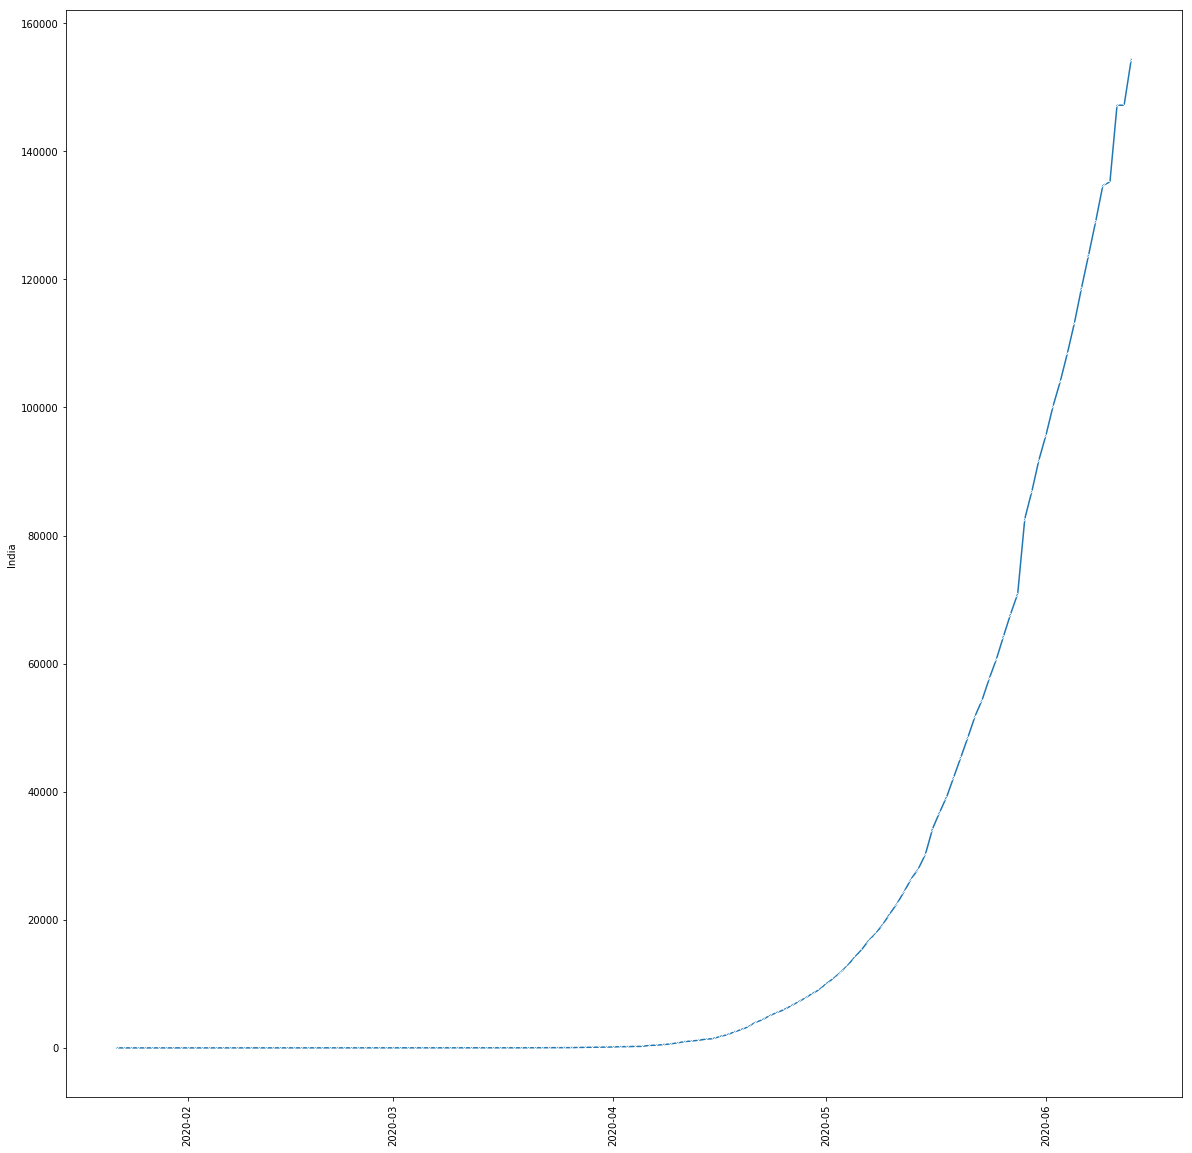

In [163]:
sns.lineplot(x=df_trans_recovered.index, y=df_trans_recovered['India'], linestyle='-', marker='x')
plt.xticks(rotation=90)
plt.show()

In [164]:
df_trans[['India','US']]

Country/Region   India       US
2020-01-22           0        1
2020-01-23           0        1
2020-01-24           0        2
2020-01-25           0        2
2020-01-26           0        5
2020-01-27           0        5
2020-01-28           0        5
2020-01-29           0        5
2020-01-30           1        5
2020-01-31           1        7
2020-02-01           1        8
2020-02-02           2        8
2020-02-03           3       11
2020-02-04           3       11
2020-02-05           3       11
2020-02-06           3       11
2020-02-07           3       11
2020-02-08           3       11
2020-02-09           3       11
2020-02-10           3       11
2020-02-11           3       12
2020-02-12           3       12
2020-02-13           3       13
2020-02-14           3       13
2020-02-15           3       13
...                ...      ...
2020-05-20      112028  1558949
2020-05-21      118226  1584486
2020-05-22      124794  1608623
2020-05-23      131423  1630450
2020-05-24      138536  1651239
2020-05-25      144950  1670209
2020-05-26      150793  1689057
2020-05-27      158086  1707423
2020-05-28      165386  1730259
2020-05-29      173491  1754747
2020-05-30      181827  1778993
2020-05-31      190609  1799122
2020-06-01      198370  1816476
2020-06-02      207191  1837367
2020-06-03      216824  1857248
2020-06-04      226713  1878543
2020-06-05      236184  1903854
2020-06-06      246622  1926538
2020-06-07      257486  1944309
2020-06-08      265928  1961781
2020-06-09      276146  1979868
2020-06-10      286605  2000702
2020-06-11      297535  2023590
2020-06-12      297535  2048986
2020-06-13      308993  2074526

[144 rows x 2 columns]

In [165]:
df_trans_recovered.columns[df_trans_recovered.columns == 'Netherlands']

Index(['Netherlands', 'Netherlands',
       'Netherlands', 'Netherlands',
       'Netherlands'],
      dtype='object', name='Country/Region')

In [166]:
df_uk = df_trans_recovered['United Kingdom']

In [167]:
df_uk.tail()

Country/Region  United Kingdom  United Kingdom  \
2020-06-09                 120             104   
2020-06-10                 125             107   
2020-06-11                 127             112   
2020-06-12                 127             115   
2020-06-13                 127             115   

Country/Region  United Kingdom  United Kingdom  \
2020-06-09                 512             165   
2020-06-10                 512             169   
2020-06-11                 512             171   
2020-06-12                 512             172   
2020-06-13                 512             173   

Country/Region  United Kingdom  United Kingdom  \
2020-06-09                 312              10   
2020-06-10                 312              10   
2020-06-11                 312              10   
2020-06-12                 312              10   
2020-06-13                 312              10   

Country/Region  United Kingdom  United Kingdom  \
2020-06-09                   0               3   
2020-06-10                   0               3   
2020-06-11                   0               3   
2020-06-12                   0               3   
2020-06-13                   0               3   

Country/Region  United Kingdom  United Kingdom  \
2020-06-09                   7              11   
2020-06-10                   7              11   
2020-06-11                   7              11   
2020-06-12                   7              11   
2020-06-13                   7              11   

Country/Region  United Kingdom  
2020-06-09                  13  
2020-06-10                  13  
2020-06-11                  13  
2020-06-12                  13  
2020-06-13                  13

In [168]:
flag = [False, False, False, False, False, False, True, False, False, False, False, False]

In [169]:
df_uk.loc[:, flag]

Country/Region  United Kingdom
2020-01-22                   0
2020-01-23                   0
2020-01-24                   0
2020-01-25                   0
2020-01-26                   0
2020-01-27                   0
2020-01-28                   0
2020-01-29                   0
2020-01-30                   0
2020-01-31                   0
2020-02-01                   0
2020-02-02                   0
2020-02-03                   0
2020-02-04                   0
2020-02-05                   0
2020-02-06                   0
2020-02-07                   0
2020-02-08                   0
2020-02-09                   0
2020-02-10                   0
2020-02-11                   0
2020-02-12                   1
2020-02-13                   1
2020-02-14                   1
2020-02-15                   1
...                        ...
2020-05-20                   0
2020-05-21                   0
2020-05-22                   0
2020-05-23                   0
2020-05-24                   0
2020-05-25                   0
2020-05-26                   0
2020-05-27                   0
2020-05-28                   0
2020-05-29                   0
2020-05-30                   0
2020-05-31                   0
2020-06-01                   0
2020-06-02                   0
2020-06-03                   0
2020-06-04                   0
2020-06-05                   0
2020-06-06                   0
2020-06-07                   0
2020-06-08                   0
2020-06-09                   0
2020-06-10                   0
2020-06-11                   0
2020-06-12                   0
2020-06-13                   0

[144 rows x 1 columns]

In [170]:
df_trans_recovered['UK'] = df_uk.loc[:, flag]

In [171]:
df_trans_recovered['UK']

2020-01-22    0
2020-01-23    0
2020-01-24    0
2020-01-25    0
2020-01-26    0
2020-01-27    0
2020-01-28    0
2020-01-29    0
2020-01-30    0
2020-01-31    0
2020-02-01    0
2020-02-02    0
2020-02-03    0
2020-02-04    0
2020-02-05    0
2020-02-06    0
2020-02-07    0
2020-02-08    0
2020-02-09    0
2020-02-10    0
2020-02-11    0
2020-02-12    1
2020-02-13    1
2020-02-14    1
2020-02-15    1
             ..
2020-05-20    0
2020-05-21    0
2020-05-22    0
2020-05-23    0
2020-05-24    0
2020-05-25    0
2020-05-26    0
2020-05-27    0
2020-05-28    0
2020-05-29    0
2020-05-30    0
2020-05-31    0
2020-06-01    0
2020-06-02    0
2020-06-03    0
2020-06-04    0
2020-06-05    0
2020-06-06    0
2020-06-07    0
2020-06-08    0
2020-06-09    0
2020-06-10    0
2020-06-11    0
2020-06-12    0
2020-06-13    0
Name: UK, Length: 144, dtype: int64

In [172]:
df_netherlands = df_trans_recovered['Netherlands']

In [173]:
df_netherlands.columns

Index(['Netherlands', 'Netherlands',
       'Netherlands', 'Netherlands',
       'Netherlands'],
      dtype='object', name='Country/Region')

In [174]:
df_netherlands.tail()

Country/Region  Netherlands  Netherlands  \
2020-06-09               98           15   
2020-06-10               98           15   
2020-06-11               98           15   
2020-06-12               98           15   
2020-06-13               98           15   

Country/Region  Netherlands  Netherlands  \
2020-06-09               61            0   
2020-06-10               61            0   
2020-06-11               61            0   
2020-06-12               61            0   
2020-06-13               61            0   

Country/Region  Netherlands  
2020-06-09                7  
2020-06-10                7  
2020-06-11                7  
2020-06-12                7  
2020-06-13                7

In [175]:
flag = [False, False, False, True]

In [176]:
df_netherlands.loc[:, flag]

Country/Region  Netherlands
2020-01-22                0
2020-01-23                0
2020-01-24                0
2020-01-25                0
2020-01-26                0
2020-01-27                0
2020-01-28                0
2020-01-29                0
2020-01-30                0
2020-01-31                0
2020-02-01                0
2020-02-02                0
2020-02-03                0
2020-02-04                0
2020-02-05                0
2020-02-06                0
2020-02-07                0
2020-02-08                0
2020-02-09                0
2020-02-10                0
2020-02-11                0
2020-02-12                0
2020-02-13                0
2020-02-14                0
2020-02-15                0
...                     ...
2020-05-20                0
2020-05-21                0
2020-05-22                0
2020-05-23                0
2020-05-24                0
2020-05-25                0
2020-05-26                0
2020-05-27                0
2020-05-28                0
2020-05-29                0
2020-05-30                0
2020-05-31                0
2020-06-01                0
2020-06-02                0
2020-06-03                0
2020-06-04                0
2020-06-05                0
2020-06-06                0
2020-06-07                0
2020-06-08                0
2020-06-09                0
2020-06-10                0
2020-06-11                0
2020-06-12                0
2020-06-13                0

[144 rows x 1 columns]

In [177]:
df_trans_recovered['Holland'] = df_netherlands.loc[:, flag]

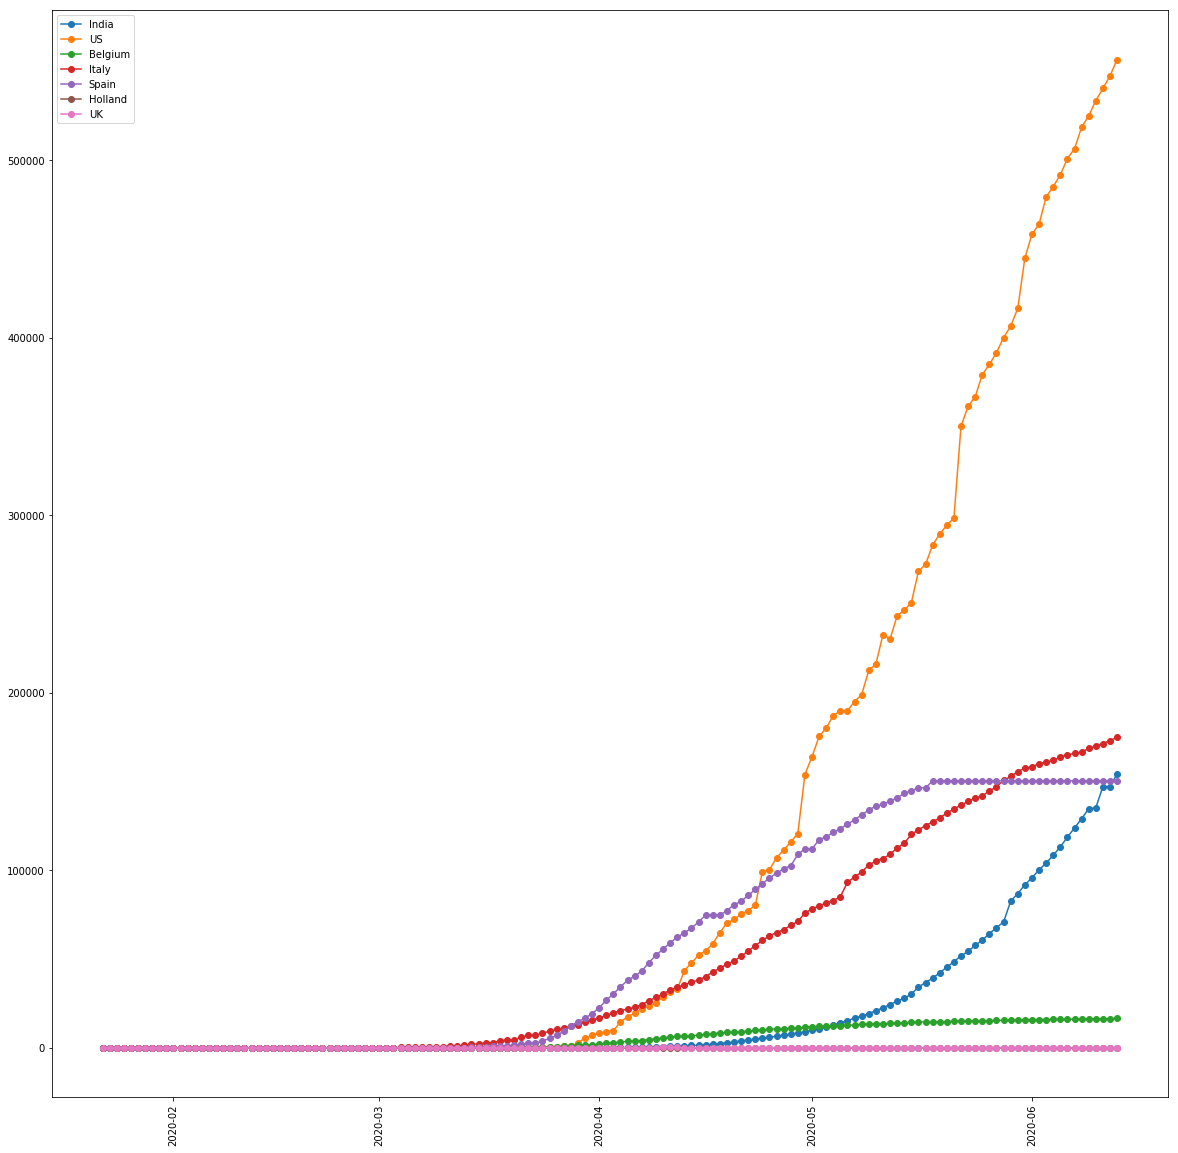

In [178]:
plt.plot_date(x=df_trans_recovered.index, y=df_trans_recovered['India'], label='India', linestyle='solid')
plt.plot_date(x=df_trans_recovered.index, y=df_trans_recovered['US'], label='US', linestyle='solid')
plt.plot_date(x=df_trans_recovered.index, y=df_trans_recovered['Belgium'], label='Belgium', linestyle='solid')
plt.plot_date(x=df_trans_recovered.index, y=df_trans_recovered['Italy'], label='Italy', linestyle='solid')
plt.plot_date(x=df_trans_recovered.index, y=df_trans_recovered['Spain'], label='Spain', linestyle='solid')
plt.plot_date(x=df_trans_recovered.index, y=df_trans_recovered['Holland'], label='Holland', linestyle='solid')
plt.plot_date(x=df_trans_recovered.index, y=df_trans_recovered['UK'], label='UK', linestyle='solid')
# plt.plot_date(x=df_trans.index, y=df_trans['China'], label='China', linestyle='solid')
# plt.plot_date(x=df_trans.index, y=df_trans['United Kingdom'], label='UK', linestyle='solid')
plt.xticks(rotation=90)
plt.legend()
plt.show()

### Comparing Confirmed vs Recovered vs Deaths for selected countries

### India

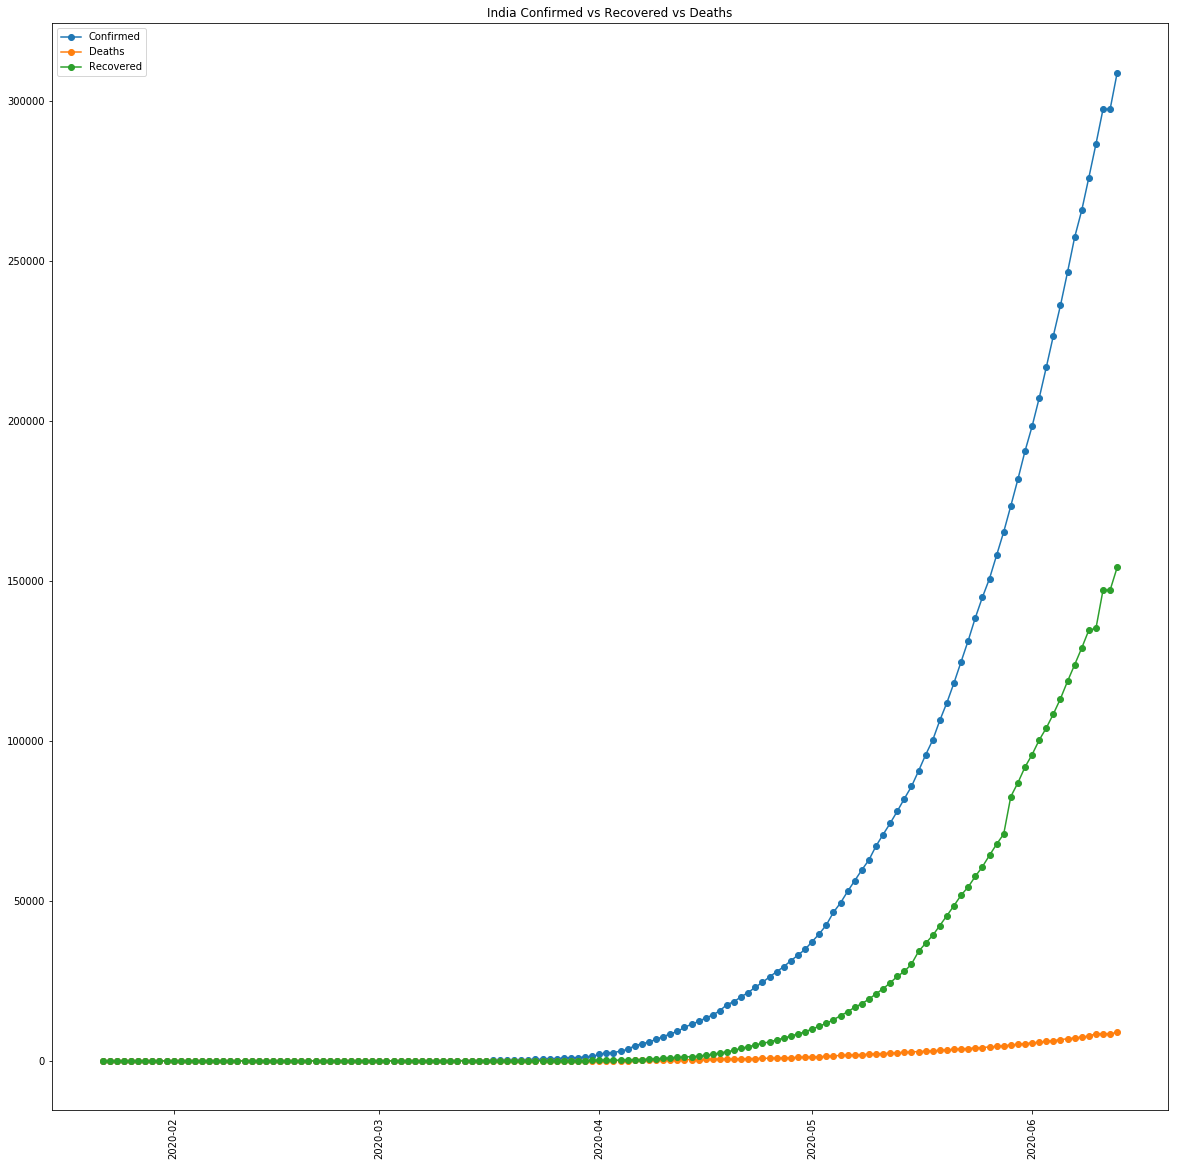

In [179]:
plt.plot_date(x=df_trans.index, y=df_trans['India'], label='Confirmed', linestyle='solid')
plt.plot_date(x=df_trans_deaths.index, y=df_trans_deaths['India'], label='Deaths', linestyle='solid')
plt.plot_date(x=df_trans_recovered.index, y=df_trans_recovered['India'], label='Recovered', linestyle='solid')

plt.xticks(rotation=90)
plt.legend()
plt.title('India Confirmed vs Recovered vs Deaths')
plt.show()

### UK

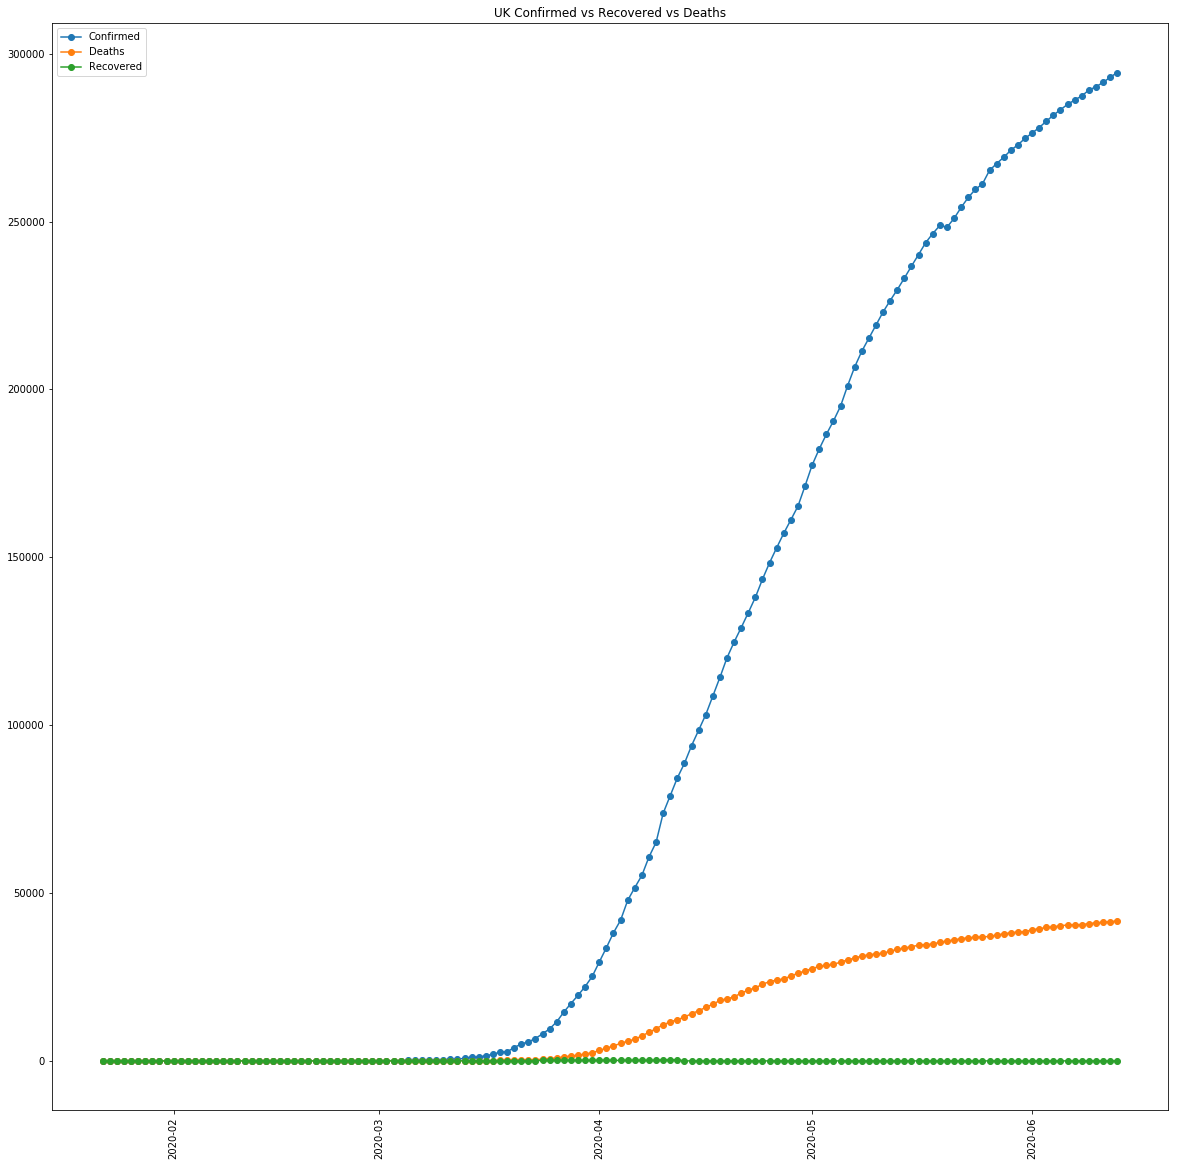

In [180]:
plt.plot_date(x=df_trans.index, y=df_trans['UK'], label='Confirmed', linestyle='solid')
plt.plot_date(x=df_trans_deaths.index, y=df_trans_deaths['UK'], label='Deaths', linestyle='solid')
plt.plot_date(x=df_trans_recovered.index, y=df_trans_recovered['UK'], label='Recovered', linestyle='solid')

plt.xticks(rotation=90)
plt.legend()
plt.title('UK Confirmed vs Recovered vs Deaths')
plt.show()

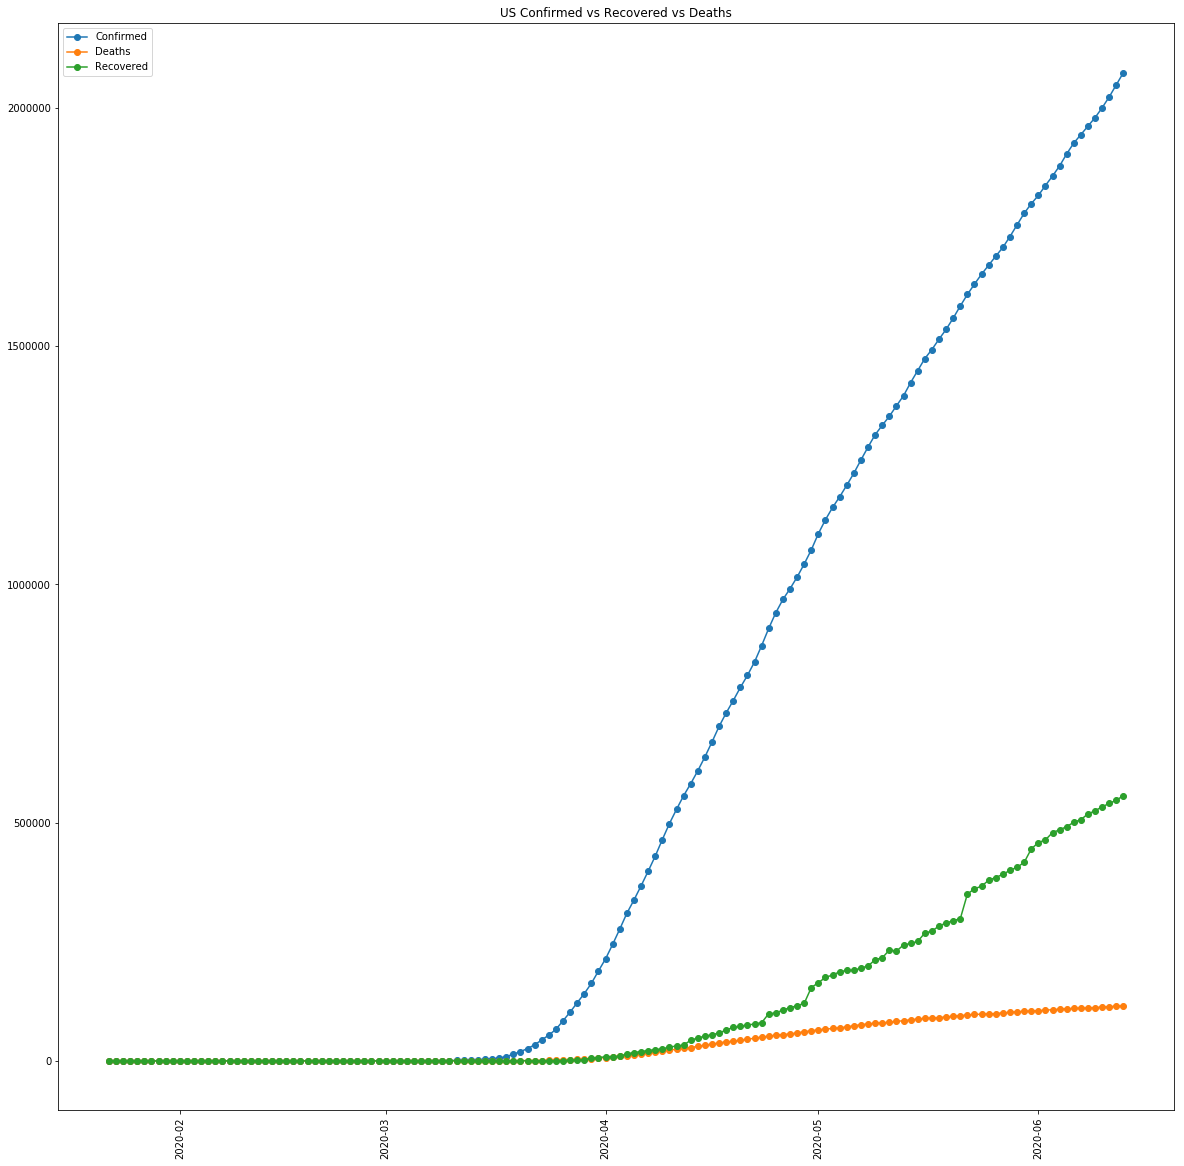

In [181]:
plt.plot_date(x=df_trans.index, y=df_trans['US'], label='Confirmed', linestyle='solid')
plt.plot_date(x=df_trans_deaths.index, y=df_trans_deaths['US'], label='Deaths', linestyle='solid')
plt.plot_date(x=df_trans_recovered.index, y=df_trans_recovered['US'], label='Recovered', linestyle='solid')

plt.xticks(rotation=90)
plt.legend()
plt.title('US Confirmed vs Recovered vs Deaths')
plt.show()

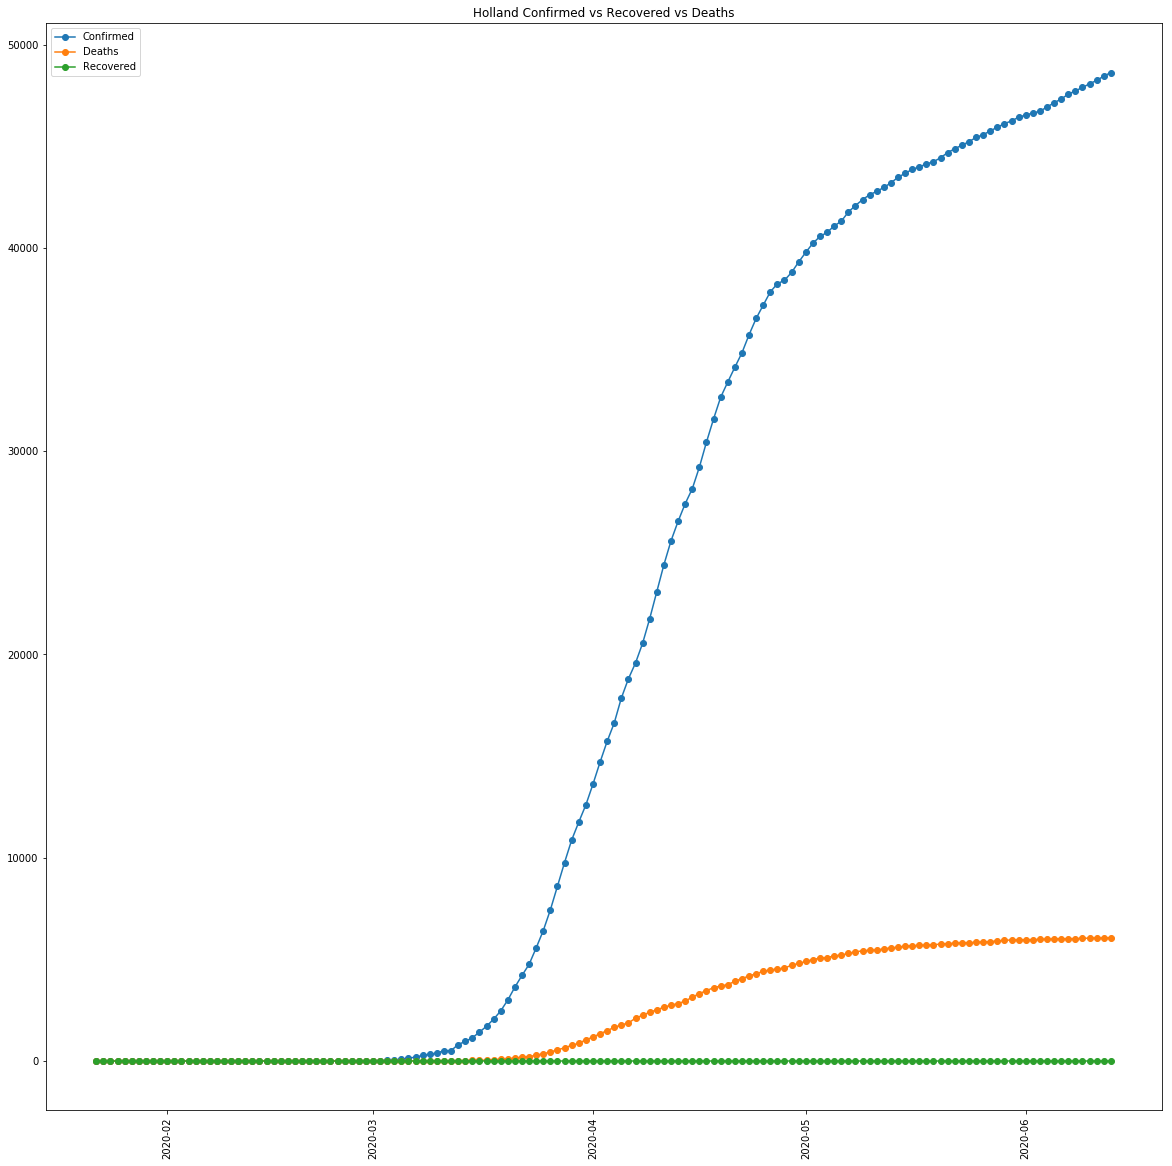

In [182]:
plt.plot_date(x=df_trans.index, y=df_trans['Holland'], label='Confirmed', linestyle='solid')
plt.plot_date(x=df_trans_deaths.index, y=df_trans_deaths['Holland'], label='Deaths', linestyle='solid')
plt.plot_date(x=df_trans_recovered.index, y=df_trans_recovered['Holland'], label='Recovered', linestyle='solid')

plt.xticks(rotation=90)
plt.legend()
plt.title('Holland Confirmed vs Recovered vs Deaths')
plt.show()

## Comparing India and New York Graphs

- Is India following New York trajectory?

### Confirmed

In [183]:
columns = []
with open('../data/Global/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    columns = next(spamreader) 
    l = [i for i in spamreader]

In [184]:
df_us_confirmed = pd.DataFrame(l, columns=columns)

In [185]:
df_us_confirmed_min = df_us_confirmed.drop(columns=['Country_Region', 'Lat', 'Long_', 'UID', 'iso2', 'iso3', 'code3',
                                                   'FIPS','Admin2', 'Combined_Key'])

In [186]:
list_of_columns = [col for col in df_us_confirmed_min.columns if 'State' not in col]

In [187]:
df_trans_us_confirmed = df_us_confirmed_min.transpose()

In [188]:
df_trans_us_confirmed.columns = df_trans_us_confirmed.iloc[0, :]

In [189]:
df_trans_us_confirmed = df_trans_us_confirmed.iloc[1:, :]

In [190]:
df_trans_us_confirmed = df_trans_us_confirmed.astype(np.int)
df_trans_us_confirmed.index = pd.to_datetime(df_trans_us_confirmed.index)

In [191]:
df_trans_us_confirmed['NY'] = df_trans_us_confirmed['New York'].agg(np.sum, axis=1)

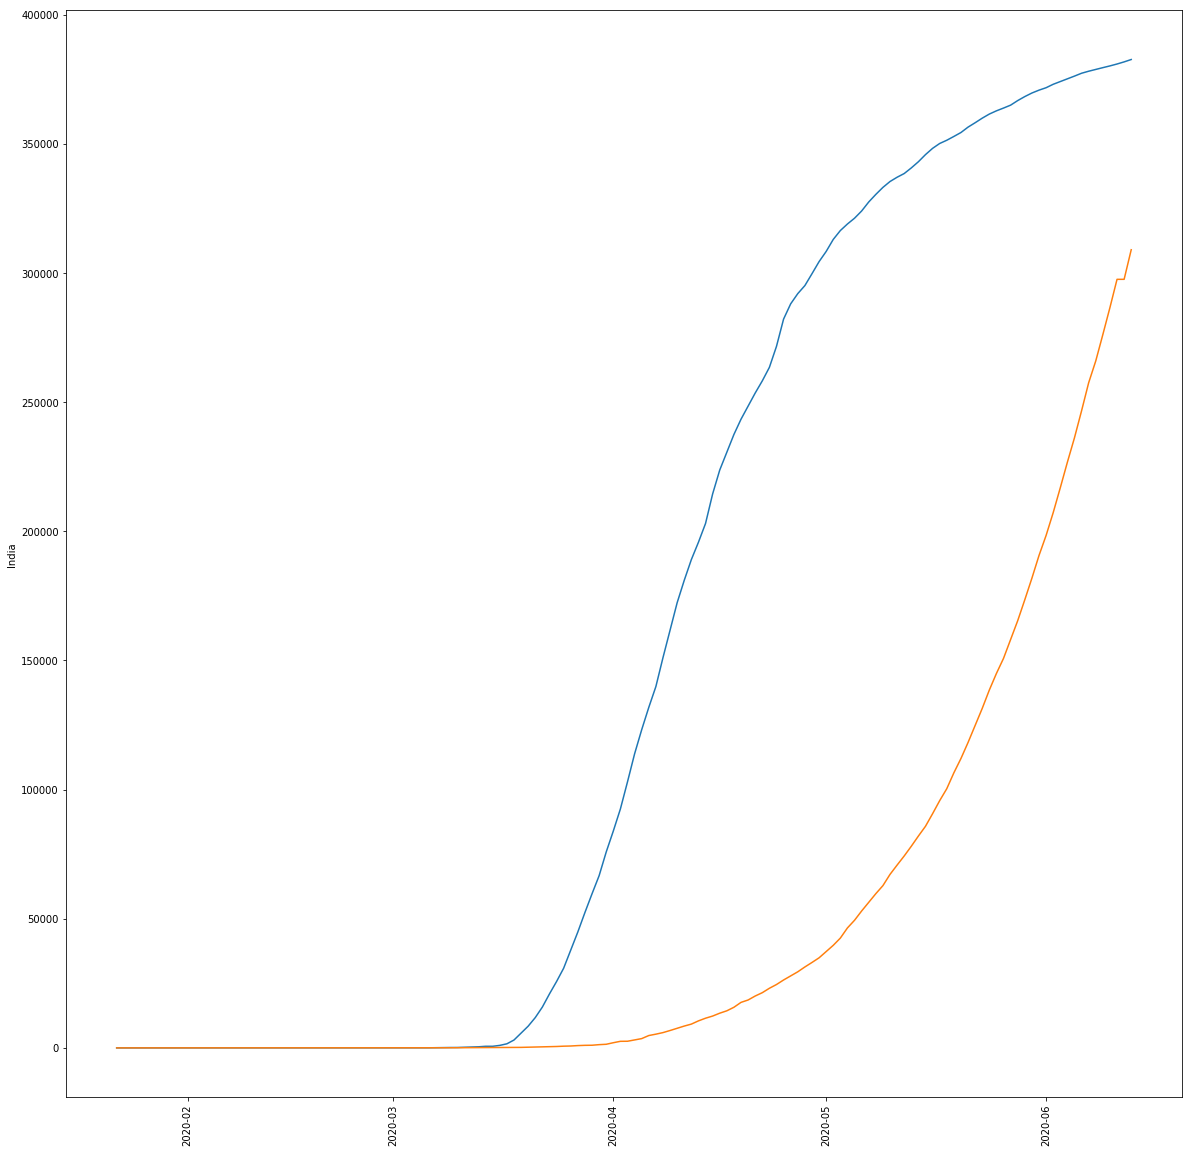

In [192]:
sns.lineplot(x=df_trans_us_confirmed.index, y=df_trans_us_confirmed['NY'])
sns.lineplot(x=df_trans.index, y=df_trans['India'])
plt.xticks(rotation=90)
plt.show()

#### Yes, India's trajectory is similar to New York. Only difference is that New York has reached the peak, whereas India is still on the rise.

### Deaths

In [193]:
columns = []
with open('../data/Global/csse_covid_19_time_series/time_series_covid19_deaths_US.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    columns = next(spamreader) 
    l = [i for i in spamreader]

In [194]:
df_us_deaths = pd.DataFrame(l, columns=columns)

In [195]:
df_us_deaths_min = df_us_deaths.drop(columns=['Country_Region', 'Lat', 'Long_', 'UID', 'iso2', 'iso3', 'code3',
                                                   'FIPS','Admin2', 'Combined_Key', 'Population'])

In [196]:
list_of_columns = [col for col in df_us_deaths_min.columns if 'State' not in col]

In [197]:
df_trans_us_deaths = df_us_deaths_min.transpose()

In [198]:
df_trans_us_deaths.columns = df_trans_us_deaths.iloc[0, :]

In [199]:
df_trans_us_deaths = df_trans_us_deaths.iloc[1:, :]

In [200]:
df_trans_us_deaths.head()

Province_State American Samoa Guam  \
1/22/20                     0    0   
1/23/20                     0    0   
1/24/20                     0    0   
1/25/20                     0    0   
1/26/20                     0    0   

Province_State Northern Mariana Islands  \
1/22/20                               0   
1/23/20                               0   
1/24/20                               0   
1/25/20                               0   
1/26/20                               0   

Province_State Puerto Rico Virgin Islands  \
1/22/20                  0              0   
1/23/20                  0              0   
1/24/20                  0              0   
1/25/20                  0              0   
1/26/20                  0              0   

Province_State Alabama Alabama Alabama Alabama  \
1/22/20              0       0       0       0   
1/23/20              0       0       0       0   
1/24/20              0       0       0       0   
1/25/20              0       0       0       0   
1/26/20              0       0       0       0   

Province_State Alabama Alabama Alabama Alabama  \
1/22/20              0       0       0       0   
1/23/20              0       0       0       0   
1/24/20              0       0       0       0   
1/25/20              0       0       0       0   
1/26/20              0       0       0       0   

Province_State Alabama Alabama Alabama Alabama  \
1/22/20              0       0       0       0   
1/23/20              0       0       0       0   
1/24/20              0       0       0       0   
1/25/20              0       0       0       0   
1/26/20              0       0       0       0   

Province_State Alabama Alabama Alabama Alabama  \
1/22/20              0       0       0       0   
1/23/20              0       0       0       0   
1/24/20              0       0       0       0   
1/25/20              0       0       0       0   
1/26/20              0       0       0       0   

Province_State Alabama Alabama Alabama Alabama  \
1/22/20              0       0       0       0   
1/23/20              0       0       0       0   
1/24/20              0       0       0       0   
1/25/20              0       0       0       0   
1/26/20              0       0       0       0   

Province_State ...  Ohio Oklahoma Oregon  \
1/22/20        ...     0        0      0   
1/23/20        ...     0        0      0   
1/24/20        ...     0        0      0   
1/25/20        ...     0        0      0   
1/26/20        ...     0        0      0   

Province_State Pennsylvania Rhode Island  \
1/22/20                   0            0   
1/23/20                   0            0   
1/24/20                   0            0   
1/25/20                   0            0   
1/26/20                   0            0   

Province_State South Carolina South Dakota  \
1/22/20                     0            0   
1/23/20                     0            0   
1/24/20                     0            0   
1/25/20                     0            0   
1/26/20                     0            0   

Province_State Tennessee Texas Utah Vermont  \
1/22/20                0     0    0       0   
1/23/20                0     0    0       0   
1/24/20                0     0    0       0   
1/25/20                0     0    0       0   
1/26/20                0     0    0       0   

Province_State Virginia Washington  \
1/22/20               0          0   
1/23/20               0          0   
1/24/20               0          0   
1/25/20               0          0   
1/26/20               0          0   

Province_State West Virginia Wisconsin Wyoming  \
1/22/20                    0         0       0   
1/23/20                    0         0       0   
1/24/20                    0         0       0   
1/25/20                    0         0       0   
1/26/20                    0         0       0   

Province_State Grand Princess Michigan Michigan  \
1/22/20                     0        0        0   
1/23/20       

In [201]:
df_trans_us_deaths = df_trans_us_deaths.astype(np.int)
df_trans_us_deaths.index = pd.to_datetime(df_trans_us_deaths.index)

In [202]:
df_trans_us_deaths['NY'] = df_trans_us_deaths['New York'].agg(np.sum, axis=1)

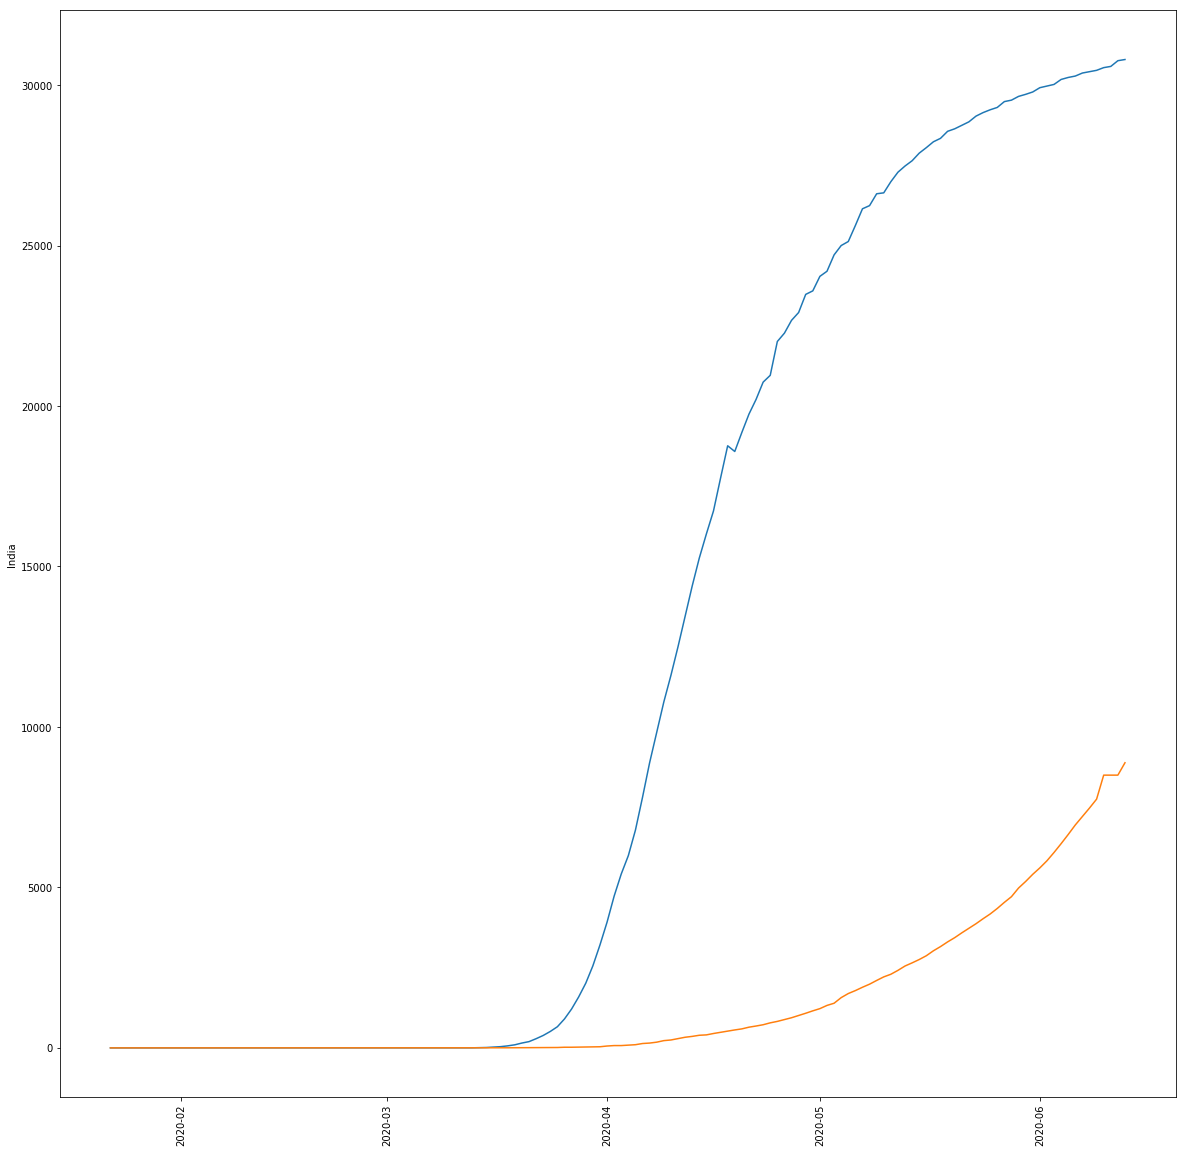

In [203]:
sns.lineplot(x=df_trans_us_deaths.index, y=df_trans_us_deaths['NY'])
sns.lineplot(x=df_trans_deaths.index, y=df_trans_deaths['India'])
plt.xticks(rotation=90)
plt.show()

### Comparing Confirmed vs Recovered vs Deaths for selected countries

### India

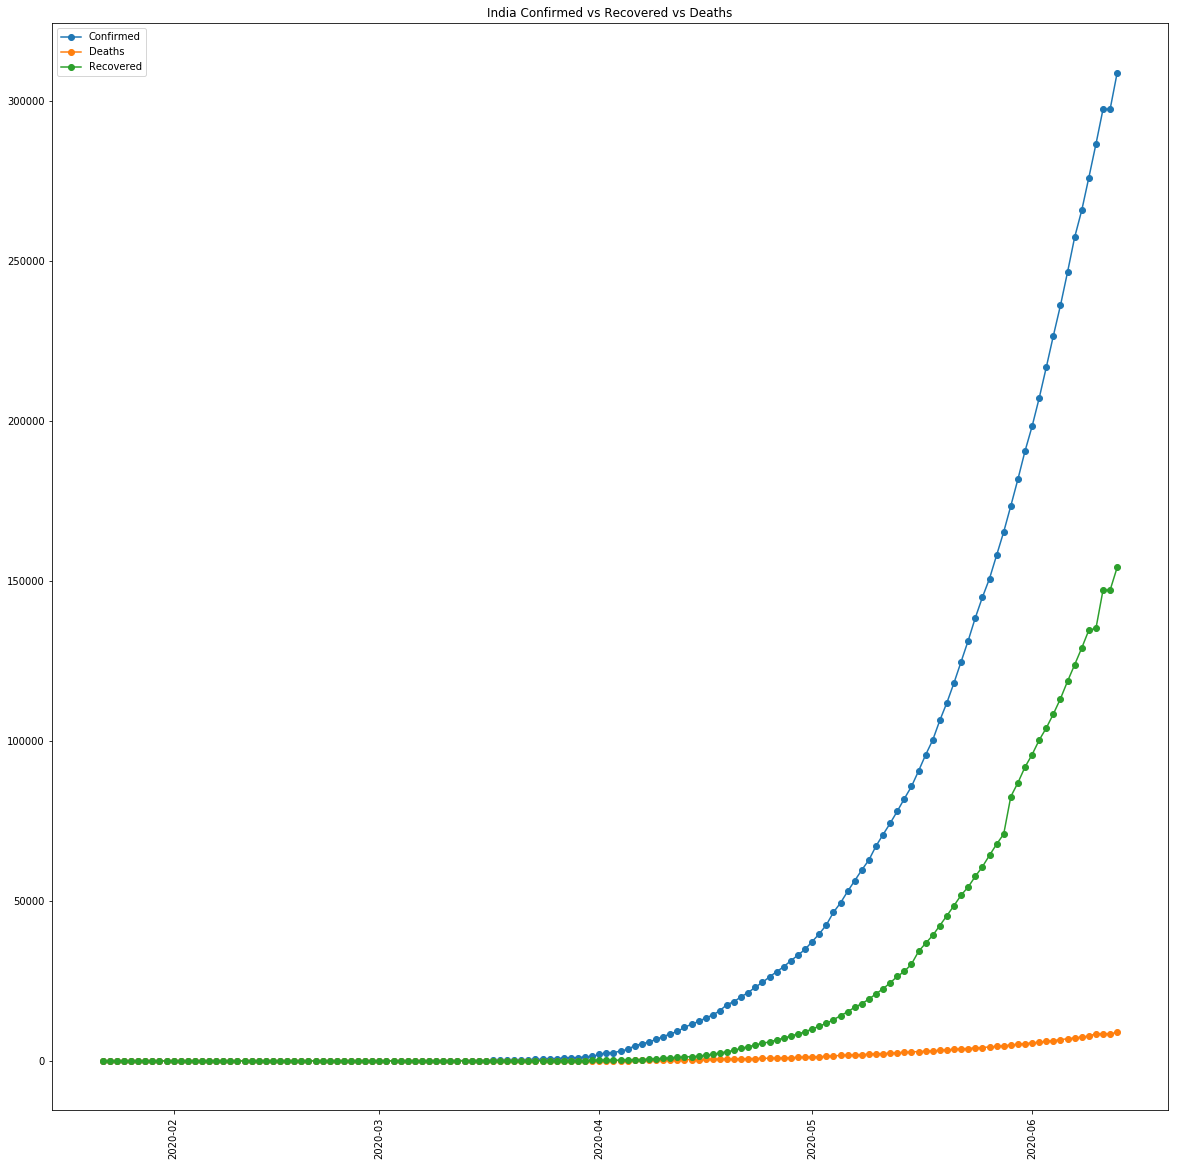

In [204]:
plt.plot_date(x=df_trans.index, y=df_trans['India'], label='Confirmed', linestyle='solid')
plt.plot_date(x=df_trans_deaths.index, y=df_trans_deaths['India'], label='Deaths', linestyle='solid')
plt.plot_date(x=df_trans_recovered.index, y=df_trans_recovered['India'], label='Recovered', linestyle='solid')

plt.xticks(rotation=90)
plt.legend()
plt.title('India Confirmed vs Recovered vs Deaths')
plt.show()

### UK

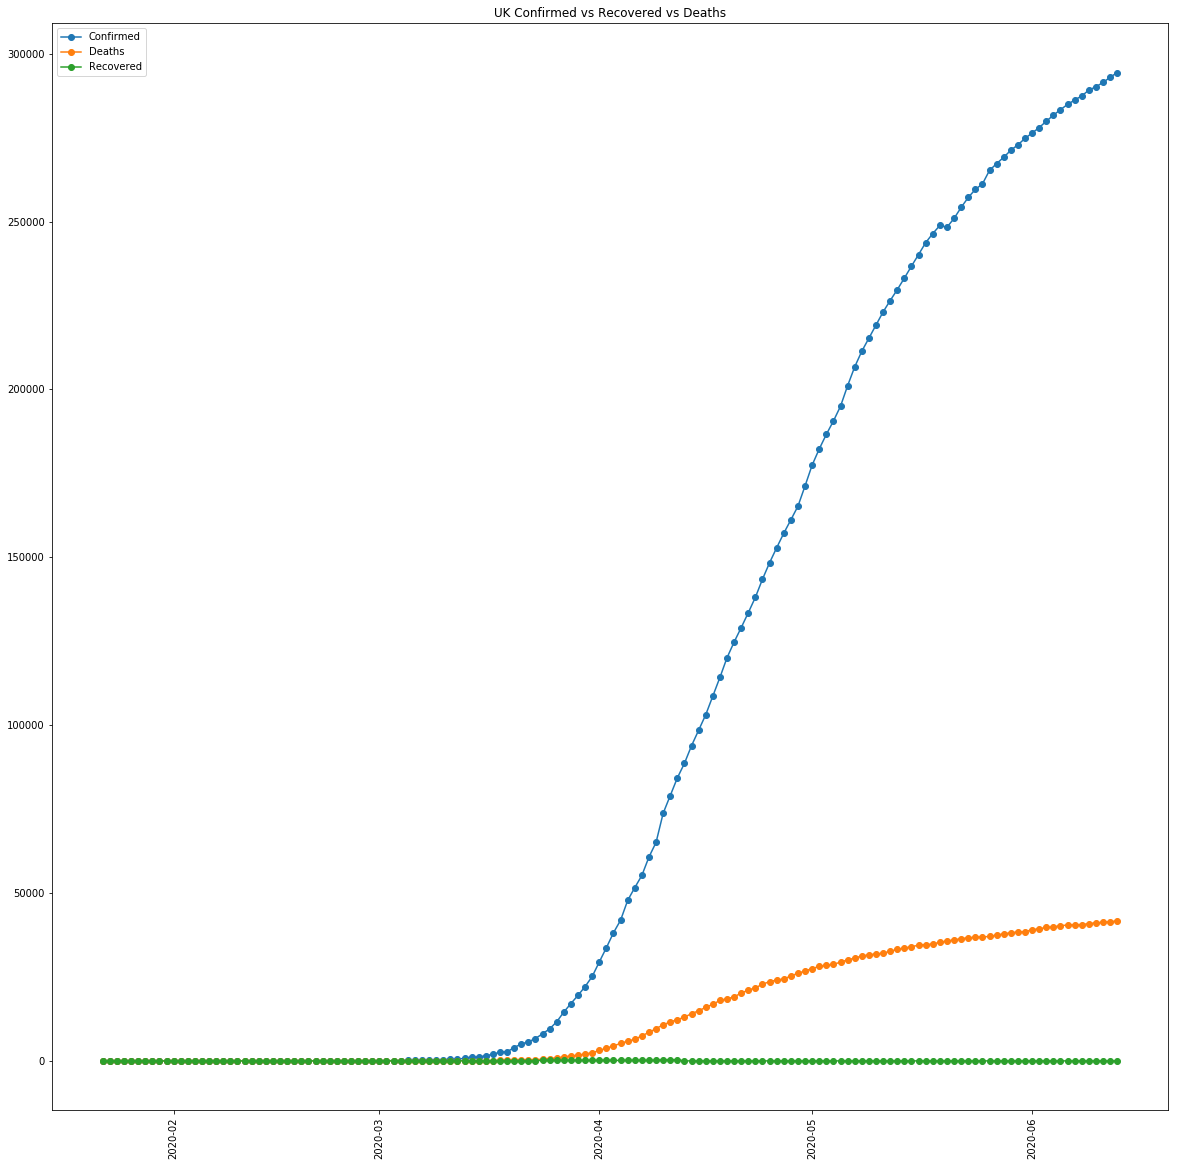

In [205]:
plt.plot_date(x=df_trans.index, y=df_trans['UK'], label='Confirmed', linestyle='solid')
plt.plot_date(x=df_trans_deaths.index, y=df_trans_deaths['UK'], label='Deaths', linestyle='solid')
plt.plot_date(x=df_trans_recovered.index, y=df_trans_recovered['UK'], label='Recovered', linestyle='solid')

plt.xticks(rotation=90)
plt.legend()
plt.title('UK Confirmed vs Recovered vs Deaths')
plt.show()

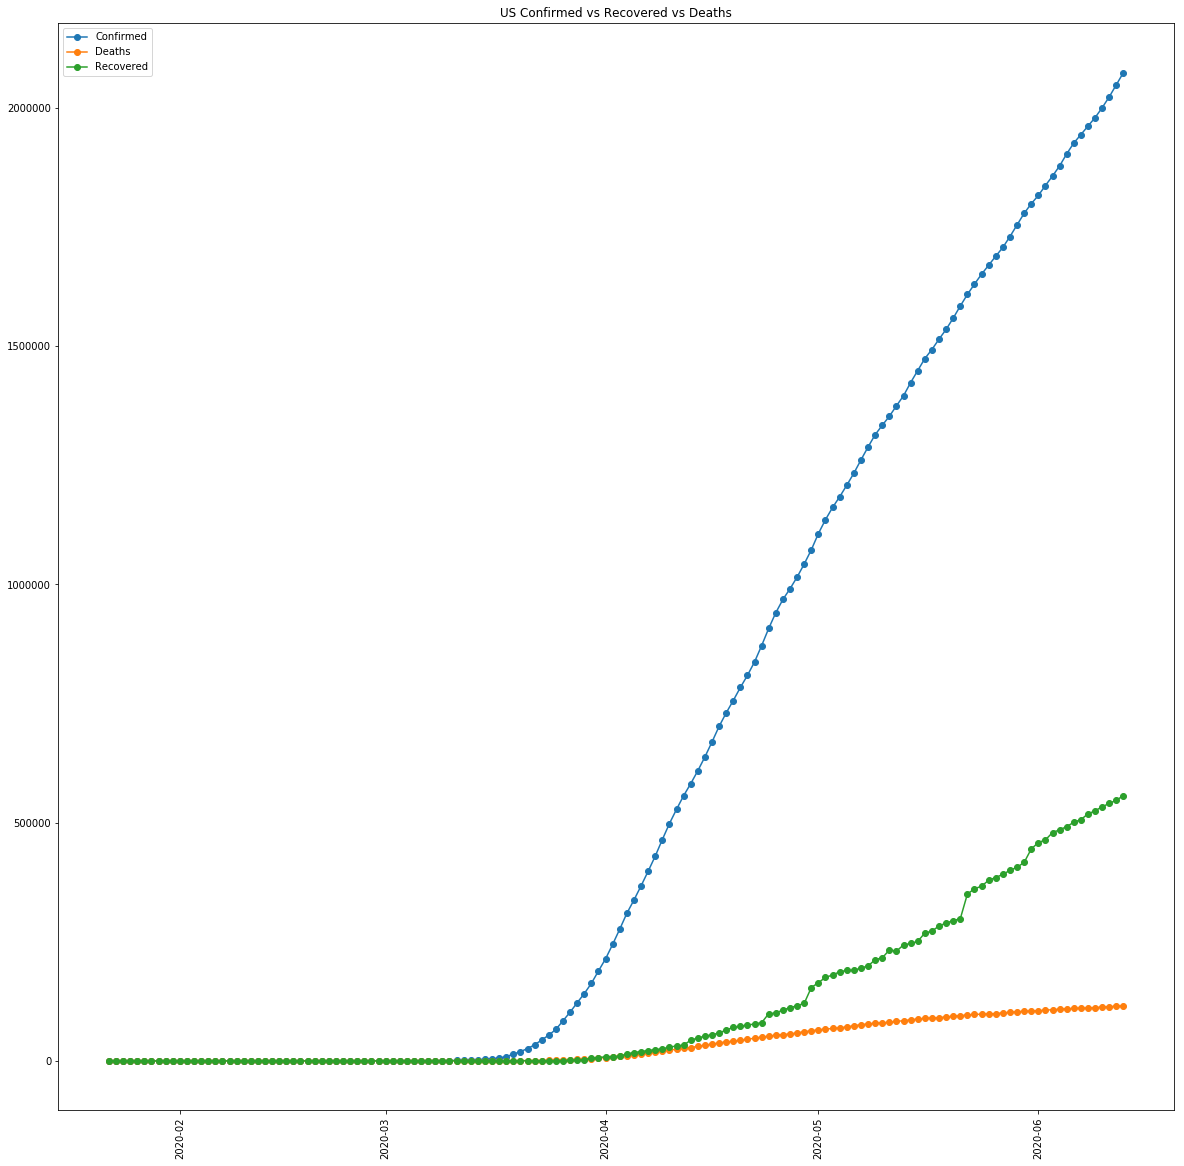

In [206]:
plt.plot_date(x=df_trans.index, y=df_trans['US'], label='Confirmed', linestyle='solid')
plt.plot_date(x=df_trans_deaths.index, y=df_trans_deaths['US'], label='Deaths', linestyle='solid')
plt.plot_date(x=df_trans_recovered.index, y=df_trans_recovered['US'], label='Recovered', linestyle='solid')

plt.xticks(rotation=90)
plt.legend()
plt.title('US Confirmed vs Recovered vs Deaths')
plt.show()

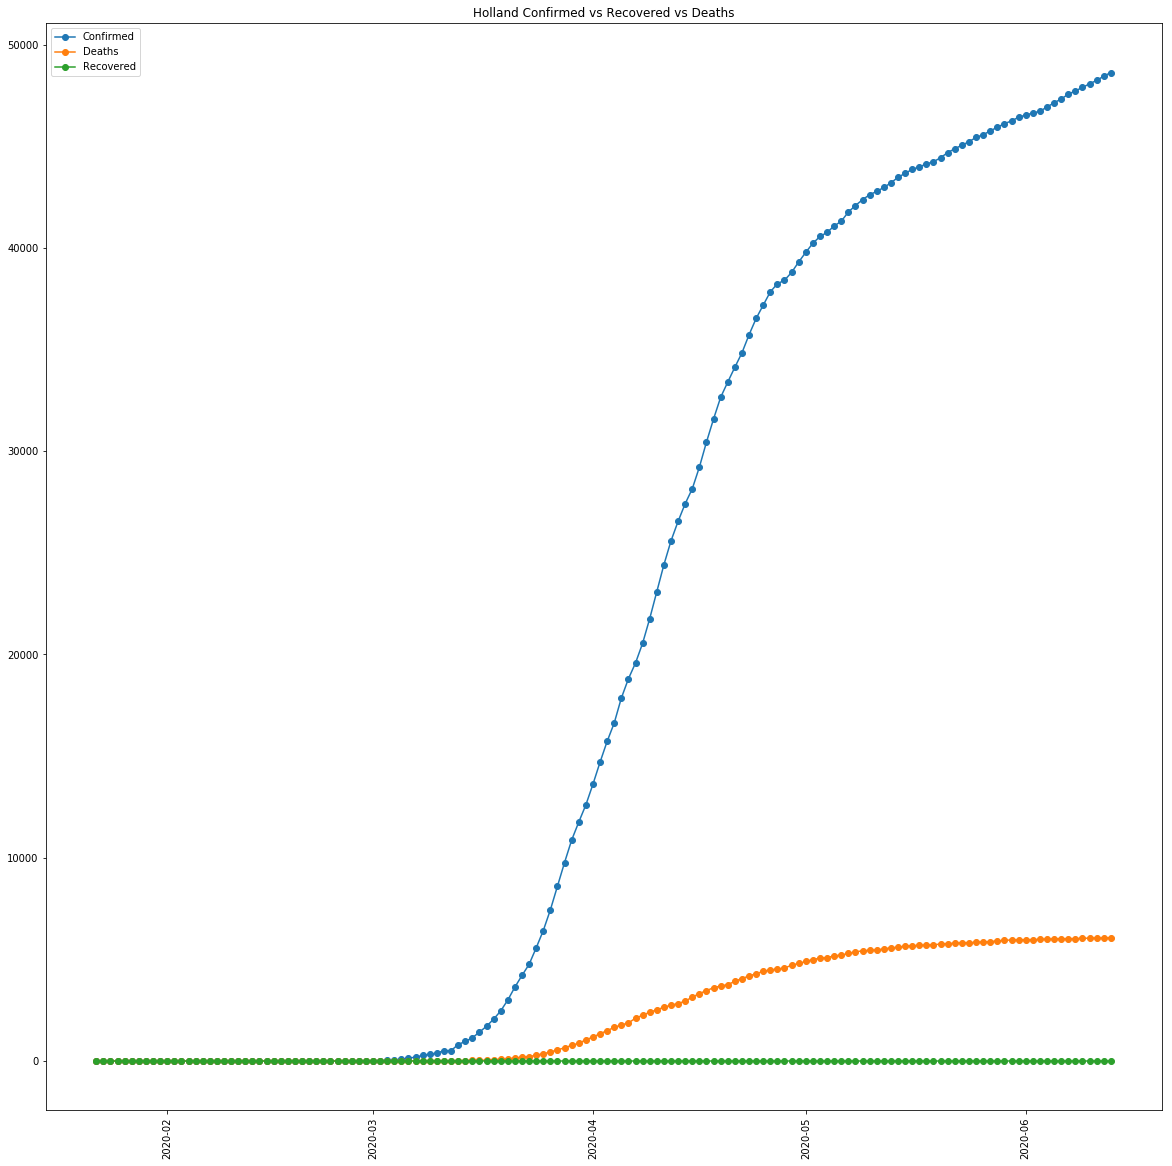

In [207]:
plt.plot_date(x=df_trans.index, y=df_trans['Holland'], label='Confirmed', linestyle='solid')
plt.plot_date(x=df_trans_deaths.index, y=df_trans_deaths['Holland'], label='Deaths', linestyle='solid')
plt.plot_date(x=df_trans_recovered.index, y=df_trans_recovered['Holland'], label='Recovered', linestyle='solid')

plt.xticks(rotation=90)
plt.legend()
plt.title('Holland Confirmed vs Recovered vs Deaths')
plt.show()

### Time Series Forecasting using ARIMA model


### US Deaths

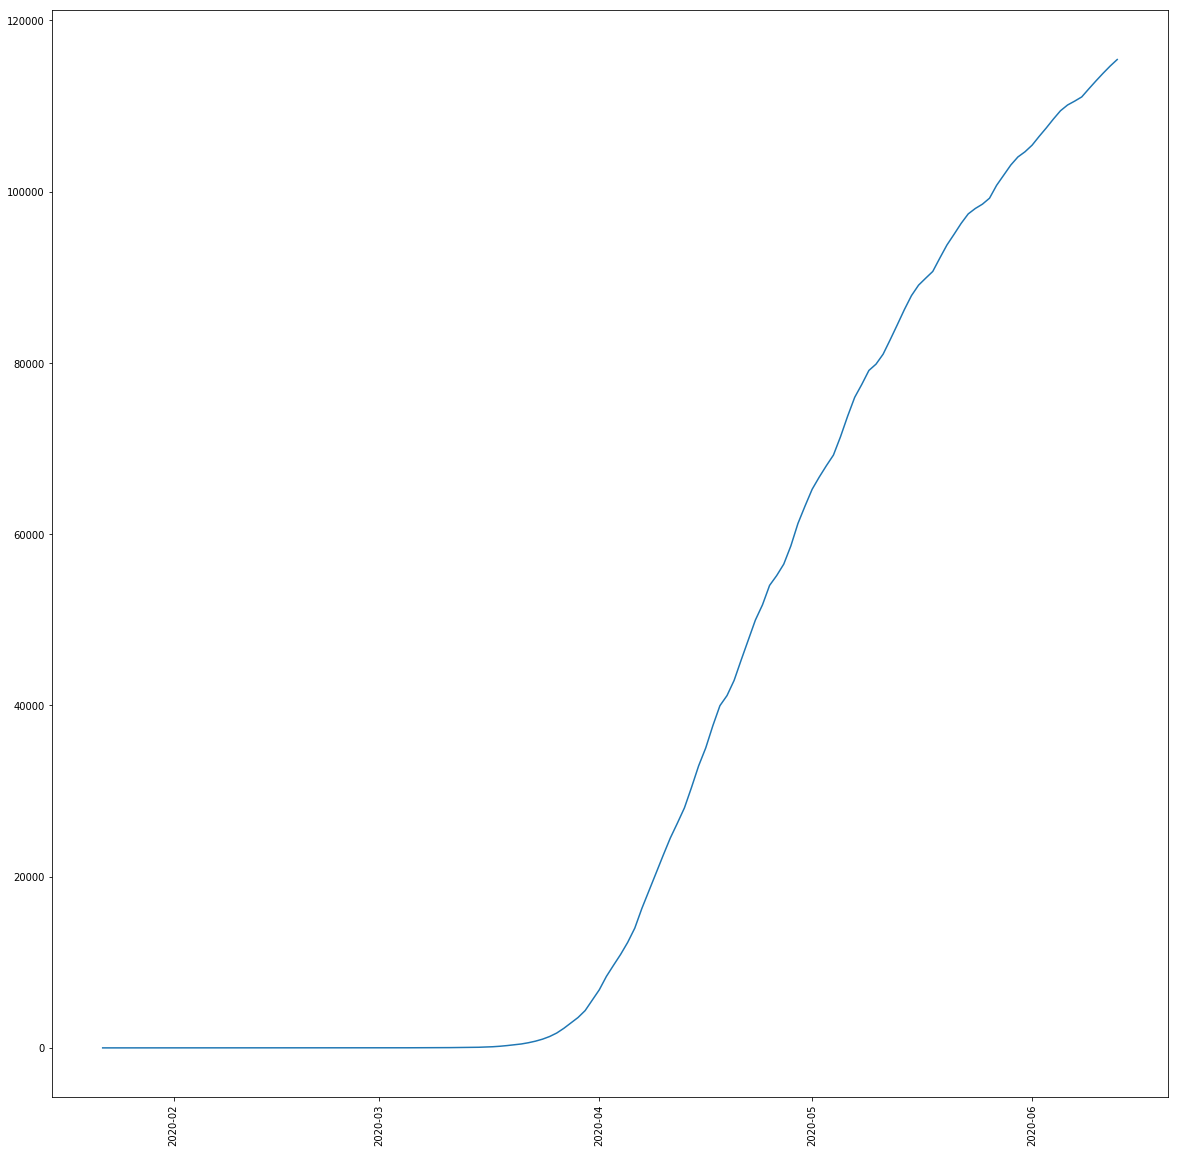

In [208]:
df_trans_deaths_us = df_trans_deaths[['US']]
plt.plot(df_trans_deaths_us)
plt.xticks(rotation=90)
plt.show()

In [209]:
df_us1 = df_trans_deaths_us.diff().fillna(df_trans_deaths_us)
df_us1.tail()

Country/Region     US
2020-06-09      946.0
2020-06-10      921.0
2020-06-11      888.0
2020-06-12      846.0
2020-06-13      767.0

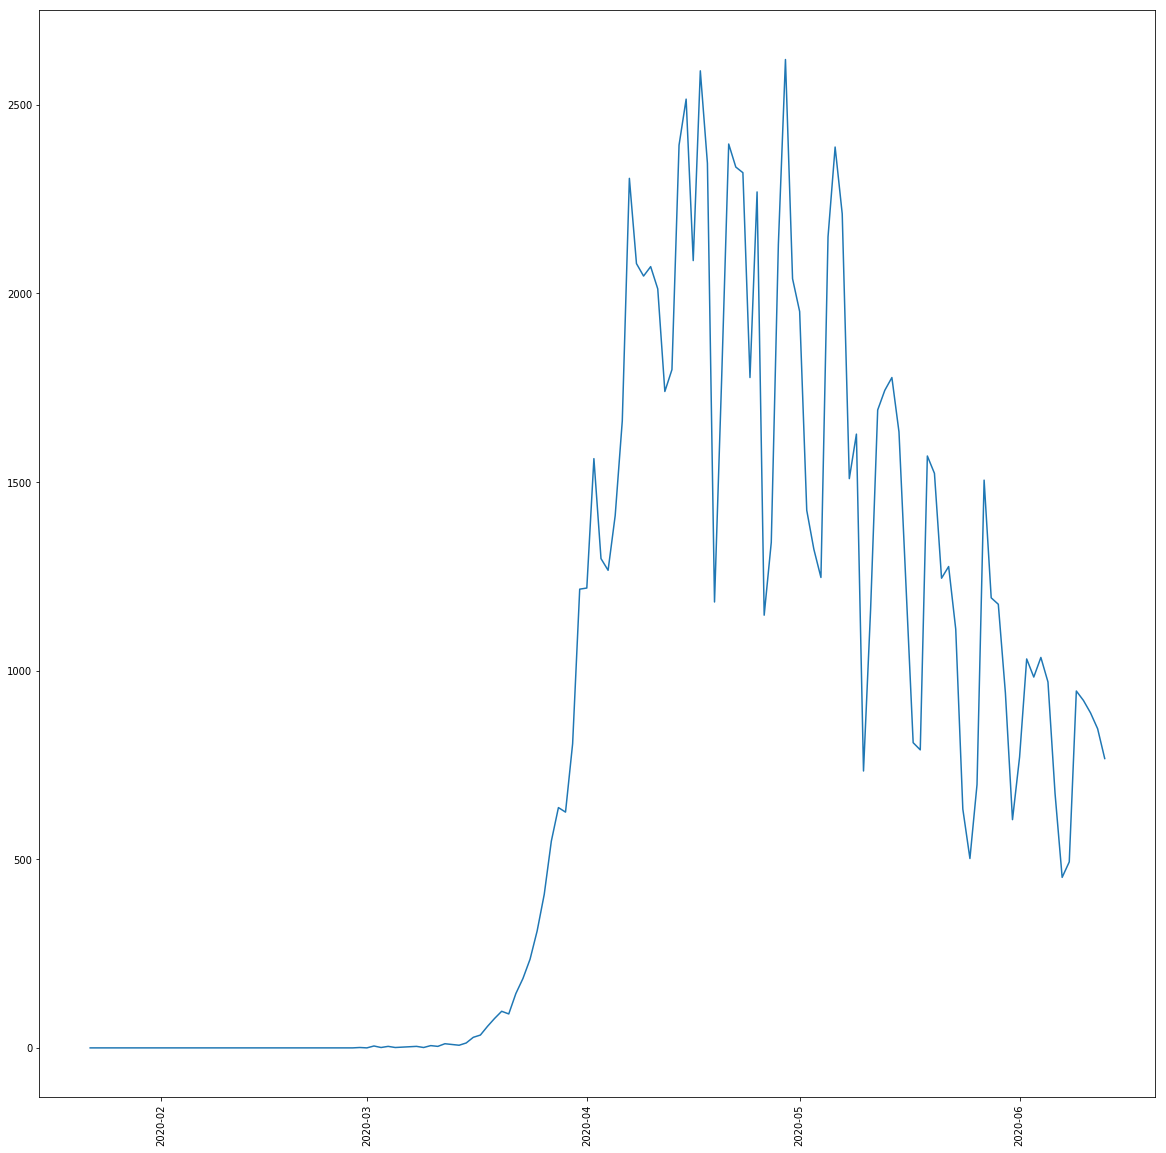

In [210]:
plt.plot(df_us1)
plt.xticks(rotation=90)
plt.show()

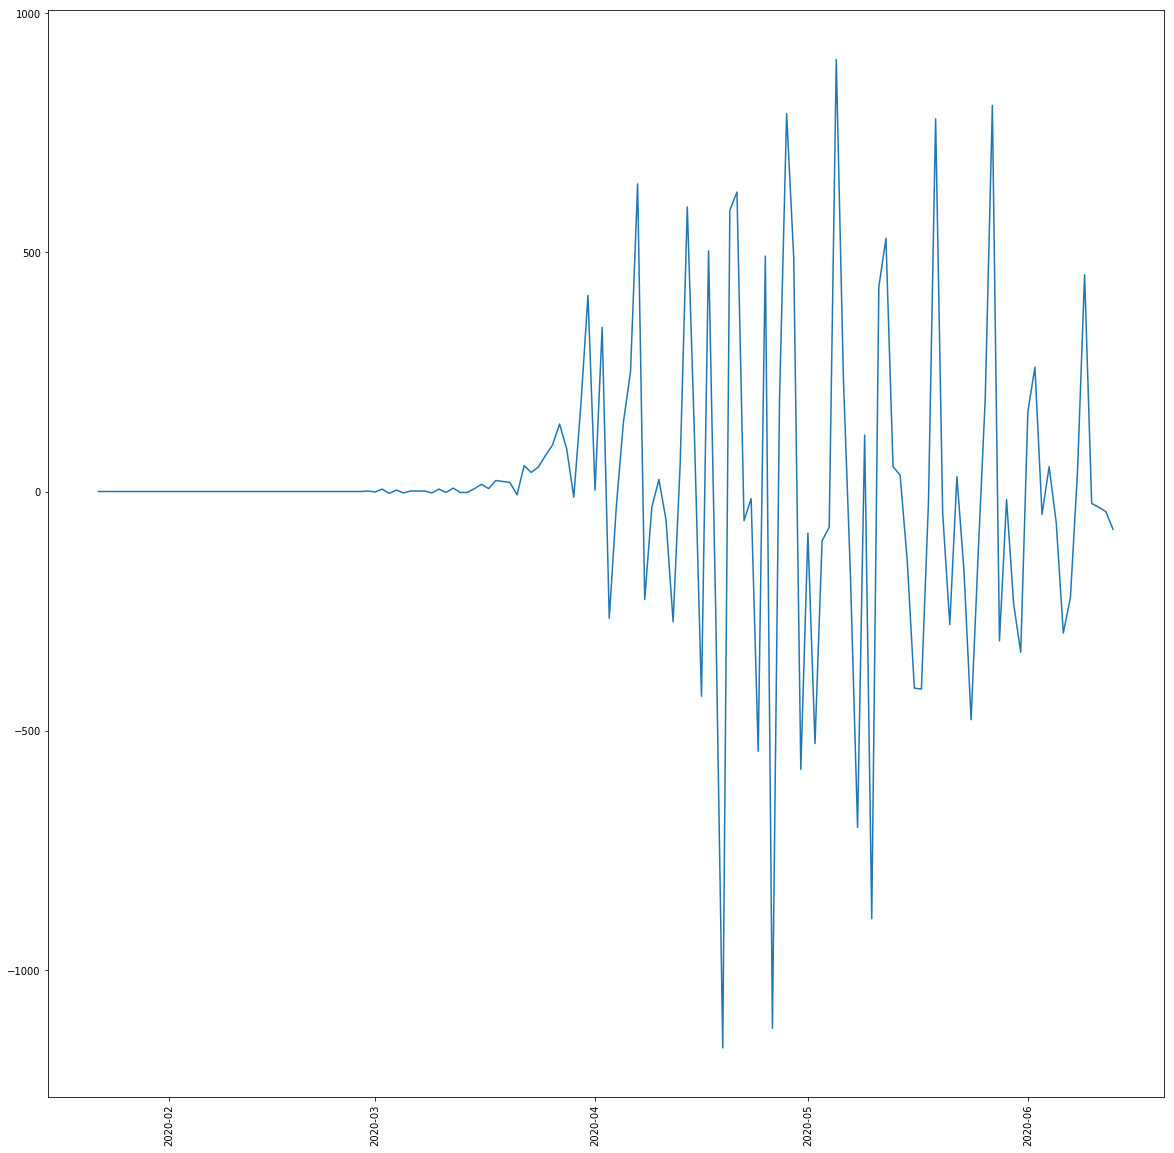

In [211]:
df_us2 = df_us1.diff().fillna(df_us1)
plt.plot(df_us2)
plt.xticks(rotation=90)
plt.show()

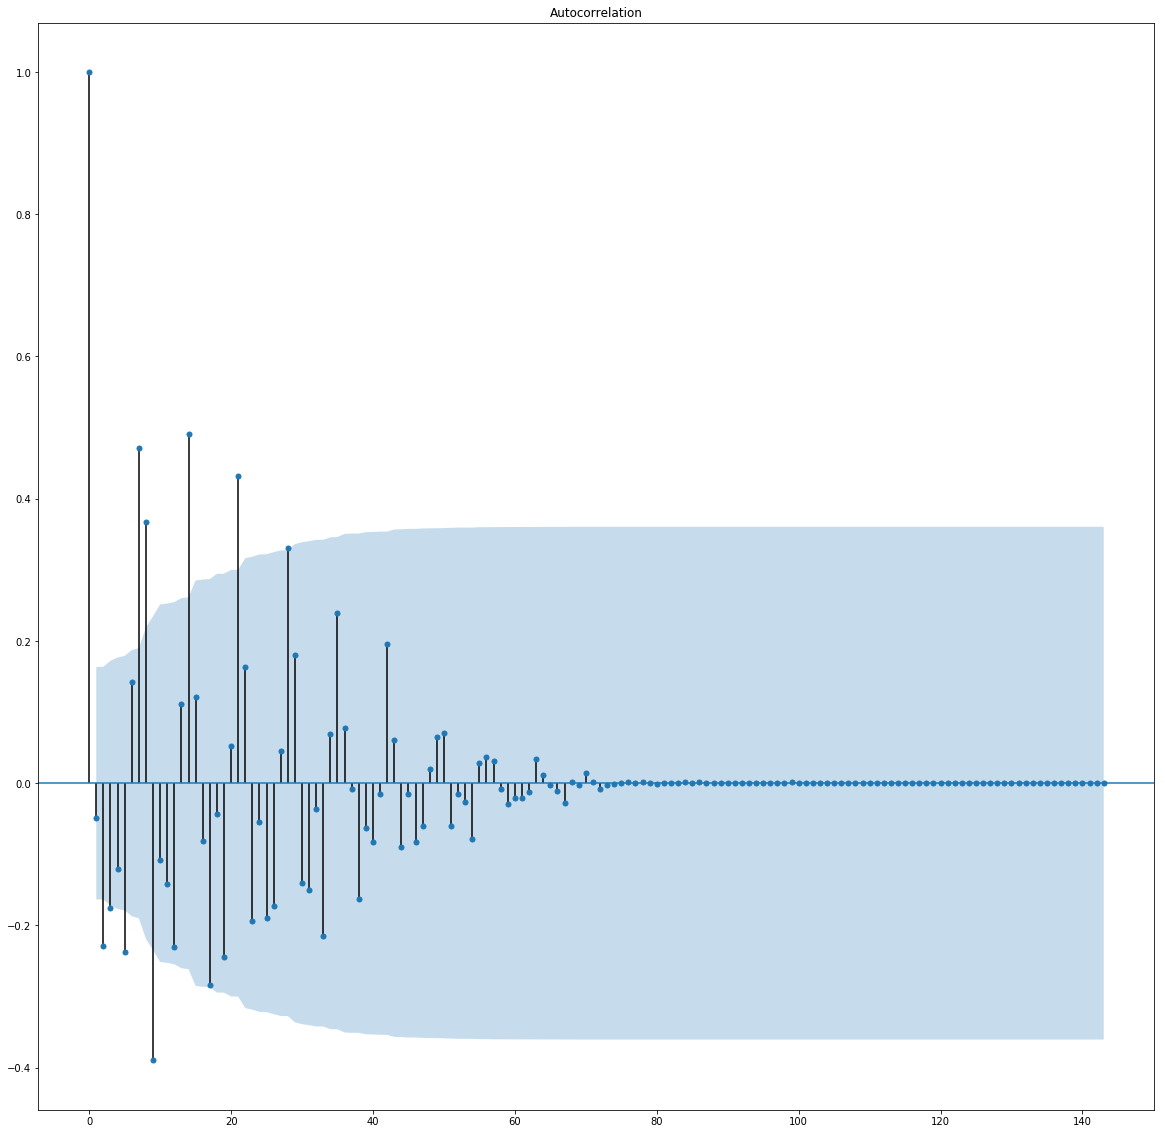

In [212]:
plot_acf(df_us2)
plt.show()

/home/akash/Dev/python/venv/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


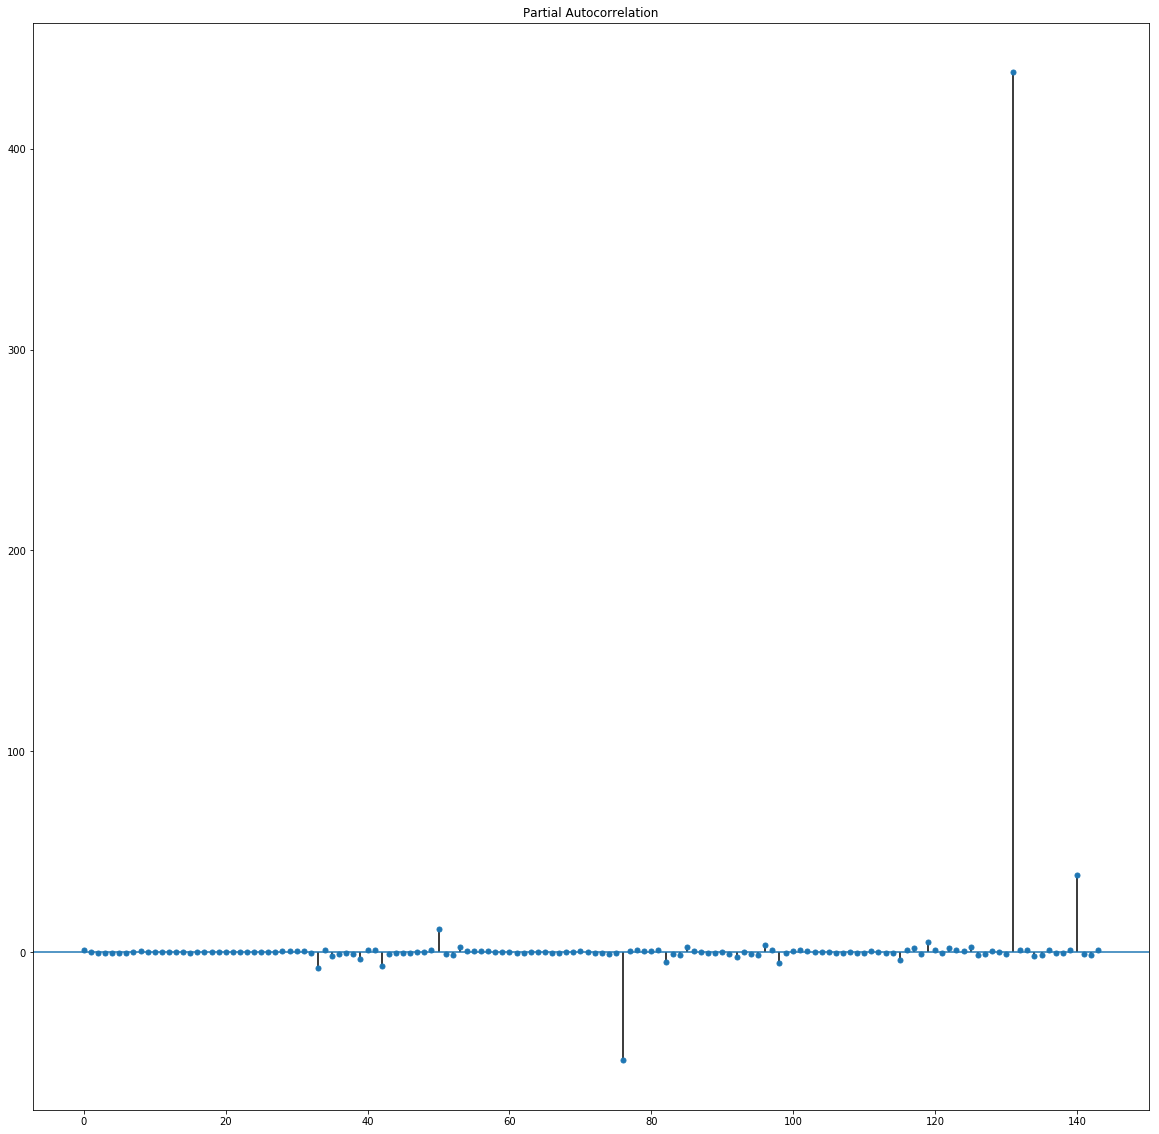

In [213]:
plot_pacf(df_us2)
plt.show()

In [214]:
ARIMA_model = ARIMA(df_trans_deaths_us, order=(5, 2, 3)).fit(transparams=False)

/home/akash/Dev/python/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/akash/Dev/python/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/akash/Dev/python/venv/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [215]:
ARIMA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D2.US   No. Observations:                  142
Model:                 ARIMA(5, 2, 3)   Log Likelihood                -966.924
Method:                       css-mle   S.D. of innovations                nan
Date:                Sun, 14 Jun 2020   AIC                           1953.847
Time:                        20:10:46   BIC                           1983.406
Sample:                    01-24-2020   HQIC                          1965.859
                         - 06-13-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.5602      7.422      0.749      0.455      -8.988      20.108
ar.L1.D2.US     0.1822      0.187      0.974      0.332      -0.184       0.549
ar.L2.D2.US    -0.5781      0.158     -3.664      0.000      -0.887      -0.269
ar.L3.D2.US    -0.4037      0.154     -2.622      0.010      -0.705      -0.102
ar.L4.D2.US    -0.2941      0.072     -4.085      0.000      -0.435      -0.153
ar.L5.D2.US    -0.4650      0.101     -4.584      0.000      -0.664      -0.266
ma.L1.D2.US    -0.6507      0.198     -3.294      0.001      -1.038      -0.264
ma.L2.D2.US     0.4643      0.232      1.999      0.048       0.009       0.919
ma.L3.D2.US     0.2238      0.186      1.201      0.232      -0.141       0.589
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6280           -0.7895j            1.0089           -0.1431
AR.2            0.6280           +0.7895j            1.0089            0.1431
AR.3           -0.2517           -1.2091j            1.2351           -0.2827
AR.4           -0.2517           +1.2091j            1.2351            0.2827
AR.5           -1.3852           -0.0000j            1.3852           -0.5000
MA.1            0.6346           -0.9662j            1.1560           -0.1575
MA.2            0.6346           +0.9662j            1.1560            0.1575
MA.3           -3.3441           -0.0000j            3.3441           -0.5000
-----------------------------------------------------------------------------
"""

In [216]:
arma_predict = ARIMA_model.predict('2020-06-05', '2020-06-15', typ='levels')

In [217]:
arma_predict

2020-06-05    109542.385388
2020-06-06    110175.562386
2020-06-07    110620.191302
2020-06-08    111189.265834
2020-06-09    111871.638492
2020-06-10    113080.910565
2020-06-11    113924.105756
2020-06-12    114671.848910
2020-06-13    115320.692999
2020-06-14    115938.159587
2020-06-15    116490.254363
Freq: D, dtype: float64

In [218]:
undiff1 = df_us2.cumsum().fillna(df_us2)
undiff2 = df_us1.cumsum().fillna(df_us1)

### Mean Absolute Error for Forecast Evaluation

In [219]:
arma_predict2 = ARIMA_model.predict('2020-01-24', '2020-06-25', typ='levels')
ser2 = arma_predict2

In [220]:
ser2.diff()

2020-01-24            NaN
2020-01-25      -0.048863
2020-01-26       1.271730
2020-01-27       1.691043
2020-01-28       2.614248
2020-01-29       5.938234
2020-01-30       3.638582
2020-01-31      -2.221023
2020-02-01      -4.518444
2020-02-02      -2.130377
2020-02-03       0.334897
2020-02-04       1.643495
2020-02-05       1.472993
2020-02-06       0.032958
2020-02-07      -1.168902
2020-02-08      -1.042512
2020-02-09      -0.175014
2020-02-10       0.544152
2020-02-11       0.671049
2020-02-12       0.225123
2020-02-13      -0.317129
2020-02-14      -0.461095
2020-02-15      -0.199400
2020-02-16       0.141885
2020-02-17       0.284536
                 ...     
2020-06-01     395.533250
2020-06-02    1239.932418
2020-06-03    1256.713759
2020-06-04     918.078121
2020-06-05     894.691584
2020-06-06     633.176998
2020-06-07     444.628915
2020-06-08     569.074532
2020-06-09     682.372657
2020-06-10    1209.272073
2020-06-11     843.195191
2020-06-12     747.743154
2020-06-13  

### Note:

- The model predicted number of deaths on 13th June as 648.
- Actual number of deaths on 13th June: 654

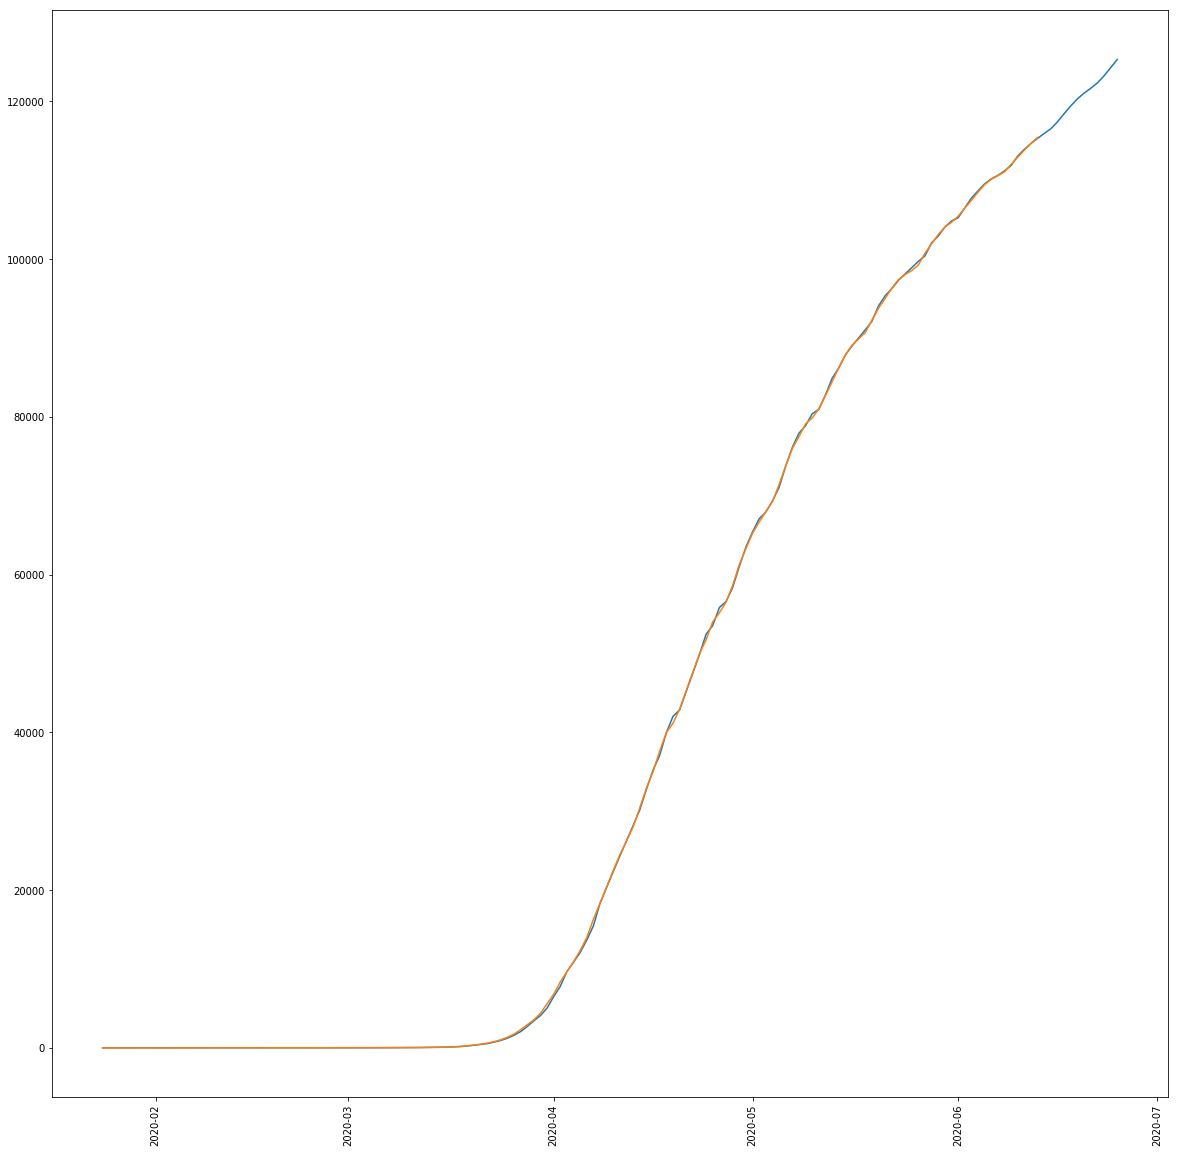

In [221]:
actual = df_trans_deaths_us.loc['2020-01-24':, :]
plt.plot(ser2)
plt.plot(actual)
plt.xticks(rotation=90)
plt.show()

#### Note the predicted trajectory in blue.

### Converting DataFrame to actual time series data, where each day has number of deaths i.e deaths value is not cumulated.

In [222]:
df_trans_deaths_us = df_trans_deaths[['US']]

In [223]:
df_trans_deaths_us = df_trans_deaths_us.diff(axis=0).fillna(df_trans_deaths_us)

In [224]:
df_trans_deaths_us.tail()

Country/Region     US
2020-06-09      946.0
2020-06-10      921.0
2020-06-11      888.0
2020-06-12      846.0
2020-06-13      767.0

In [225]:
df_trans_deaths_us.index

DatetimeIndex(['2020-01-22', '2020-01-23',
               '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-06-04', '2020-06-05',
               '2020-06-06', '2020-06-07',
               '2020-06-08', '2020-06-09',
               '2020-06-10', '2020-06-11',
               '2020-06-12', '2020-06-13'],
              dtype='datetime64[ns]', length=144, freq=None)

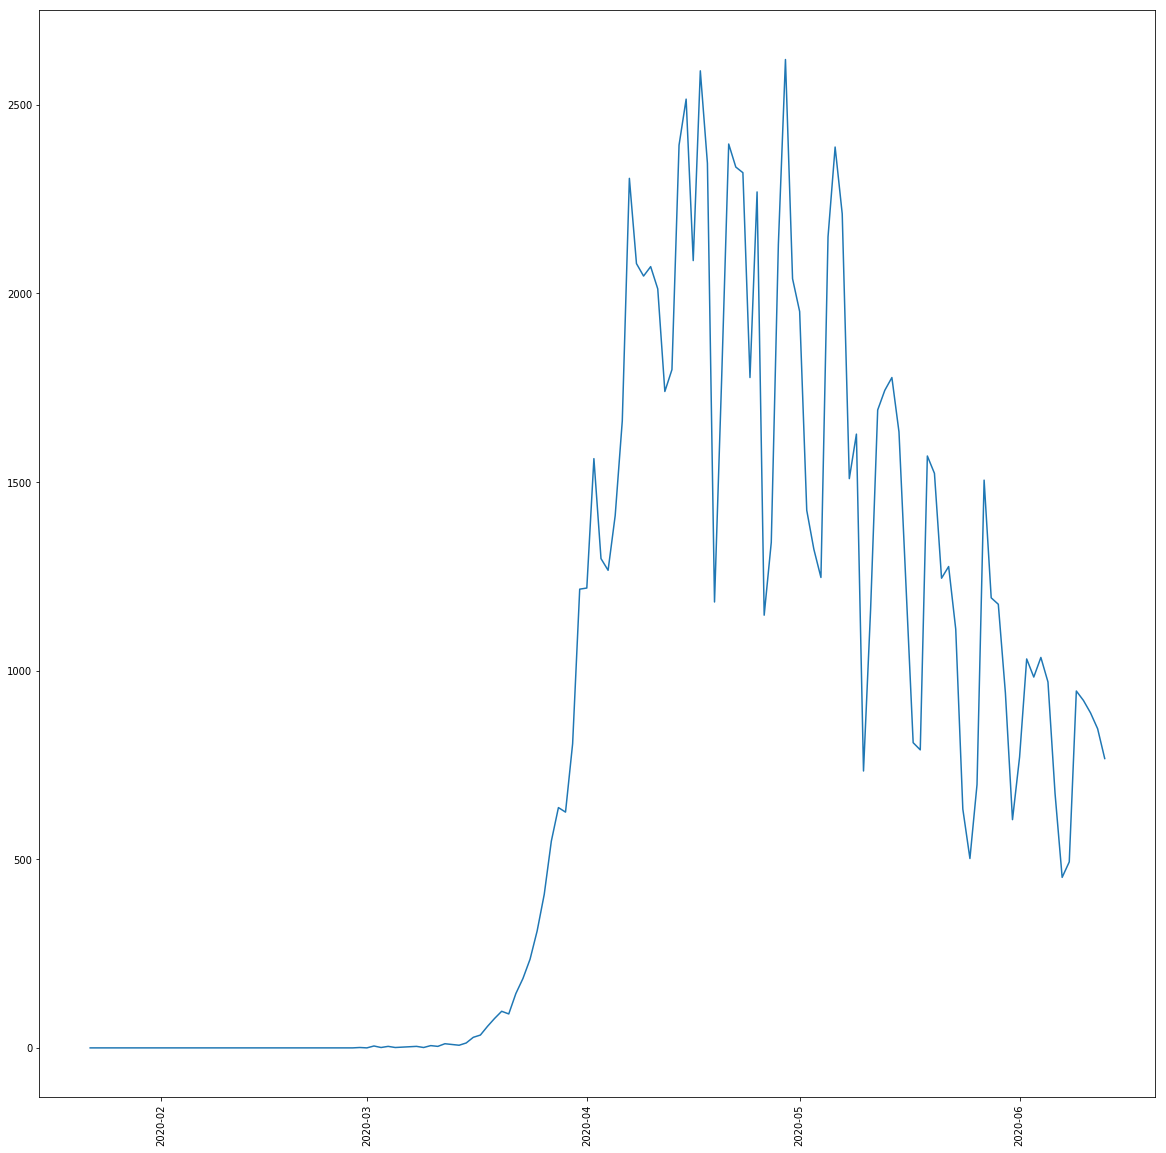

In [226]:
plt.plot(df_trans_deaths_us)
plt.xticks(rotation=90)
plt.show()

In [227]:
df_us1 = df_trans_deaths_us.diff().fillna(df_trans_deaths_us)
df_us1.tail()

Country/Region     US
2020-06-09      453.0
2020-06-10      -25.0
2020-06-11      -33.0
2020-06-12      -42.0
2020-06-13      -79.0

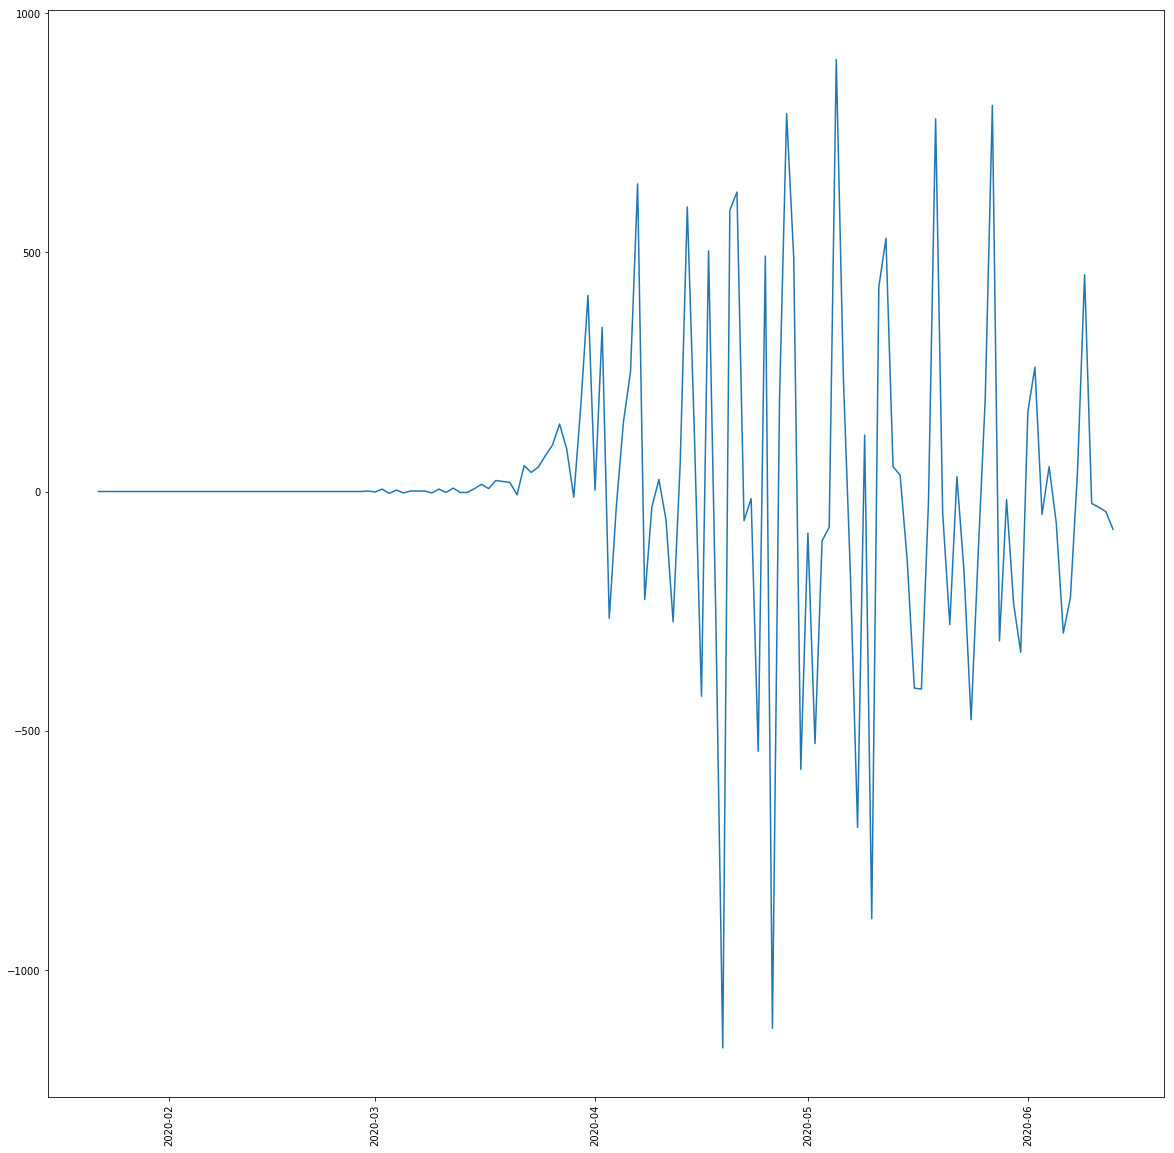

In [228]:
plt.plot(df_us1)
plt.xticks(rotation=90)
plt.show()

In [229]:
df_us1 = df_trans_deaths_us.diff().fillna(df_trans_deaths_us)
df_us1.tail()

Country/Region     US
2020-06-09      453.0
2020-06-10      -25.0
2020-06-11      -33.0
2020-06-12      -42.0
2020-06-13      -79.0

In [230]:
df_us2 = df_us1.diff().fillna(df_us1)
df_us2.tail()

Country/Region     US
2020-06-09      412.0
2020-06-10     -478.0
2020-06-11       -8.0
2020-06-12       -9.0
2020-06-13      -37.0

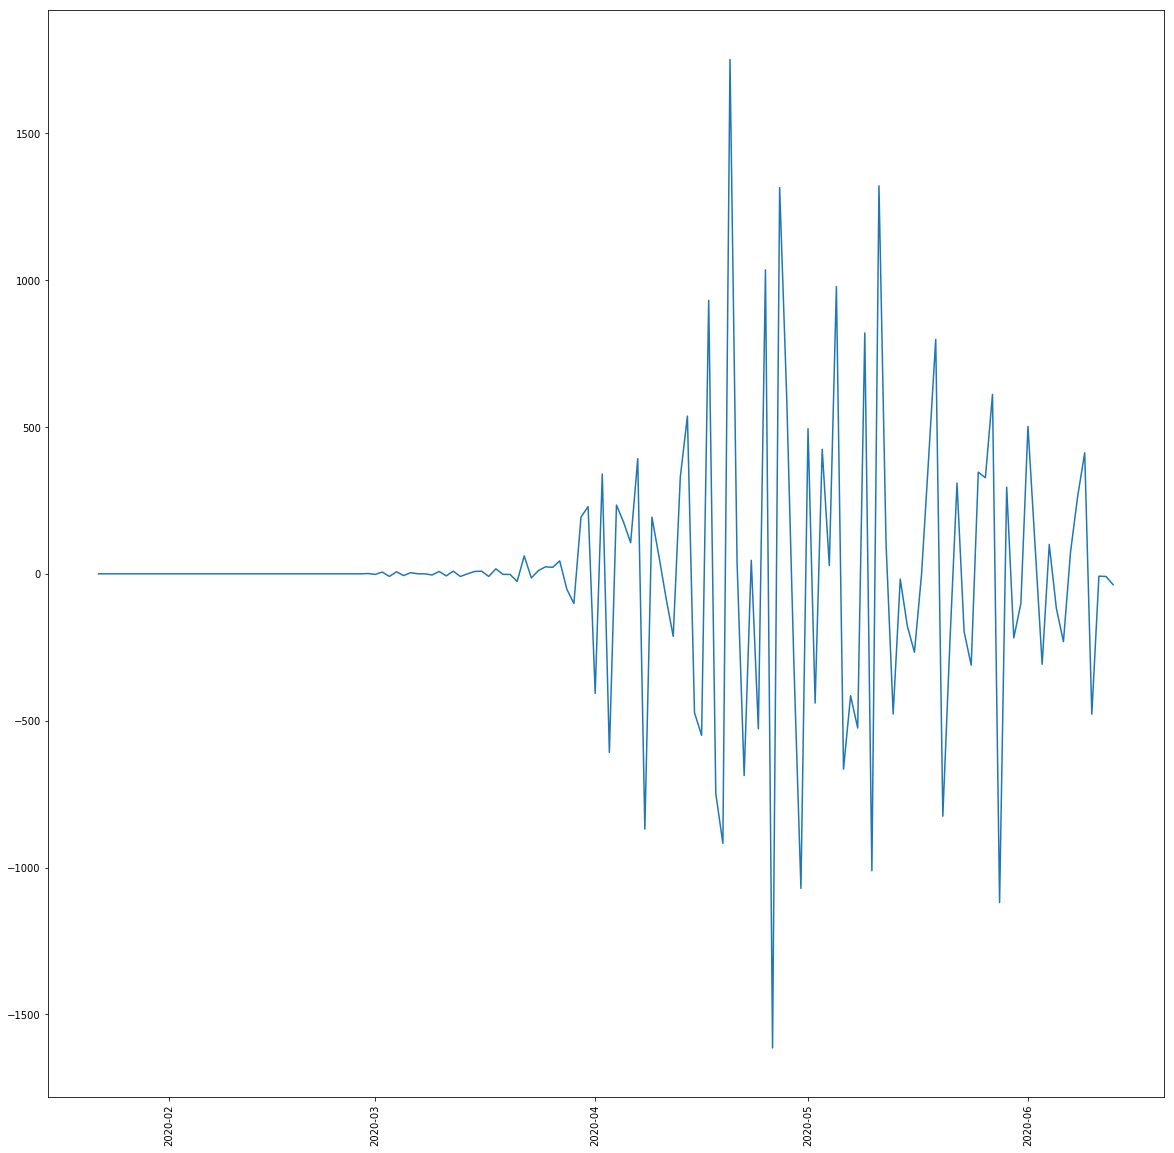

In [231]:
df_us2 = df_us1.diff().fillna(df_us1)
plt.plot(df_us2)
plt.xticks(rotation=90)
plt.show()

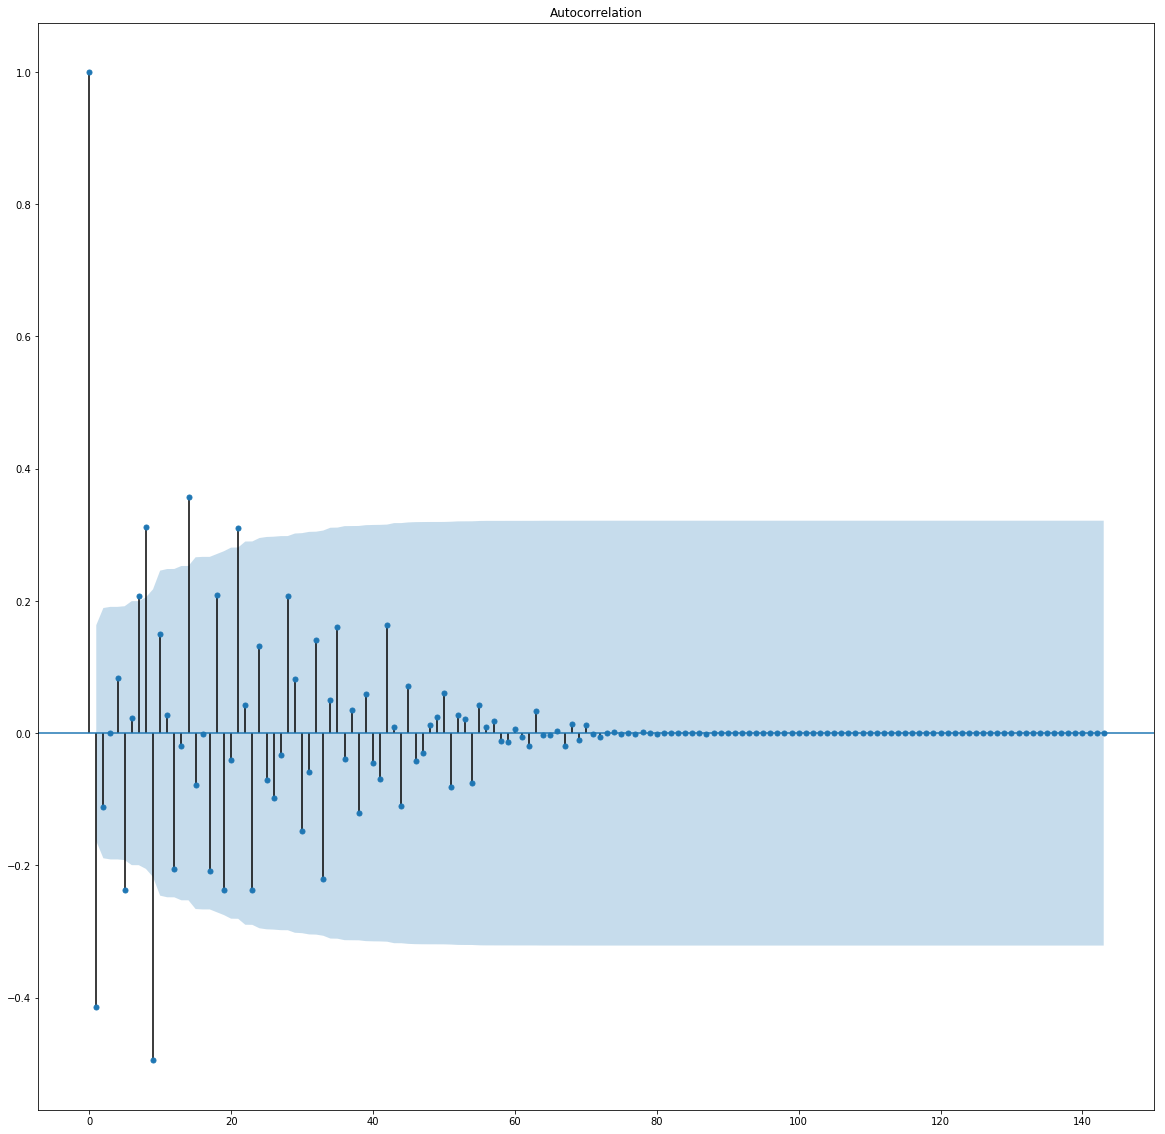

In [232]:
plot_acf(df_us2)
plt.show()

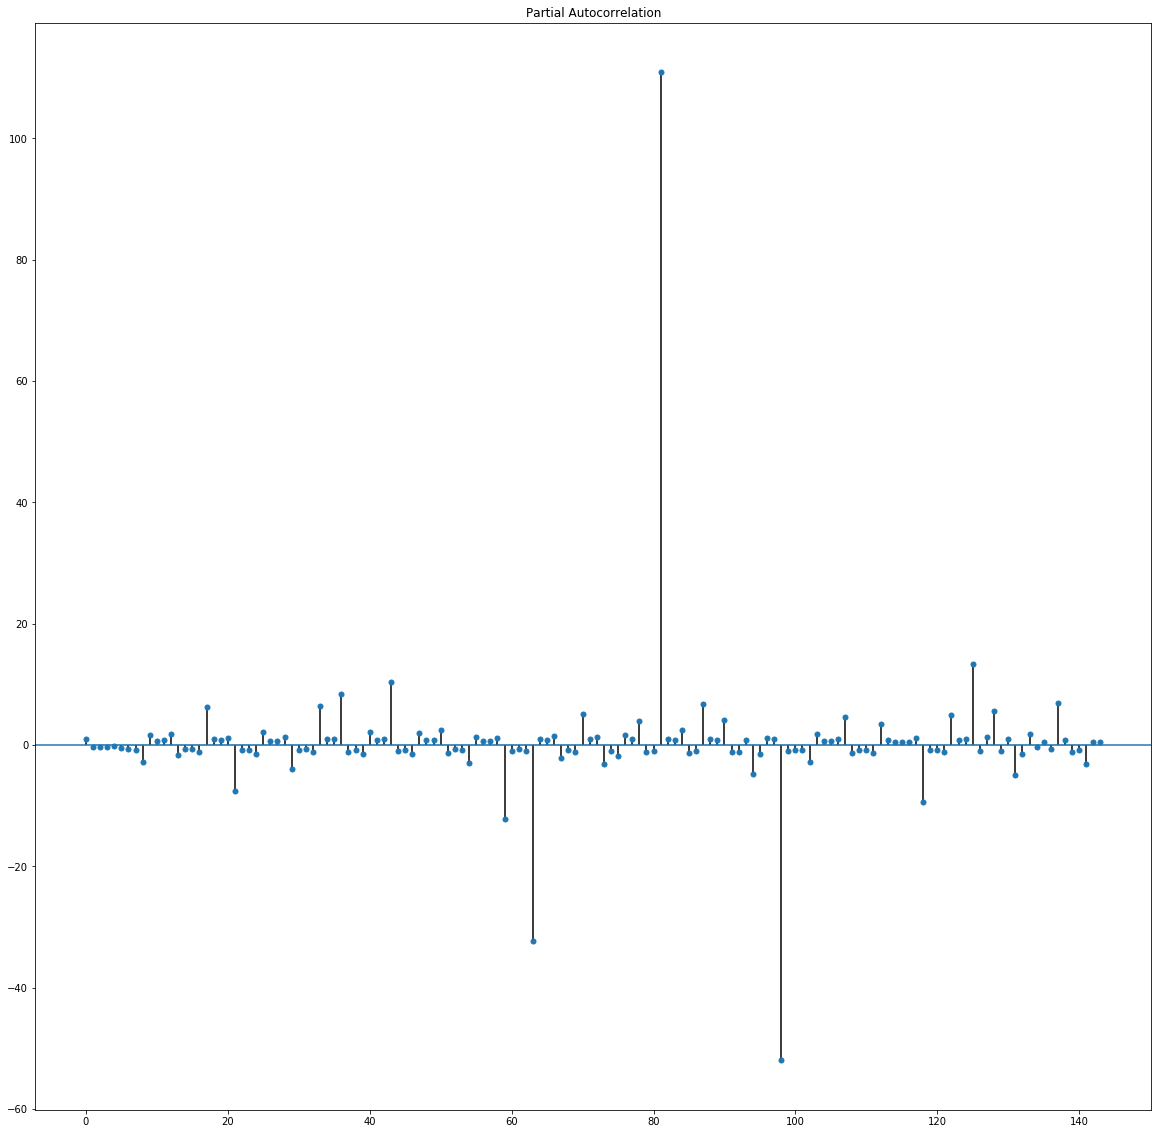

In [233]:
plot_pacf(df_us2)
plt.show()

In [234]:
ARIMA_model = ARIMA(df_trans_deaths_us, order=(9, 1, 6)).fit(transparams=False)

/home/akash/Dev/python/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/akash/Dev/python/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/akash/Dev/python/venv/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [235]:
ARIMA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D.US   No. Observations:                  143
Model:                 ARIMA(9, 1, 6)   Log Likelihood                -946.349
Method:                       css-mle   S.D. of innovations                nan
Date:                Sun, 14 Jun 2020   AIC                           1926.698
Time:                        20:10:54   BIC                           1977.066
Sample:                    01-23-2020   HQIC                          1947.165
                         - 06-13-2020                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0544     18.769      0.323      0.748     -30.731      42.840
ar.L1.D.US    -1.1867      0.315     -3.767      0.000      -1.804      -0.569
ar.L2.D.US    -0.5808      0.200     -2.907      0.004      -0.972      -0.189
ar.L3.D.US    -0.1338      0.132     -1.013      0.313      -0.393       0.125
ar.L4.D.US    -0.1105      0.105     -1.051      0.295      -0.317       0.096
ar.L5.D.US    -0.2806      0.113     -2.493      0.014      -0.501      -0.060
ar.L6.D.US     0.0594      0.128      0.462      0.645      -0.192       0.311
ar.L7.D.US     0.5727      0.109      5.230      0.000       0.358       0.787
ar.L8.D.US     1.0123      0.173      5.849      0.000       0.673       1.351
ar.L9.D.US     0.4848      0.213      2.274      0.025       0.067       0.903
ma.L1.D.US     0.6663      0.325      2.050      0.042       0.029       1.303
ma.L2.D.US    -0.2003      0.125     -1.598      0.113      -0.446       0.045
ma.L3.D.US    -0.3449      0.147     -2.347      0.020      -0.633      -0.057
ma.L4.D.US     0.1138      0.149      0.762      0.447      -0.179       0.406
ma.L5.D.US     0.3480      0.129      2.700      0.008       0.095       0.601
ma.L6.D.US     0.0108      0.142      0.076      0.939      -0.267       0.289
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0699           -0.0000j            1.0699           -0.0000
AR.2            0.6375           -0.7842j            1.0107           -0.1414
AR.3            0.6375           +0.7842j            1.0107            0.1414
AR.4           -0.2025           -1.0342j            1.0538           -0.2808
AR.5           -0.2025           +1.0342j            1.0538            0.2808
AR.6           -0.7571           -0.7300j            1.0517           -0.3779
AR.7           -0.7571           +0.7300j            1.0517            0.3779
AR.8           -1.0489           -0.0000j            1.0489           -0.5000
AR.9           -1.4651           -0.0000j            1.4651           -0.5000
MA.1           -1.1587           -0.0000j            1.1587           -0.5000
MA.2           -0.7237           -0.9391j            1.1856           -0.3545
MA.3           -0.7237           +0.9391j            1.1856            0.3545
MA.4            1.1222           -0.7245j            1.3358           -0.0912
MA.5            1.1222           +0.7245j            1.3358            0.0912
MA.6          -31.7851           -0.0000j           31.7851           -0.5000
-----------------------------------------------------------------------------
"""

In [236]:
arma_predict = ARIMA_model.predict('2020-06-05', '2020-06-25', typ='levels')

In [237]:
arma_predict

2020-06-05     979.513661
2020-06-06     934.119043
2020-06-07     492.961916
2020-06-08     447.830910
2020-06-09     772.864590
2020-06-10     875.547161
2020-06-11     784.825151
2020-06-12     908.433333
2020-06-13     597.579625
2020-06-14     472.123526
2020-06-15     590.472084
2020-06-16     815.503908
2020-06-17    1007.577905
2020-06-18     926.088284
2020-06-19     885.394205
2020-06-20     783.000860
2020-06-21     599.548095
2020-06-22     588.669250
2020-06-23     873.381025
2020-06-24     986.485153
2020-06-25     998.843180
Freq: D, dtype: float64

### Mean Absolute Error for Forecast Evaluation

In [238]:
arma_predict2 = ARIMA_model.predict('2020-01-23', '2020-06-25', typ='levels')
ser2 = arma_predict2

In [239]:
actual = df_trans_deaths_us.loc['2020-01-24':, :]

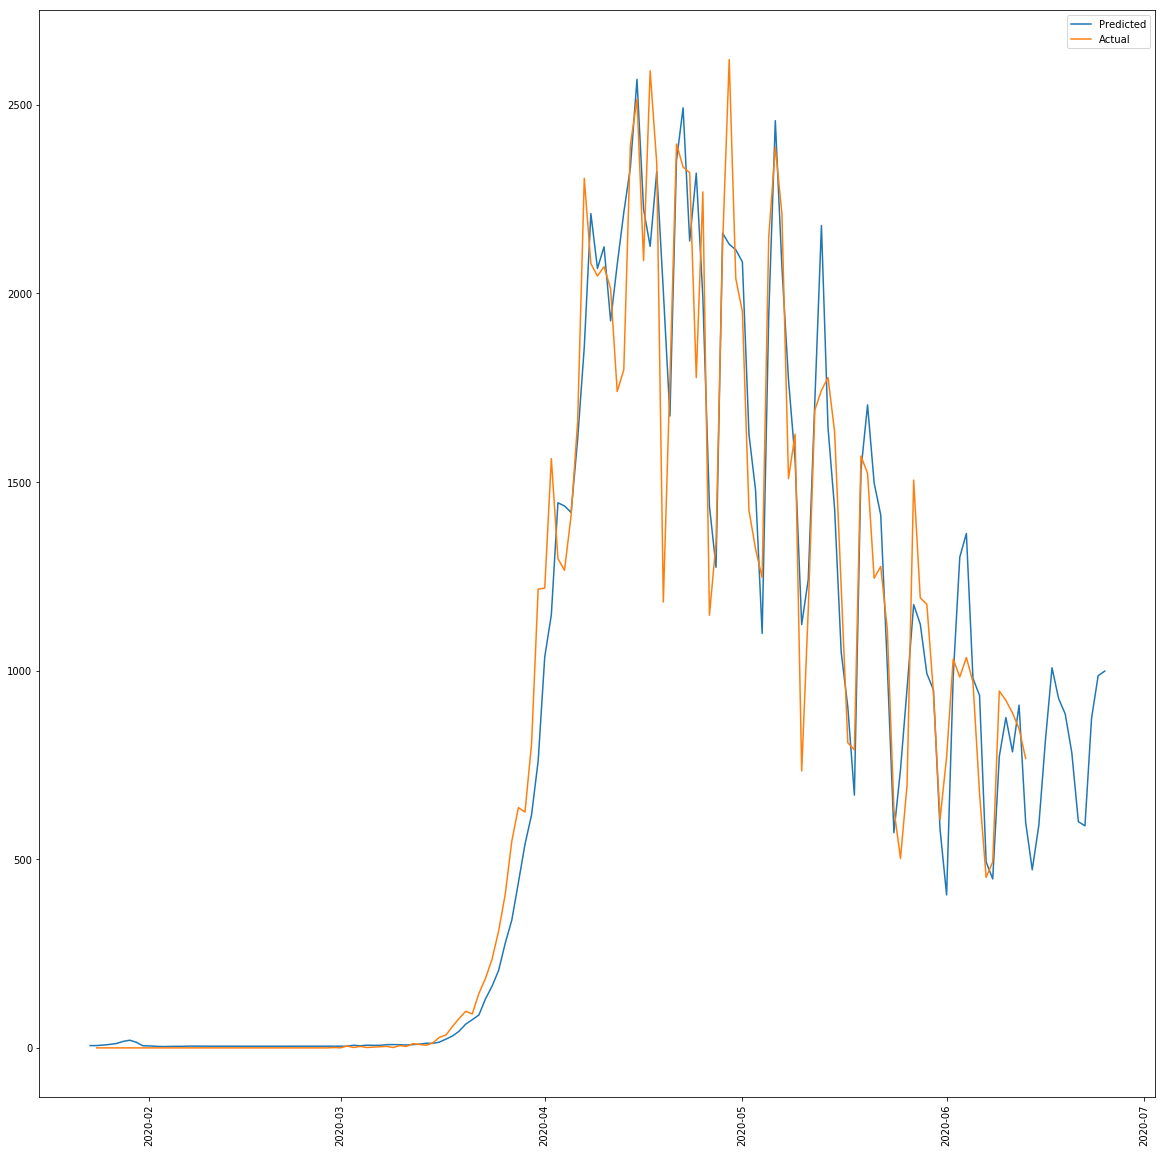

In [240]:
plt.plot(ser2, label='Predicted')
plt.plot(actual, label='Actual')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [241]:
df_new = pd.DataFrame(actual)

In [242]:
df_new['predicted'] = ser2

In [243]:
df_new = df_new.rename(columns={"US":"actual"})

In [244]:
df_new.loc[:, 'error'] = np.absolute(df_new.predicted - df_new.actual)

In [245]:
df_new.tail()

Country/Region  actual   predicted       error
2020-06-09       946.0  772.864590  173.135410
2020-06-10       921.0  875.547161   45.452839
2020-06-11       888.0  784.825151  103.174849
2020-06-12       846.0  908.433333   62.433333
2020-06-13       767.0  597.579625  169.420375

In [246]:
df_new.loc[:, 'error_squared'] = np.square(df_new.predicted - df_new.actual)

In [247]:
sum(df_new.error_squared) / len(df_new)

31299.61702055712

In [248]:
np.sqrt(sum(df_new.error_squared) / len(df_new))

176.916977762331

In [249]:
root_mean_square_error = np.sqrt(sum(df_new.error_squared) / len(df_new))

In [250]:
test_results = adfuller(df_us2.US)

In [251]:
test_results[1]

4.630595364433985e-07

### India

### Converting DataFrame to actual time series data, where each day has number of deaths i.e deaths value is not cumulated.

In [252]:
df_trans_deaths_ind = df_trans_deaths[['India']]

In [253]:
df_trans_deaths_ind.head()

Country/Region  India
2020-01-22          0
2020-01-23          0
2020-01-24          0
2020-01-25          0
2020-01-26          0

In [254]:
df_trans_deaths_ind = df_trans_deaths_ind.diff(axis=0).fillna(df_trans_deaths_ind)

In [255]:
df_trans_deaths_ind.tail()

Country/Region  India
2020-06-09      277.0
2020-06-10      748.0
2020-06-11        0.0
2020-06-12        0.0
2020-06-13      386.0

In [256]:
df_trans_deaths_ind.index

DatetimeIndex(['2020-01-22', '2020-01-23',
               '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-06-04', '2020-06-05',
               '2020-06-06', '2020-06-07',
               '2020-06-08', '2020-06-09',
               '2020-06-10', '2020-06-11',
               '2020-06-12', '2020-06-13'],
              dtype='datetime64[ns]', length=144, freq=None)

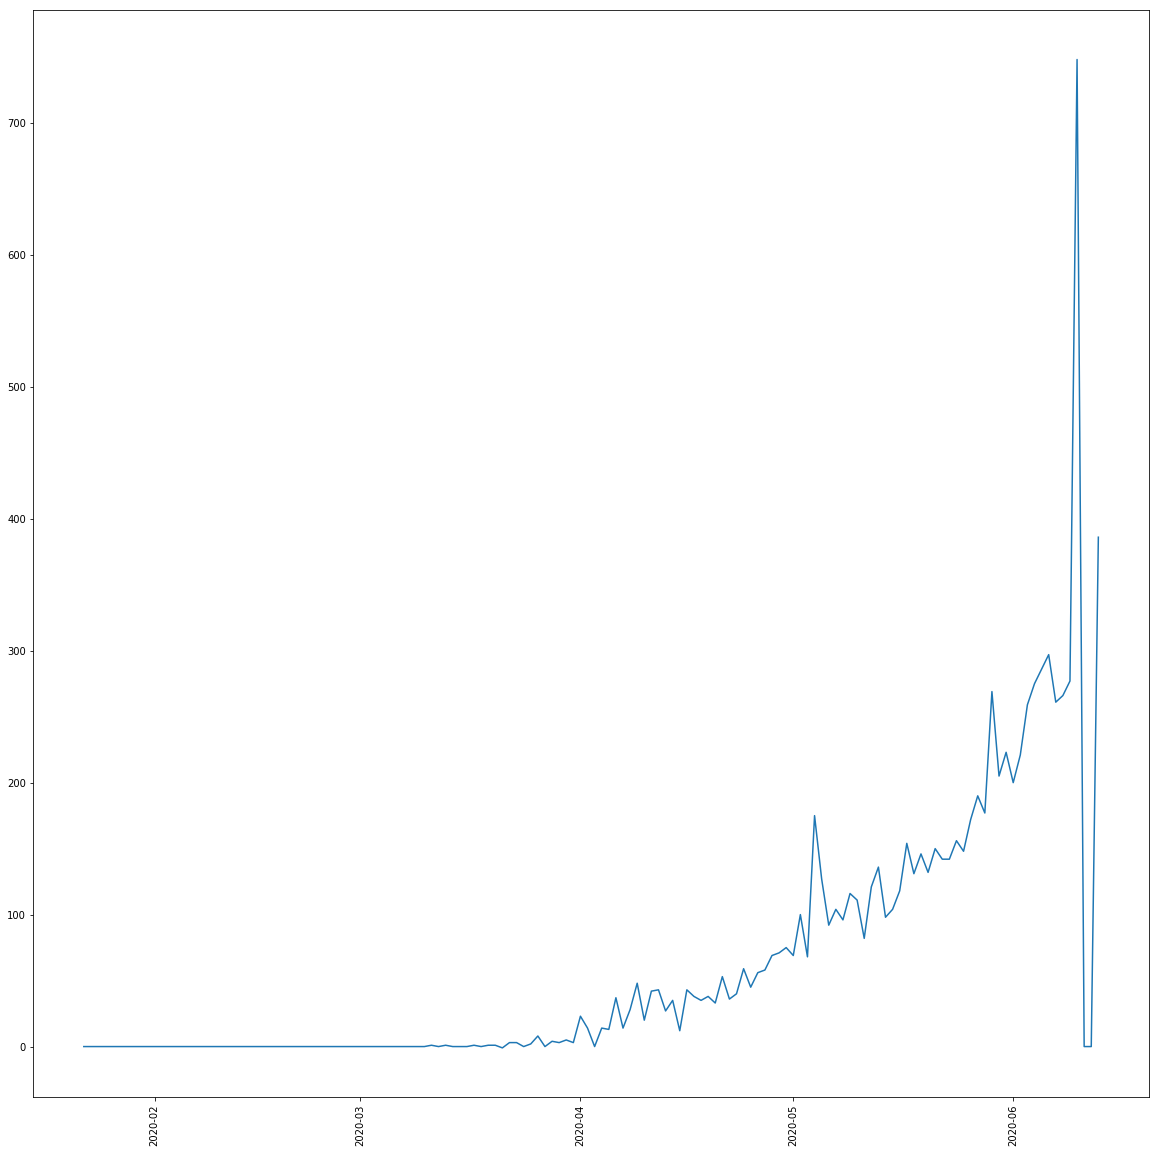

In [257]:
plt.plot(df_trans_deaths_ind)
plt.xticks(rotation=90)
plt.show()

In [258]:
df_ind1 = df_trans_deaths_ind.diff().fillna(df_trans_deaths_ind)
df_ind1.tail()

Country/Region  India
2020-06-09       11.0
2020-06-10      471.0
2020-06-11     -748.0
2020-06-12        0.0
2020-06-13      386.0

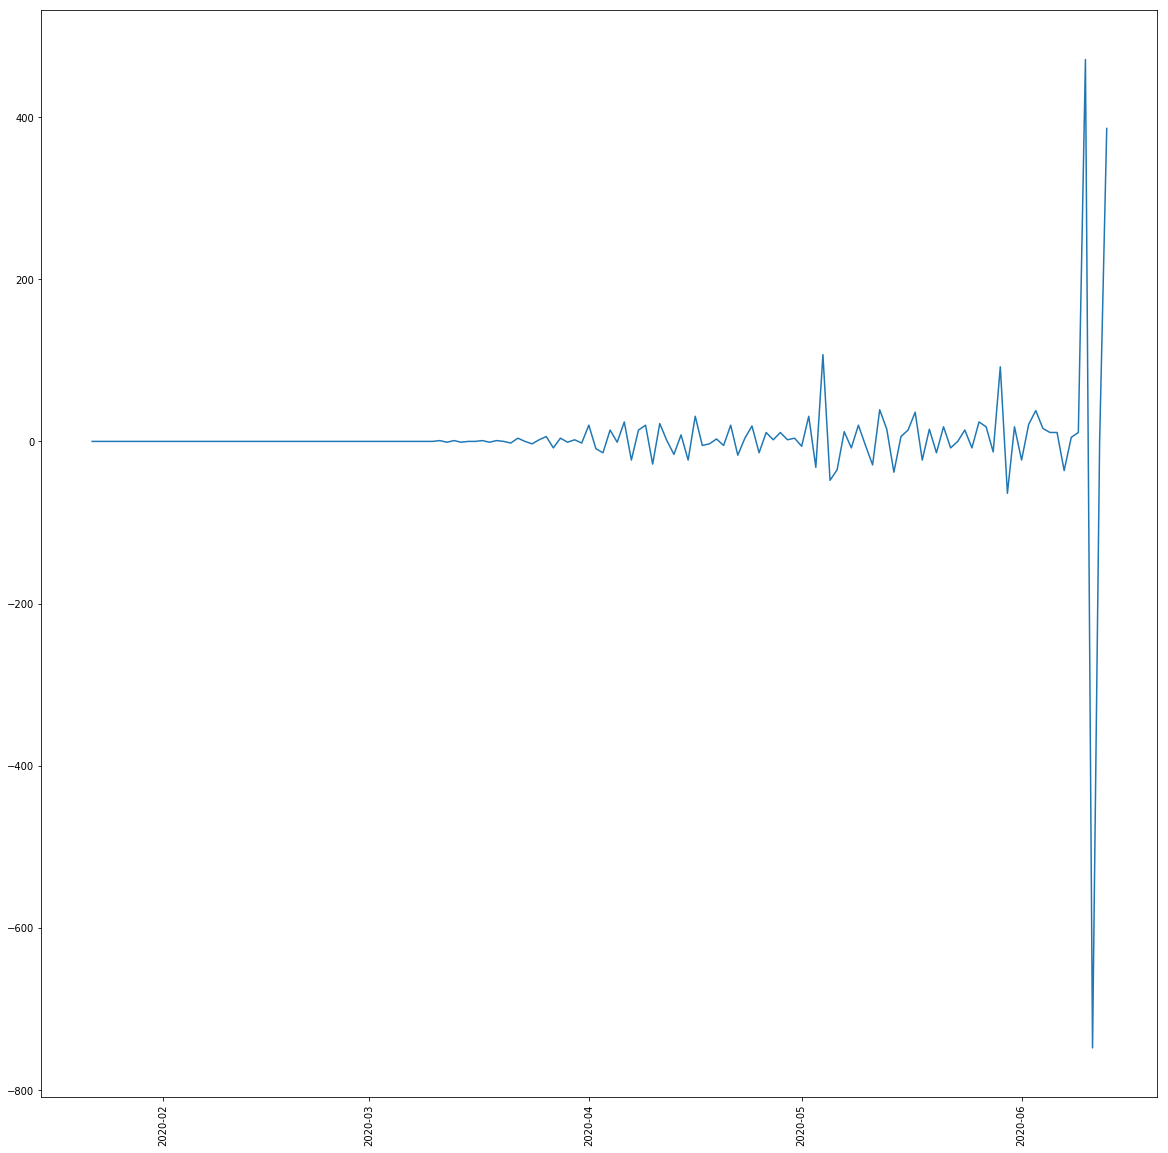

In [259]:
plt.plot(df_ind1)
plt.xticks(rotation=90)
plt.show()

In [260]:
df_ind2 = df_ind1.diff().fillna(df_ind1)
df_ind2.tail()

Country/Region   India
2020-06-09         6.0
2020-06-10       460.0
2020-06-11     -1219.0
2020-06-12       748.0
2020-06-13       386.0

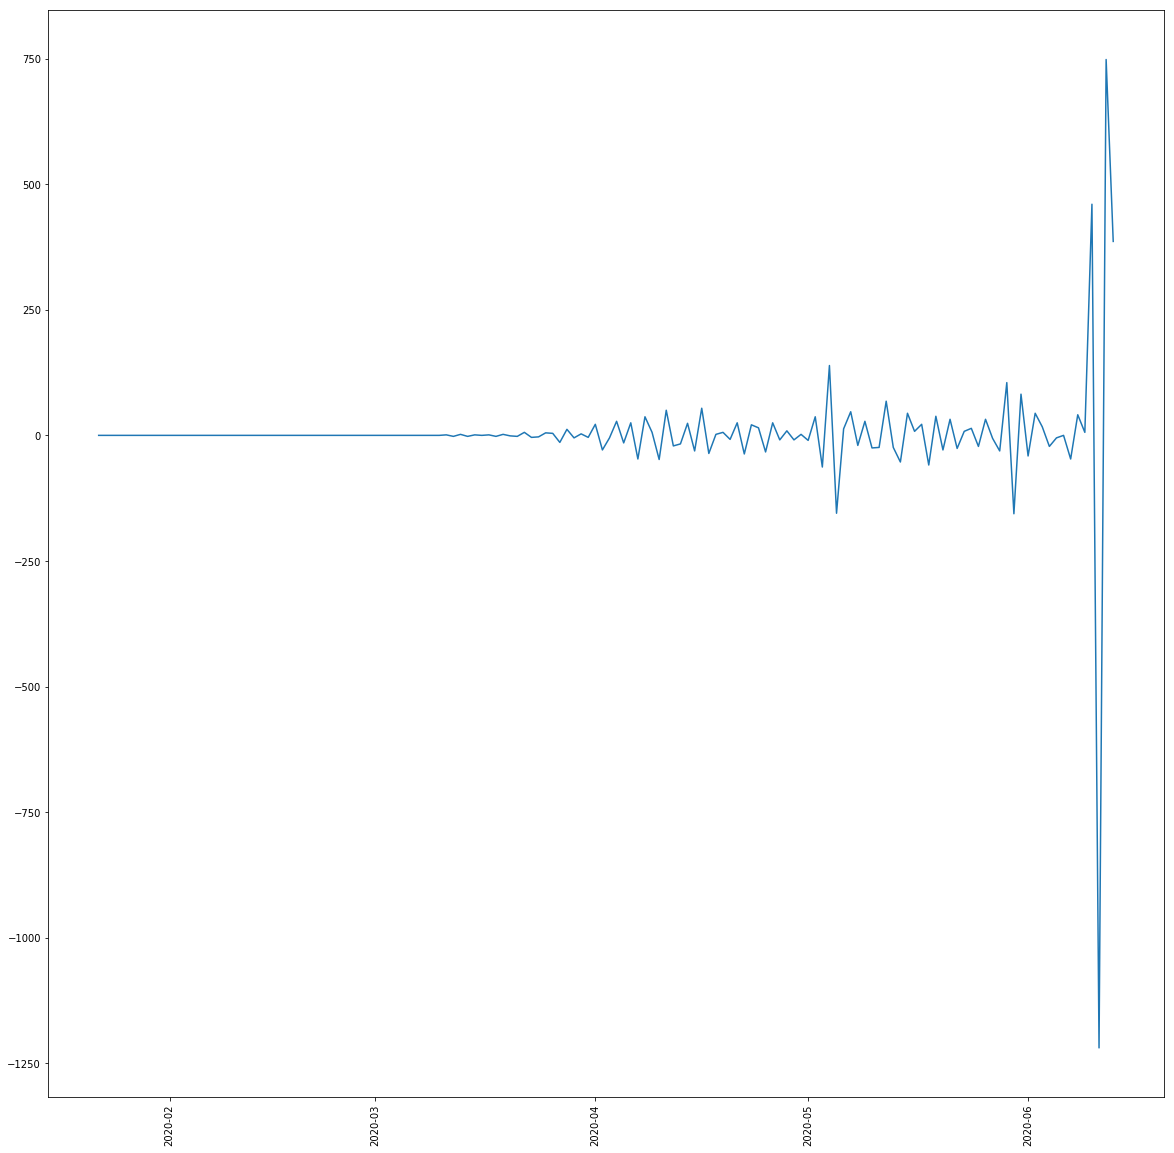

In [261]:
df_ind2 = df_ind1.diff().fillna(df_ind1)
plt.plot(df_ind2)
plt.xticks(rotation=90)
plt.show()

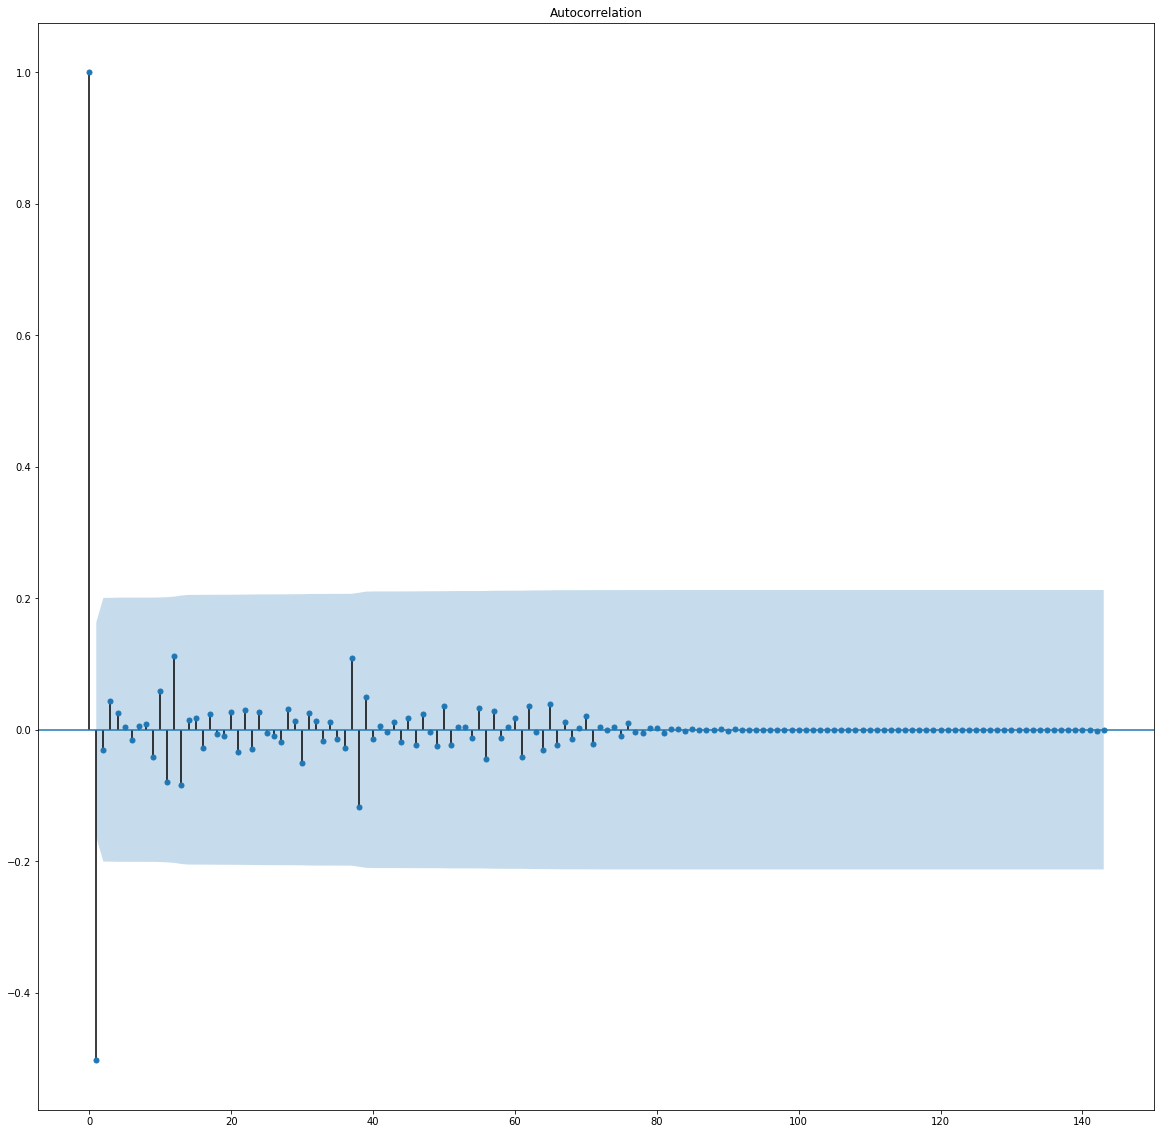

In [262]:
plot_acf(df_ind2)
plt.show()

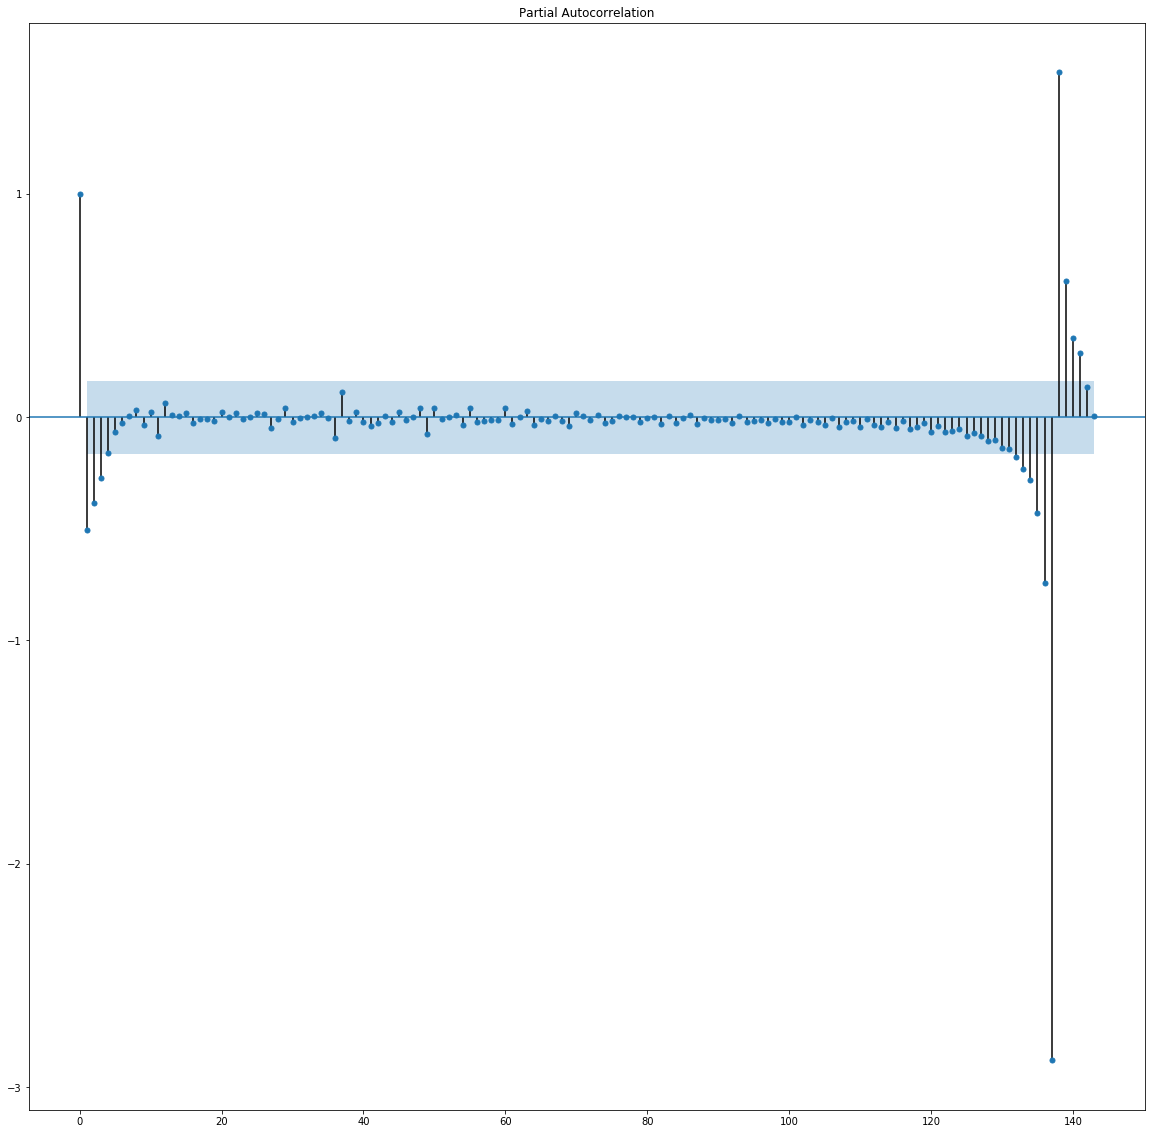

In [263]:
plot_pacf(df_ind2)
plt.show()

In [264]:
ARIMA_model = ARIMA(df_trans_deaths_ind, order=(2, 2, 4)).fit(transparams=False)

/home/akash/Dev/python/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/akash/Dev/python/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/akash/Dev/python/venv/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:819: RuntimeWarning: invalid value encountered in double_scalars
  llf = -nobs/2.*(log(2*pi) + log(sigma2)) - ssr/(2*sigma2)


In [265]:
ARIMA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.India   No. Observations:                  142
Model:                 ARIMA(2, 2, 4)   Log Likelihood                -755.660
Method:                       css-mle   S.D. of innovations             46.306
Date:                Sun, 14 Jun 2020   AIC                           1527.320
Time:                        20:11:06   BIC                           1550.967
Sample:                    01-24-2020   HQIC                          1536.929
                         - 06-13-2020                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0543      0.010      5.287      0.000       0.034       0.074
ar.L1.D2.India     0.6135      0.081      7.617      0.000       0.456       0.771
ar.L2.D2.India    -0.9639      0.033    -29.446      0.000      -1.028      -0.900
ma.L1.D2.India    -2.9381      0.083    -35.523      0.000      -3.100      -2.776
ma.L2.D2.India     3.8107      0.217     17.568      0.000       3.386       4.236
ma.L3.D2.India    -2.6789      0.244    -10.990      0.000      -3.157      -2.201
ma.L4.D2.India     0.8062      0.105      7.651      0.000       0.600       1.013
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.3183           -0.9676j            1.0186           -0.1994
AR.2            0.3183           +0.9676j            1.0186            0.1994
MA.1            0.5737           -0.8521j            1.0273           -0.1557
MA.2            0.5737           +0.8521j            1.0273            0.1557
MA.3            0.9999           -0.0000j            0.9999           -0.0000
MA.4            1.1756           -0.0000j            1.1756           -0.0000
-----------------------------------------------------------------------------
"""

In [266]:
arma_predict = ARIMA_model.predict('2020-06-05', '2020-06-25', typ='levels')

In [267]:
arma_predict

2020-06-05    202.224499
2020-06-06    163.182026
2020-06-07    188.796351
2020-06-08    278.965613
2020-06-09    364.097355
2020-06-10    372.905822
2020-06-11    158.158112
2020-06-12    169.480292
2020-06-13    461.387748
2020-06-14    589.673251
2020-06-15    348.731582
2020-06-16     76.134037
2020-06-17    151.958681
2020-06-18    472.137320
2020-06-19    606.475555
2020-06-20    391.342773
2020-06-21    140.996761
2020-06-22    205.963469
2020-06-23    498.399228
2020-06-24    626.548265
2020-06-25    434.725045
Freq: D, dtype: float64

### Mean Absolute Error for Forecast Evaluation

In [268]:
arma_predict2 = ARIMA_model.predict('2020-01-24', '2020-06-25', typ='levels')
ser2 = arma_predict2

In [269]:
actual = df_trans_deaths_ind.loc['2020-01-24':, :]

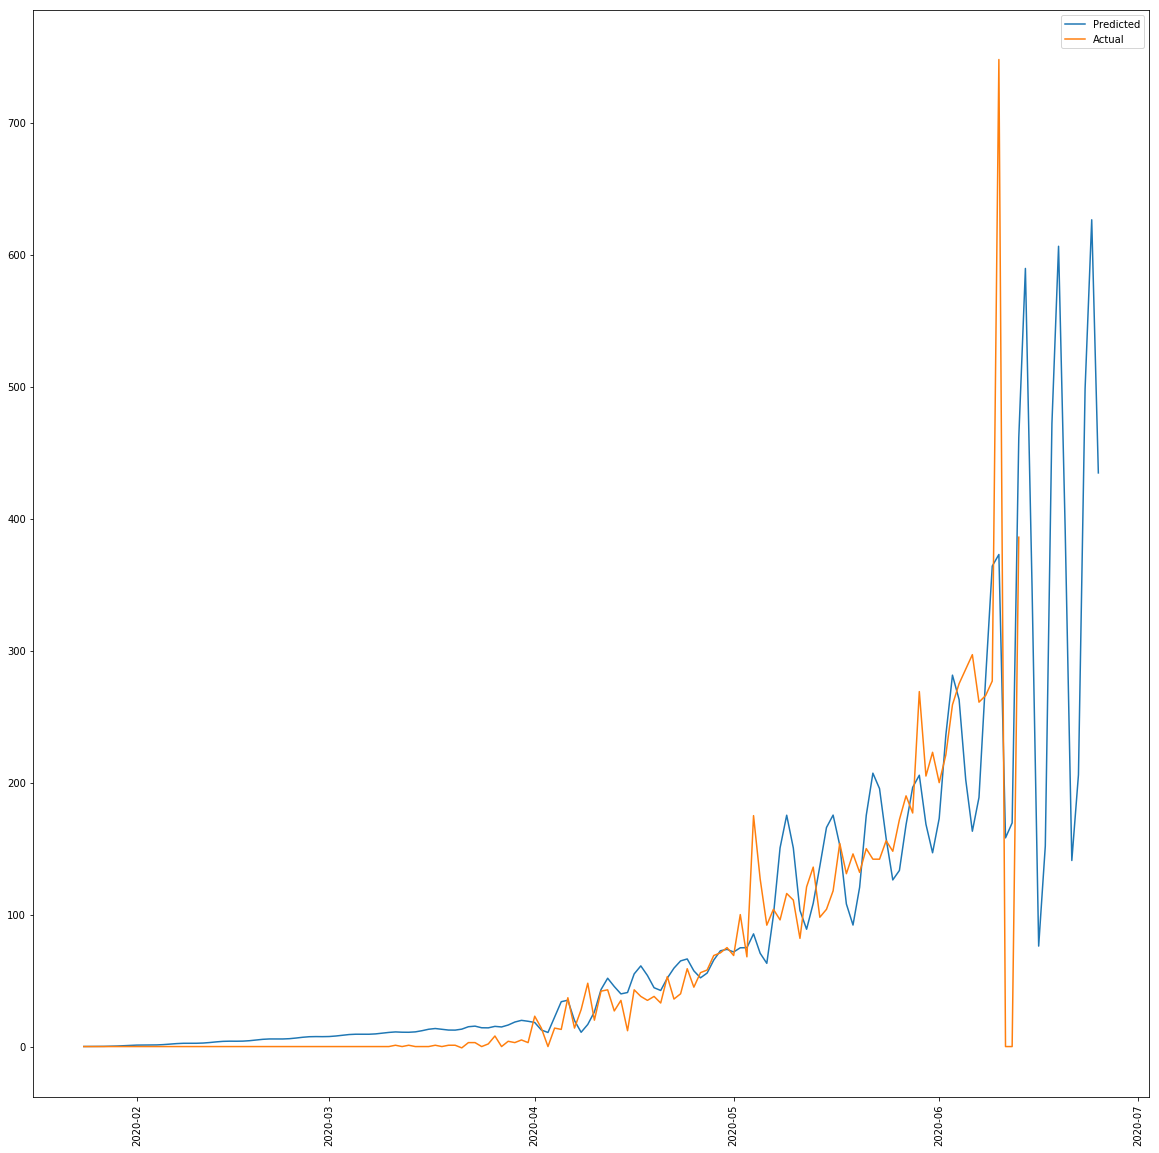

In [270]:
plt.plot(ser2, label='Predicted')
plt.plot(actual, label='Actual')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [271]:
df_new = pd.DataFrame(actual)

In [272]:
df_new['predicted'] = ser2

In [273]:
df_new = df_new.rename(columns={"India":"actual"})

In [274]:
df_new.loc[:, 'error'] = np.absolute(df_new.predicted - df_new.actual)

In [275]:
df_new.tail()

Country/Region  actual   predicted       error
2020-06-09       277.0  364.097355   87.097355
2020-06-10       748.0  372.905822  375.094178
2020-06-11         0.0  158.158112  158.158112
2020-06-12         0.0  169.480292  169.480292
2020-06-13       386.0  461.387748   75.387748

In [276]:
df_new.loc[:, 'error_squared'] = np.square(df_new.predicted - df_new.actual)

In [277]:
sum(df_new.error_squared) / len(df_new)

2163.5238333384436

In [278]:
np.sqrt(sum(df_new.error_squared) / len(df_new))

46.5136951159381

In [279]:
root_mean_square_error = np.sqrt(sum(df_new.error_squared) / len(df_new))

In [280]:
root_mean_square_error

46.5136951159381